<a href="https://colab.research.google.com/github/mohammadbadi/Clustering_Frequency/blob/main/Code%20Sections/5.4.3%20%20Feature%20Engineering%20Frequency%20Encoding%20and%20PCA%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully.

First 5 rows of the DataFrame:
   _id EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY    OCC_DOW  \
0    1  GO-20141263217    2013.0  December     31.0    365.0    Tuesday   
1   42  GO-20141262914    2014.0   January      1.0      1.0  Wednesday   
2  108  GO-20141266097    2014.0   January      2.0      2.0   Thursday   
3  126  GO-20141265947    2014.0   January      1.0      1.0  Wednesday   
4  140  GO-20141265795    2014.0   January      1.0      1.0  Wednesday   

   OCC_HOUR DIVISION                                      LOCATION_TYPE  \
0        17      D33                   Apartment (Rooming House, Condo)   
1        15      D43  Streets, Roads, Highways (Bicycle Path, Privat...   
2         1      D42  Single Home, House (Attach Garage, Cottage, Mo...   
3        15      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   
4        19      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   

  PREMISES_TYPE  HOOD_158               

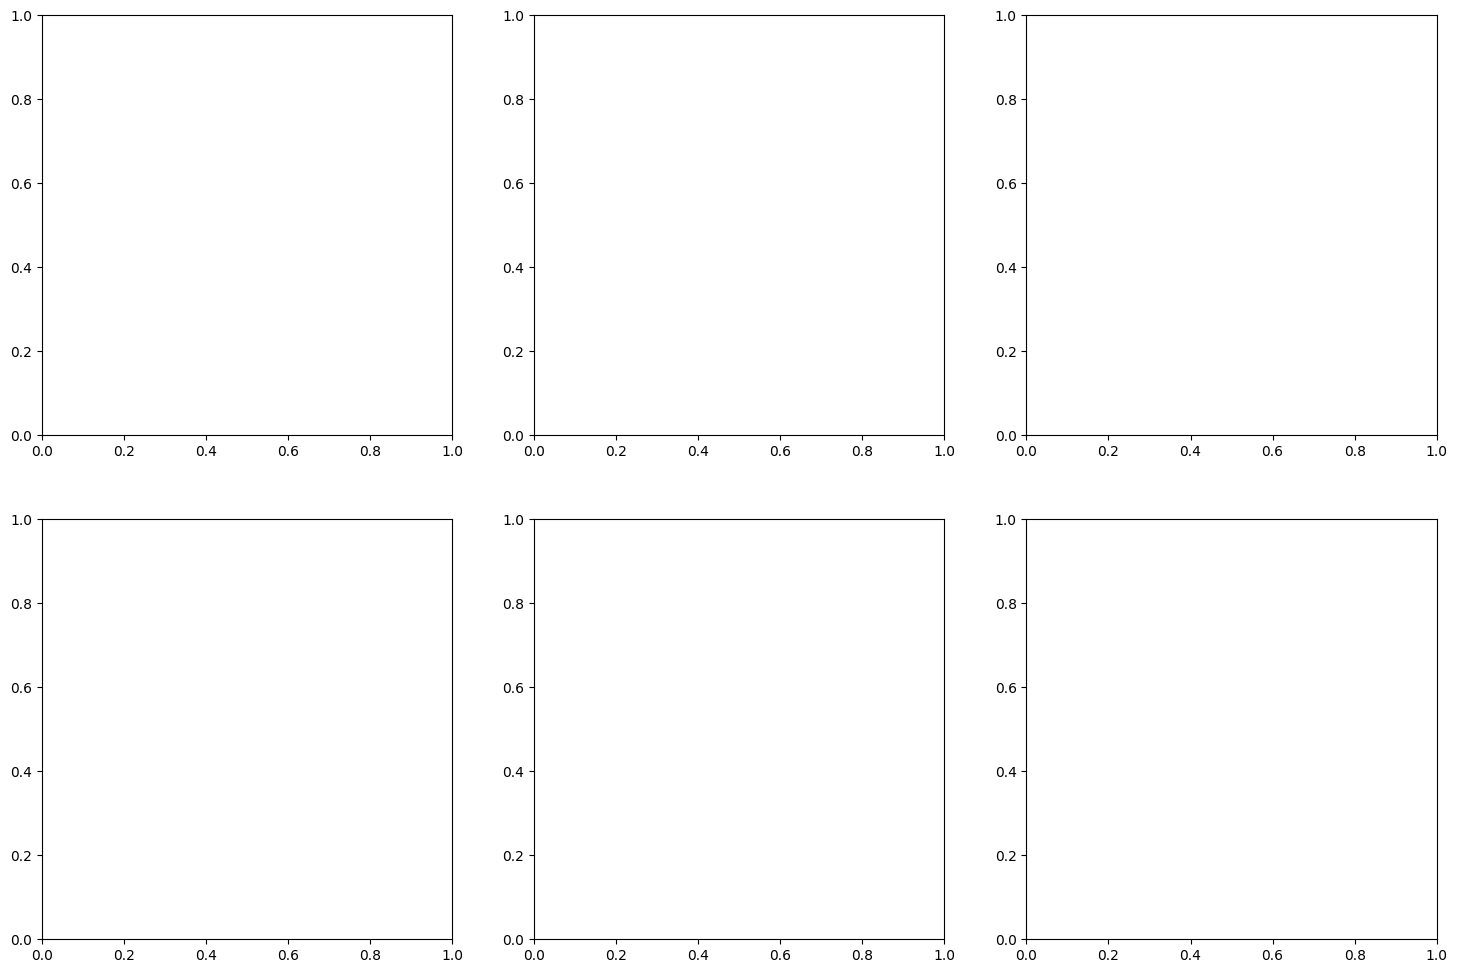

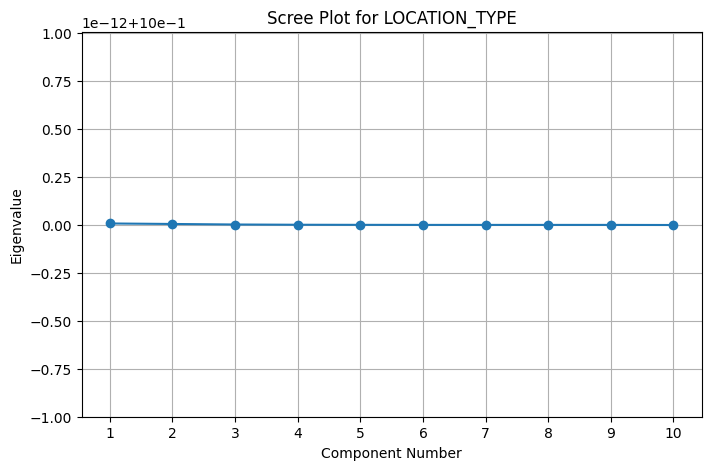

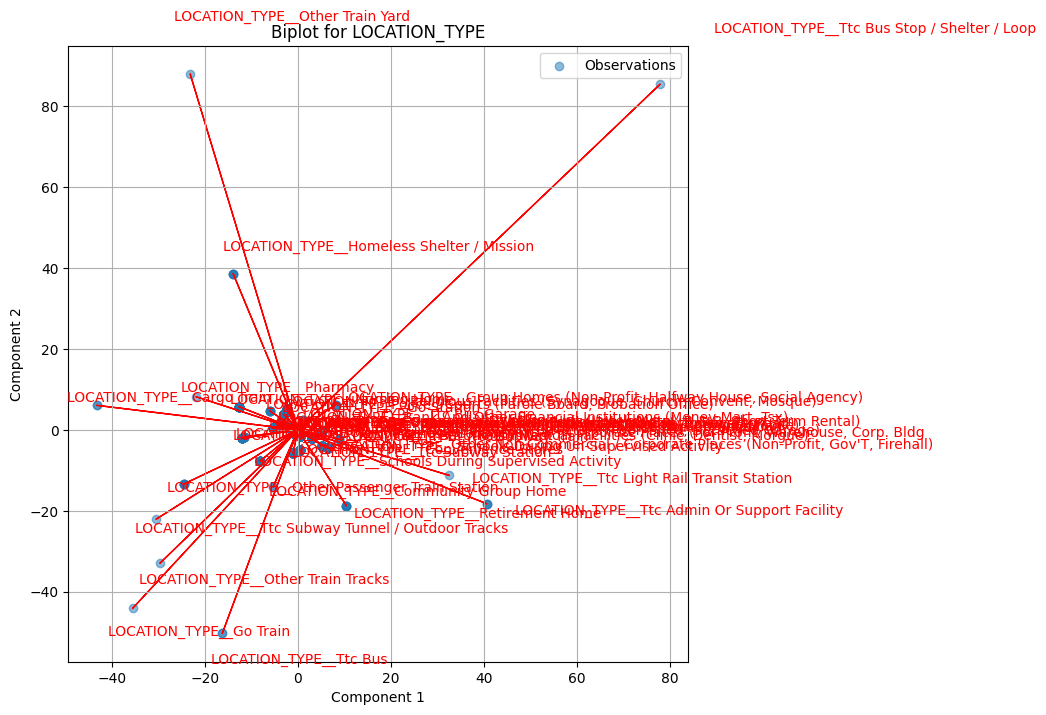

Optimal MCA results for LOCATION_TYPE:
    n_components  explained_variance  silhouette_score        inertia  \
0             1                 1.0          0.944633    7295.840820   
1             2                 1.0          0.595949   59618.436490   
2             3                 1.0          0.820663   94790.111847   
3             4                 1.0          0.888805  151531.657125   
4             5                 1.0          0.957191  190959.770206   
5             6                 1.0          0.606990  230167.192614   
6             7                 1.0          0.587173  276109.469965   
7             8                 1.0          0.685913  340817.887502   
8             9                 1.0          0.582308  386183.951273   
9            10                 1.0          0.906385  457293.537855   

                                         eigenvalues  
0                               [1.0000000000000027]  
1           [1.0000000000000053, 1.0000000000000018]  
2 

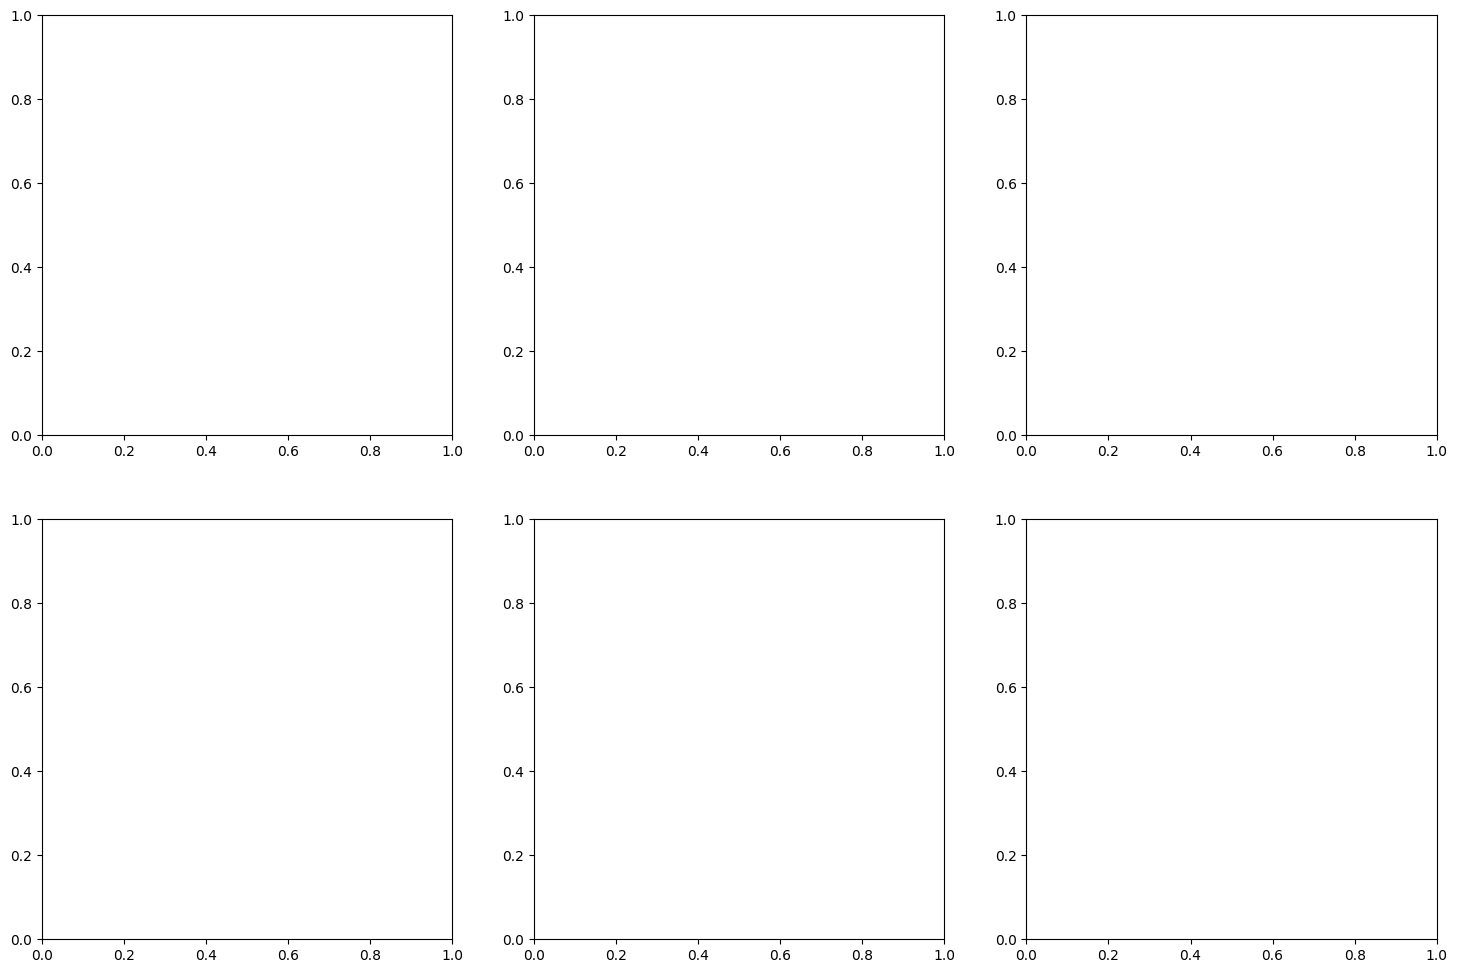

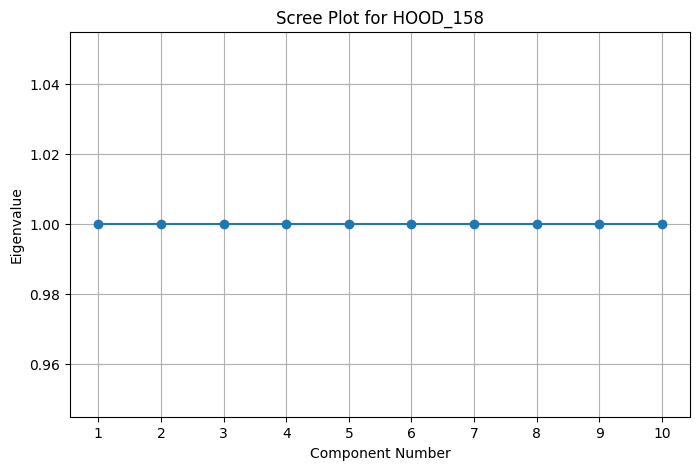

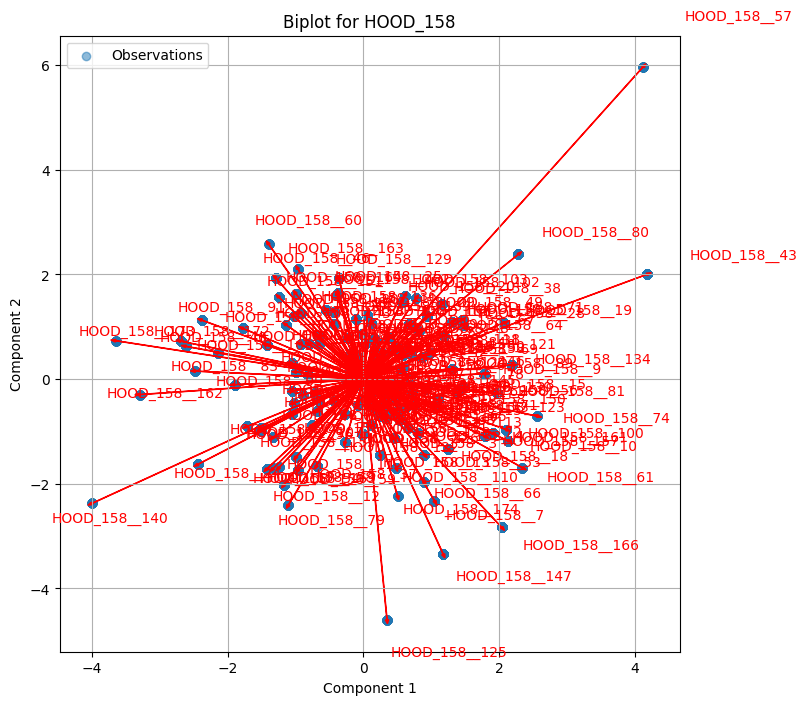

Optimal MCA results for HOOD_158:
    n_components  explained_variance  silhouette_score        inertia  \
0             1                 1.0          0.580566    4906.292431   
1             2                 1.0          0.377584   36132.947890   
2             3                 1.0          0.285881   76937.189564   
3             4                 1.0          0.212804  125056.780420   
4             5                 1.0          0.196862  170472.555664   
5             6                 1.0          0.165709  230945.066741   
6             7                 1.0          0.141677  279436.674349   
7             8                 1.0          0.133865  323241.916969   
8             9                 1.0          0.112152  384106.814640   
9            10                 1.0          0.112864  433612.808136   

                                         eigenvalues  
0                               [1.0000000000000009]  
1           [1.0000000000000009, 1.0000000000000004]  
2  [1.0

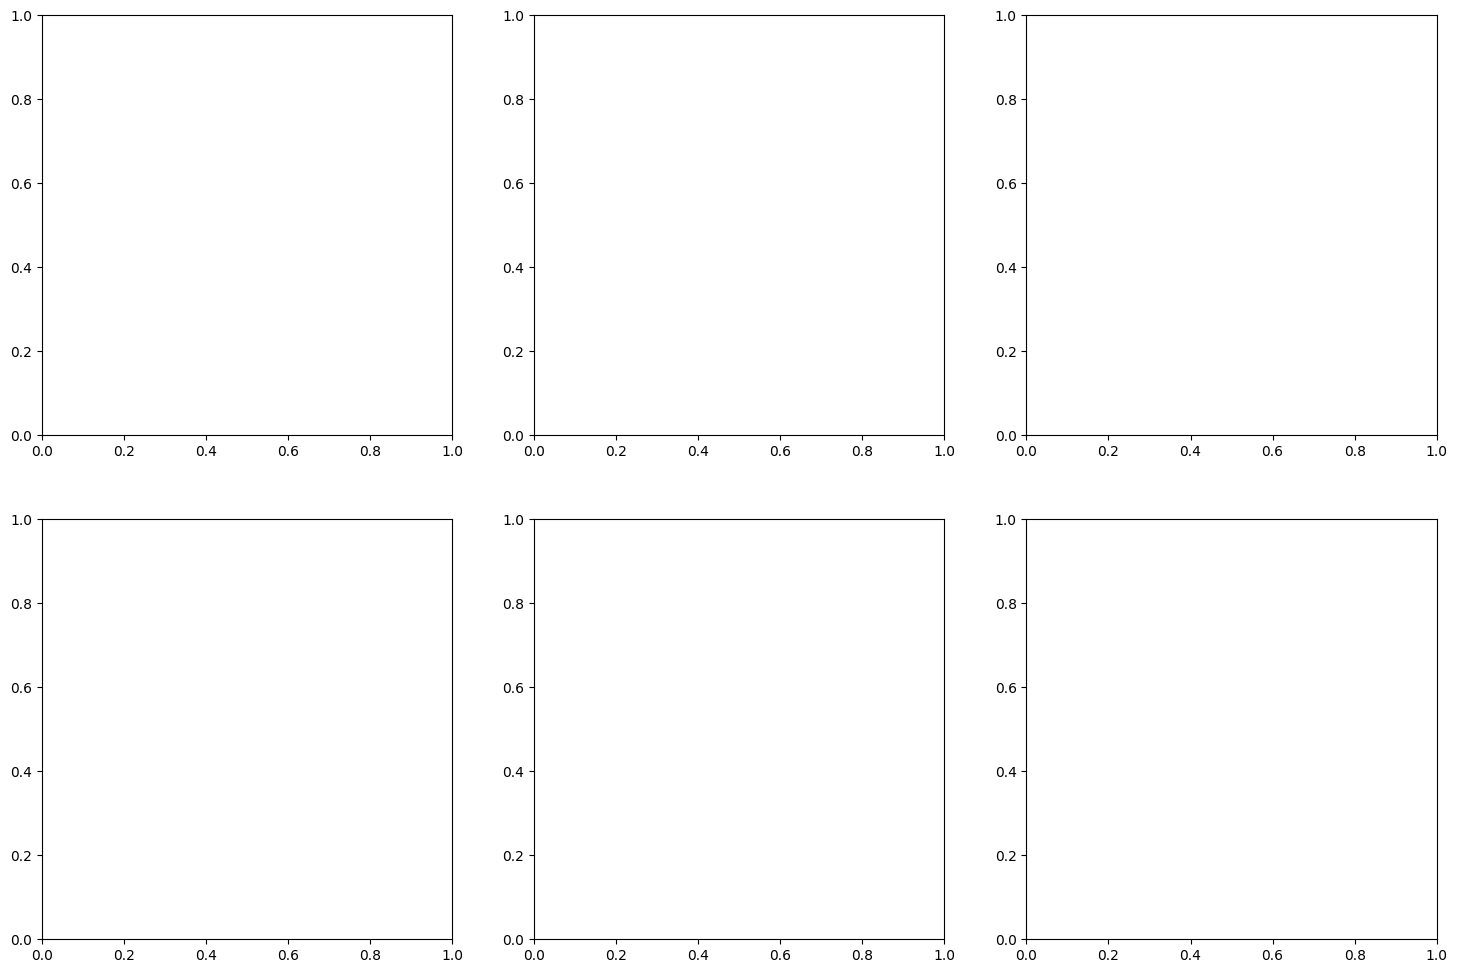

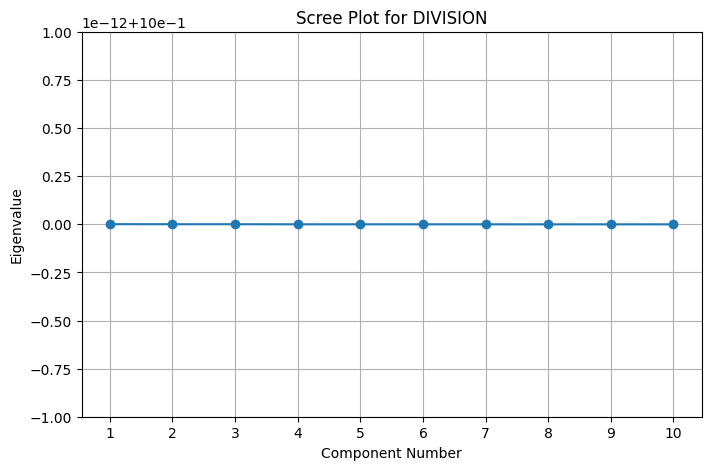

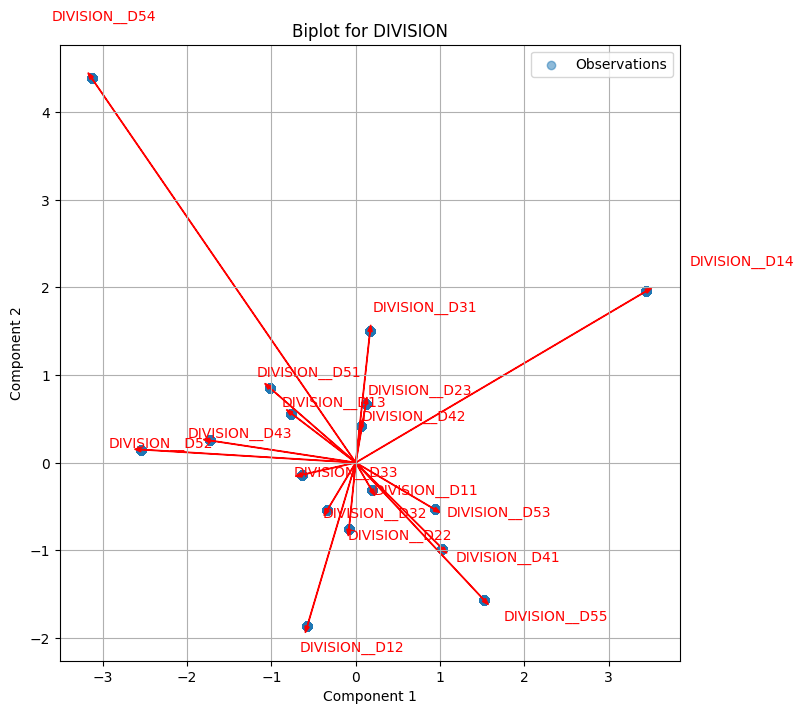

Optimal MCA results for DIVISION:
    n_components  explained_variance  silhouette_score        inertia  \
0             1                 1.0          0.745421    1491.332132   
1             2                 1.0          0.614318   19807.639319   
2             3                 1.0          0.462332   48116.591710   
3             4                 1.0          0.394959  104667.635423   
4             5                 1.0          0.275596  141449.356505   
5             6                 1.0          0.371860  188070.024633   
6             7                 1.0          0.507974  231286.159168   
7             8                 1.0          0.273380  282087.989163   
8             9                 1.0          0.368395  304172.078441   
9            10                 1.0          0.327174  355641.647568   

                                         eigenvalues  
0                               [1.0000000000000013]  
1           [1.0000000000000013, 1.0000000000000009]  
2  [1.0

In [ ]:
# Install prince if not already installed (uncomment the next line if needed)
# !pip install prince -qqq

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prince import MCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load the Data
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
try:
    df = pd.read_csv(url)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Display first few rows to verify
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# 2. Convert columns to integers and create new numeric columns
# Convert OCC_MONTH to integer and create OCC_MONTH_NUM
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['OCC_MONTH_NUM'] = df['OCC_MONTH'].map(month_mapping).astype(int)

# Convert OCC_HOUR to integer (assuming it's already 0-23)
df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)

# Convert OCC_DOW to integer and create OCC_DOW_NUM
dow_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['OCC_DOW_NUM'] = df['OCC_DOW'].map(dow_mapping).astype(int)

print("\nColumns converted to integers and new numeric columns created.")
print(df[['OCC_MONTH', 'OCC_MONTH_NUM', 'OCC_HOUR', 'OCC_DOW', 'OCC_DOW_NUM']].dtypes)
print(df[['OCC_MONTH', 'OCC_MONTH_NUM', 'OCC_HOUR', 'OCC_DOW', 'OCC_DOW_NUM']].head())

# 3. Cyclical Encoding (Sine/Cosine)
def cyclical_encode(df, col, period):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / period)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / period)
    return df

df = cyclical_encode(df, 'OCC_MONTH_NUM', 12)
df = cyclical_encode(df, 'OCC_HOUR', 24)
df = cyclical_encode(df, 'OCC_DOW_NUM', 7)

print("\nCyclical encoding applied.")

# 4. MCA for Location, Hood, and Division
features_for_mca = ['LOCATION_TYPE', 'HOOD_158', 'DIVISION']

# Function to perform MCA, evaluate metrics, and plot scree and biplot
def perform_mca_and_evaluate(df, feature, max_components=10):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Create subplots for all metrics if needed

    print(f"\nPerforming MCA for feature: {feature}")

    results = []

    # Loop through n_components for evaluation
    for n_components in range(1, max_components + 1):
        print(f"\nAnalysis for n_components = {n_components}")

        # Perform MCA
        mca = MCA(n_components=n_components, random_state=42)
        mca_result = mca.fit(df[[feature]])

        # Calculate explained variance ratio using eigenvalues
        total_inertia = sum(mca_result.eigenvalues_)
        explained_variance_ratio = sum(mca_result.eigenvalues_[:n_components]) / total_inertia

        # Transform data using MCA components
        mca_transformed = mca.transform(df[[feature]])

        # Scale MCA components for clustering
        scaler = StandardScaler()
        mca_scaled = scaler.fit_transform(mca_transformed)

        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=5, random_state=42)
        labels = kmeans.fit_predict(mca_scaled)

        # Compute Silhouette Score and inertia
        silhouette_score_value = silhouette_score(mca_scaled, labels)
        inertia = kmeans.inertia_

        # Get eigenvalues for current n_components
        eigenvalues = mca_result.eigenvalues_[:n_components]

        # Print statistics
        print(f"1. Explained Variance: {explained_variance_ratio:.4f}")
        print(f"2. Silhouette Score: {silhouette_score_value:.4f}")
        print(f"3. Inertia: {inertia:.4f}")
        print(f"4. Eigenvalues: {', '.join([f'{ev:.4f}' for ev in eigenvalues])}")
        print("-" * 50)

        # Store results for summary table
        results.append({
            'n_components': n_components,
            'explained_variance': explained_variance_ratio,
            'silhouette_score': silhouette_score_value,
            'inertia': inertia,
            'eigenvalues': eigenvalues,
        })

    # Create and print summary table
    summary_df = pd.DataFrame(results)
    print("\nSummary of MCA Results:")
    print(summary_df[['n_components', 'explained_variance', 'silhouette_score', 'inertia']])

    # Plot Scree Plot using maximum components
    mca_full = MCA(n_components=max_components, random_state=42)
    mca_full_result = mca_full.fit(df[[feature]])
    eigenvalues_full = mca_full_result.eigenvalues_
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(eigenvalues_full) + 1), eigenvalues_full, marker='o')
    plt.title(f"Scree Plot for {feature}")
    plt.xlabel("Component Number")
    plt.ylabel("Eigenvalue")
    plt.xticks(range(1, len(eigenvalues_full) + 1))
    plt.grid(True)
    plt.show()

    # Plot Biplot using 2 components (if available)
    if max_components >= 2:
        mca_2 = MCA(n_components=2, random_state=42)
        mca_2.fit(df[[feature]])
        row_coords = mca_2.row_coordinates(df[[feature]])
        col_coords = mca_2.column_coordinates(df[[feature]])
        plt.figure(figsize=(8, 8))
        plt.scatter(row_coords[0], row_coords[1], alpha=0.5, label="Observations")
        # Plot arrows for variable coordinates
        for i in col_coords.index:
            plt.arrow(0, 0, col_coords.loc[i, 0], col_coords.loc[i, 1],
                      color='r', width=0.005, head_width=0.05)
            plt.text(col_coords.loc[i, 0]*1.15, col_coords.loc[i, 1]*1.15, i, color='r')
        plt.title(f"Biplot for {feature}")
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.grid(True)
        plt.legend()
        plt.show()

    return summary_df

# Perform MCA and Evaluate for each feature
optimal_n_components = {}
for feature in features_for_mca:
    optimal_n_components[feature] = perform_mca_and_evaluate(df, feature, max_components=10)
    print(f"Optimal MCA results for {feature}:\n", optimal_n_components[feature])

print("\nMCA analysis completed with additional plots.")

# Display Optimal Component Numbers for easy reference
print("\nOptimal number of MCA components per feature (based on your metrics):")
for feature, summary in optimal_n_components.items():
    print(f"- {feature}:")
    print(summary[['n_components', 'explained_variance', 'silhouette_score', 'inertia']])


In [ ]:
import pandas as pd
import numpy as np
from prince import MCA
from sklearn.preprocessing import StandardScaler
from google.colab import files  # Only needed in Colab

# Load the original DataFrame
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
df_original = pd.read_csv(url)
print("Data loaded successfully.")

# Work on a copy for feature engineering
df = df_original.copy()

# -------------------------------
# Numeric Conversion & Cyclical Encoding
# -------------------------------

# Create numeric columns
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dow_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['OCC_MONTH_NUM'] = df['OCC_MONTH'].map(month_mapping).astype(int)
df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)
df['OCC_DOW_NUM'] = df['OCC_DOW'].map(dow_mapping).astype(int)

# Compute cyclical encoding features (new columns)
df['OCC_MONTH_NUM_sin'] = np.sin(2 * np.pi * df['OCC_MONTH_NUM'] / 12)
df['OCC_MONTH_NUM_cos'] = np.cos(2 * np.pi * df['OCC_MONTH_NUM'] / 12)
df['OCC_HOUR_sin']  = np.sin(2 * np.pi * df['OCC_HOUR'] / 24)
df['OCC_HOUR_cos']  = np.cos(2 * np.pi * df['OCC_HOUR'] / 24)
df['OCC_DOW_NUM_sin'] = np.sin(2 * np.pi * df['OCC_DOW_NUM'] / 7)
df['OCC_DOW_NUM_cos'] = np.cos(2 * np.pi * df['OCC_DOW_NUM'] / 7)

# Save the names of the new cyclical columns
cyclical_cols = ['OCC_MONTH_NUM_sin', 'OCC_MONTH_NUM_cos',
                 'OCC_HOUR_sin', 'OCC_HOUR_cos',
                 'OCC_DOW_NUM_sin', 'OCC_DOW_NUM_cos']

print("\nCyclical encoding applied. Sample of encoded columns:")
print(df[cyclical_cols].head())

# -------------------------------
# MCA on Categorical Features
# -------------------------------

# Define a function to compute MCA without dropping the original column
def perform_mca(dataframe, feature, n_components):
    try:
        mca = MCA(n_components=n_components, random_state=42)
        mca_result = mca.fit_transform(dataframe[[feature]])
        mca_columns = [f"{feature}_MCA_{i+1}" for i in range(n_components)]
        # Add MCA columns to dataframe without dropping the original feature
        dataframe[mca_columns] = mca_result
        print(f"\nMCA for '{feature}' computed. Head of MCA output:")
        print(dataframe[mca_columns].head())
        return mca_columns
    except Exception as e:
        print(f"Error performing MCA on {feature}: {e}")
        return []

# Apply MCA on the selected categorical features
mca_cols_location = perform_mca(df, 'LOCATION_TYPE', 5)
mca_cols_hood     = perform_mca(df, 'HOOD_158', 1)
mca_cols_division = perform_mca(df, 'DIVISION', 1)

# -------------------------------
# One-Hot Encoding for PREMISES_TYPE
# -------------------------------

# Compute one-hot encoded columns without dropping the original PREMISES_TYPE column
premises_onehot = pd.get_dummies(df['PREMISES_TYPE'], prefix='PREMISES_TYPE')
print("\nOne-hot encoded features for 'PREMISES_TYPE':")
print(premises_onehot.head())

# Append the one-hot encoded columns to our feature set
df = pd.concat([df, premises_onehot], axis=1)

# -------------------------------
# Prepare New Features DataFrame and Scaling (Optional)
# -------------------------------

# Gather names of all new features computed
new_feature_cols = cyclical_cols + mca_cols_location + mca_cols_hood + mca_cols_division + list(premises_onehot.columns)

# (Optional) Scale the new features if desired
scaler = StandardScaler()
new_features_scaled = pd.DataFrame(scaler.fit_transform(df[new_feature_cols]),
                                   columns=new_feature_cols,
                                   index=df.index)

# -------------------------------
# Combine Original Data with New Features
# -------------------------------

# We keep all original columns and then append the scaled new features.
# If you prefer unscaled new features, replace new_features_scaled with df[new_feature_cols].
df_final = pd.concat([df_original, new_features_scaled], axis=1)

# Save the final DataFrame to a CSV file
output_file = "FE_Encoded.csv"
df_final.to_csv(output_file, index=False)
print(f"\nProcessed data saved to {output_file}")
print("\nFirst 5 rows of the final DataFrame:")
print(df_final.head())

try:
    files.download(output_file)  # This line only works in Google Colab
except Exception as e:
    print("Not running in Colab, download skipped.")


Data loaded successfully.

Cyclical encoding applied. Sample of encoded columns:
   OCC_MONTH_NUM_sin  OCC_MONTH_NUM_cos  OCC_HOUR_sin  OCC_HOUR_cos  \
0      -2.449294e-16           1.000000     -0.965926     -0.258819   
1       5.000000e-01           0.866025     -0.707107     -0.707107   
2       5.000000e-01           0.866025      0.258819      0.965926   
3       5.000000e-01           0.866025     -0.707107     -0.707107   
4       5.000000e-01           0.866025     -0.965926      0.258819   

   OCC_DOW_NUM_sin  OCC_DOW_NUM_cos  
0         0.974928        -0.222521  
1         0.433884        -0.900969  
2        -0.433884        -0.900969  
3         0.433884        -0.900969  
4         0.433884        -0.900969  

MCA for 'LOCATION_TYPE' computed. Head of MCA output:
   LOCATION_TYPE_MCA_1  LOCATION_TYPE_MCA_2  LOCATION_TYPE_MCA_3  \
0             0.401424             0.538111             0.132926   
1             0.002694            -0.066761             0.143997   
2    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data loaded successfully.

First 5 rows of the DataFrame:
   _id EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY    OCC_DOW  \
0    1  GO-20141263217    2013.0  December     31.0    365.0    Tuesday   
1   42  GO-20141262914    2014.0   January      1.0      1.0  Wednesday   
2  108  GO-20141266097    2014.0   January      2.0      2.0   Thursday   
3  126  GO-20141265947    2014.0   January      1.0      1.0  Wednesday   
4  140  GO-20141265795    2014.0   January      1.0      1.0  Wednesday   

   OCC_HOUR DIVISION                                      LOCATION_TYPE  \
0        17      D33                   Apartment (Rooming House, Condo)   
1        15      D43  Streets, Roads, Highways (Bicycle Path, Privat...   
2         1      D42  Single Home, House (Attach Garage, Cottage, Mo...   
3        15      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   
4        19      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   

  PREMISES_TYPE  HOOD_158               

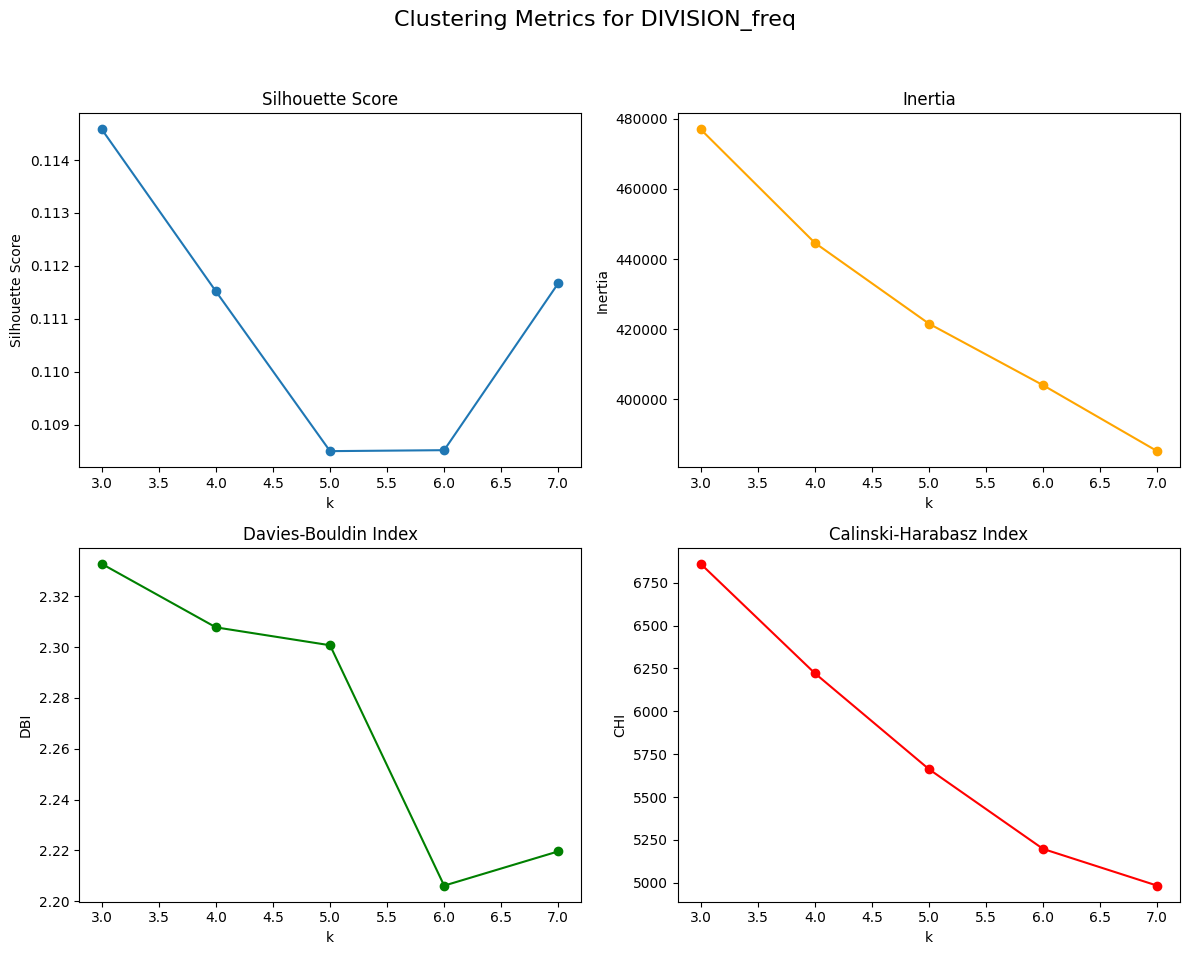



=== Clustering Analysis using LOCATION_TYPE_freq along with continuous and cyclical features ===

For k = 3:
  Silhouette Score       : 0.1210
  Inertia                : 478109.6087
  Davies-Bouldin Index   : 2.2975
  Calinski-Harabasz Index: 6776.2930

For k = 4:
  Silhouette Score       : 0.1085
  Inertia                : 448741.3748
  Davies-Bouldin Index   : 2.3236
  Calinski-Harabasz Index: 5997.8406

For k = 5:
  Silhouette Score       : 0.1073
  Inertia                : 426573.5663
  Davies-Bouldin Index   : 2.1841
  Calinski-Harabasz Index: 5437.5642

For k = 6:
  Silhouette Score       : 0.1034
  Inertia                : 411746.8100
  Davies-Bouldin Index   : 2.2280
  Calinski-Harabasz Index: 4897.7136

For k = 7:
  Silhouette Score       : 0.1000
  Inertia                : 396380.1216
  Davies-Bouldin Index   : 2.2319
  Calinski-Harabasz Index: 4590.4339

Summary for LOCATION_TYPE_freq
   k  Silhouette        Inertia       DBI          CHI
0  3    0.121018  478109.608666  2

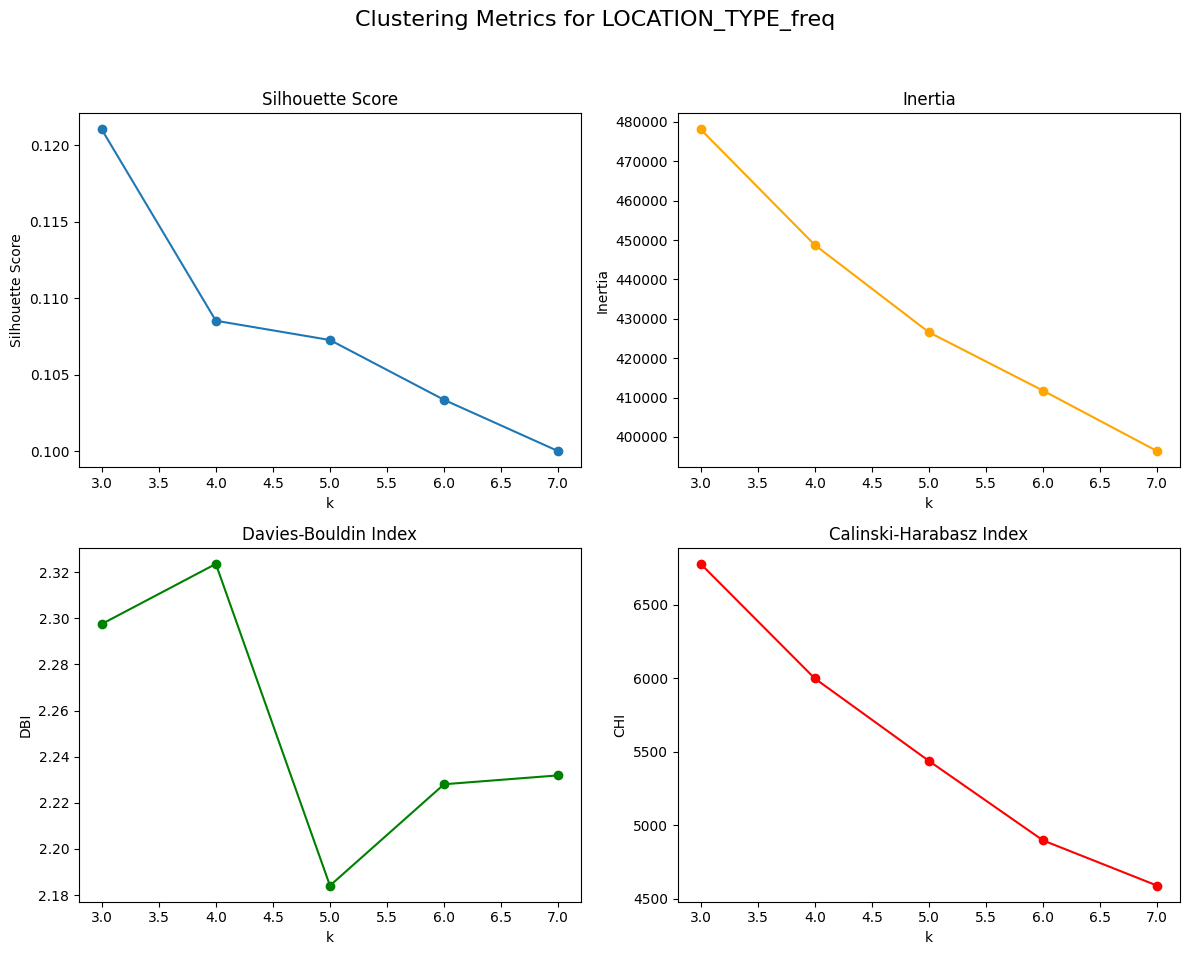



=== Clustering Analysis using PREMISES_TYPE_freq along with continuous and cyclical features ===

For k = 3:
  Silhouette Score       : 0.1200
  Inertia                : 472580.8872
  Davies-Bouldin Index   : 2.4813
  Calinski-Harabasz Index: 7173.1814

For k = 4:
  Silhouette Score       : 0.1084
  Inertia                : 448491.9301
  Davies-Bouldin Index   : 2.3190
  Calinski-Harabasz Index: 6011.1993

For k = 5:
  Silhouette Score       : 0.1044
  Inertia                : 428279.6353
  Davies-Bouldin Index   : 2.4118
  Calinski-Harabasz Index: 5361.8038

For k = 6:
  Silhouette Score       : 0.1044
  Inertia                : 409107.2244
  Davies-Bouldin Index   : 2.2446
  Calinski-Harabasz Index: 4999.3677

For k = 7:
  Silhouette Score       : 0.0945
  Inertia                : 399359.4905
  Davies-Bouldin Index   : 2.3125
  Calinski-Harabasz Index: 4488.6717

Summary for PREMISES_TYPE_freq
   k  Silhouette        Inertia       DBI          CHI
0  3    0.120027  472580.887162  2

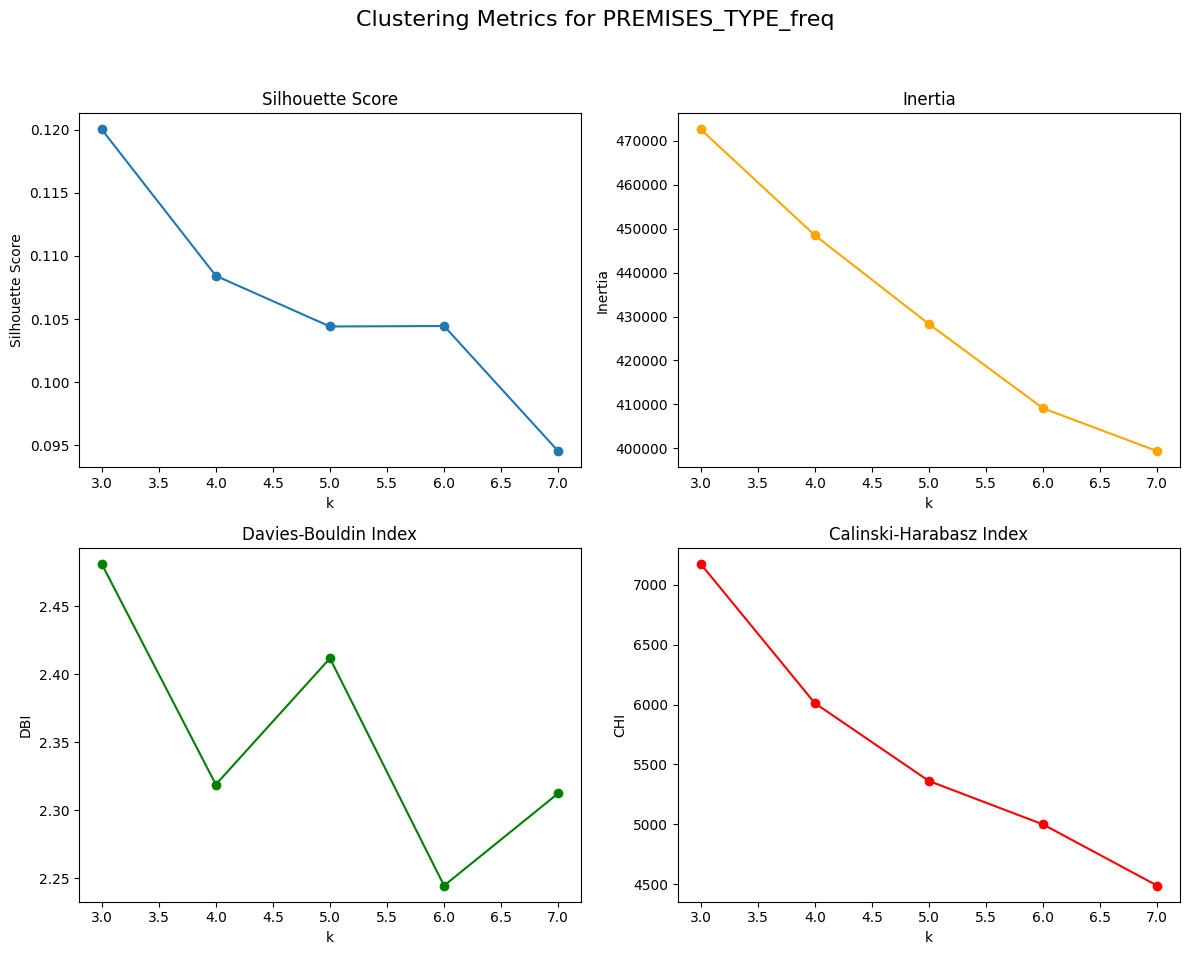



=== Clustering Analysis using HOOD_158_freq along with continuous and cyclical features ===

For k = 3:
  Silhouette Score       : 0.1223
  Inertia                : 472578.9492
  Davies-Bouldin Index   : 2.4600
  Calinski-Harabasz Index: 7173.3222

For k = 4:
  Silhouette Score       : 0.1117
  Inertia                : 448056.9240
  Davies-Bouldin Index   : 2.3066
  Calinski-Harabasz Index: 6034.5996

For k = 5:
  Silhouette Score       : 0.1229
  Inertia                : 402964.0661
  Davies-Bouldin Index   : 2.1496
  Calinski-Harabasz Index: 6551.5802

For k = 6:
  Silhouette Score       : 0.1220
  Inertia                : 382579.6458
  Davies-Bouldin Index   : 2.1369
  Calinski-Harabasz Index: 6099.1050


KeyboardInterrupt: 

In [ ]:
# Install prince if not already installed (uncomment the next line if needed)
# !pip install prince -qqq

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 1. Load the Data
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
try:
    df = pd.read_csv(url)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Display first few rows to verify
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# 2. Convert columns to integers and create new numeric columns
# Convert OCC_MONTH to integer and create OCC_MONTH_NUM
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['OCC_MONTH_NUM'] = df['OCC_MONTH'].map(month_mapping).astype(int)

# Convert OCC_HOUR to integer (assuming it's already 0-23)
df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)

# Convert OCC_DOW to integer and create OCC_DOW_NUM
dow_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['OCC_DOW_NUM'] = df['OCC_DOW'].map(dow_mapping).astype(int)

print("\nColumns converted to integers and new numeric columns created.")
print(df[['OCC_MONTH', 'OCC_MONTH_NUM', 'OCC_HOUR', 'OCC_DOW', 'OCC_DOW_NUM']].dtypes)
print(df[['OCC_MONTH', 'OCC_MONTH_NUM', 'OCC_HOUR', 'OCC_DOW', 'OCC_DOW_NUM']].head())

# 3. Cyclical Encoding (Sine/Cosine)
def cyclical_encode(df, col, period):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / period)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / period)
    return df

df = cyclical_encode(df, 'OCC_MONTH_NUM', 12)
df = cyclical_encode(df, 'OCC_HOUR', 24)
df = cyclical_encode(df, 'OCC_DOW_NUM', 7)

print("\nCyclical encoding applied.")

# 4. Frequency Encoding for DIVISION, LOCATION_TYPE, PREMISES_TYPE, HOOD_158
features_for_frequency_encoding = ['DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
for feature in features_for_frequency_encoding:
    # Compute frequency for each category
    freq = df[feature].value_counts()
    # Create a new column with frequency encoding
    df[feature + '_freq'] = df[feature].map(freq)

print("\nFrequency encoding applied for features: DIVISION, LOCATION_TYPE, PREMISES_TYPE, HOOD_158.")
print(df[[f + '_freq' for f in features_for_frequency_encoding]].head())

# 5. Clustering Analysis Loop
# Define groups of features:
# Continuous features (make sure these columns exist in your dataset)
continuous_features = ['OCC_YEAR', 'OCC_DOY', 'LONG_WGS84', 'LAT_WGS84']

# Cyclical encoded features
encoded_features = [
    'OCC_MONTH_NUM_sin', 'OCC_MONTH_NUM_cos',
    'OCC_HOUR_sin', 'OCC_HOUR_cos',
    'OCC_DOW_NUM_sin', 'OCC_DOW_NUM_cos'
]

# List of frequency encoded features (one at a time will be combined)
frequency_features = [f + '_freq' for f in features_for_frequency_encoding]

# Loop over each frequency encoded feature
for freq_feature in frequency_features:
    print(f"\n\n=== Clustering Analysis using {freq_feature} along with continuous and cyclical features ===")

    # Combine features for clustering
    clustering_features = continuous_features + encoded_features + [freq_feature]

    # Remove rows with missing values for these features
    X = df[clustering_features].dropna()

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # To store metrics for each k value
    results = []

    # Loop for k = 3 to k = 7
    for k in range(3, 8):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)

        # Compute metrics
        sil_score = silhouette_score(X_scaled, cluster_labels)
        inertia = kmeans.inertia_
        dbi = davies_bouldin_score(X_scaled, cluster_labels)
        chi = calinski_harabasz_score(X_scaled, cluster_labels)

        # Print metrics
        print(f"\nFor k = {k}:")
        print(f"  Silhouette Score       : {sil_score:.4f}")
        print(f"  Inertia                : {inertia:.4f}")
        print(f"  Davies-Bouldin Index   : {dbi:.4f}")
        print(f"  Calinski-Harabasz Index: {chi:.4f}")

        results.append({
            'k': k,
            'Silhouette': sil_score,
            'Inertia': inertia,
            'DBI': dbi,
            'CHI': chi
        })

    # Create a DataFrame for the results and display it
    results_df = pd.DataFrame(results)
    print("\nSummary for", freq_feature)
    print(results_df)

    # Plot the metrics vs. k
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].plot(results_df['k'], results_df['Silhouette'], marker='o')
    axs[0, 0].set_title("Silhouette Score")
    axs[0, 0].set_xlabel("k")
    axs[0, 0].set_ylabel("Silhouette Score")

    axs[0, 1].plot(results_df['k'], results_df['Inertia'], marker='o', color='orange')
    axs[0, 1].set_title("Inertia")
    axs[0, 1].set_xlabel("k")
    axs[0, 1].set_ylabel("Inertia")

    axs[1, 0].plot(results_df['k'], results_df['DBI'], marker='o', color='green')
    axs[1, 0].set_title("Davies-Bouldin Index")
    axs[1, 0].set_xlabel("k")
    axs[1, 0].set_ylabel("DBI")

    axs[1, 1].plot(results_df['k'], results_df['CHI'], marker='o', color='red')
    axs[1, 1].set_title("Calinski-Harabasz Index")
    axs[1, 1].set_xlabel("k")
    axs[1, 1].set_ylabel("CHI")

    fig.suptitle(f"Clustering Metrics for {freq_feature}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Data loaded successfully.

First 5 rows of the DataFrame:
   _id EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY    OCC_DOW  \
0    1  GO-20141263217    2013.0  December     31.0    365.0    Tuesday   
1   42  GO-20141262914    2014.0   January      1.0      1.0  Wednesday   
2  108  GO-20141266097    2014.0   January      2.0      2.0   Thursday   
3  126  GO-20141265947    2014.0   January      1.0      1.0  Wednesday   
4  140  GO-20141265795    2014.0   January      1.0      1.0  Wednesday   

   OCC_HOUR DIVISION                                      LOCATION_TYPE  \
0        17      D33                   Apartment (Rooming House, Condo)   
1        15      D43  Streets, Roads, Highways (Bicycle Path, Privat...   
2         1      D42  Single Home, House (Attach Garage, Cottage, Mo...   
3        15      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   
4        19      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   

  PREMISES_TYPE  HOOD_158               

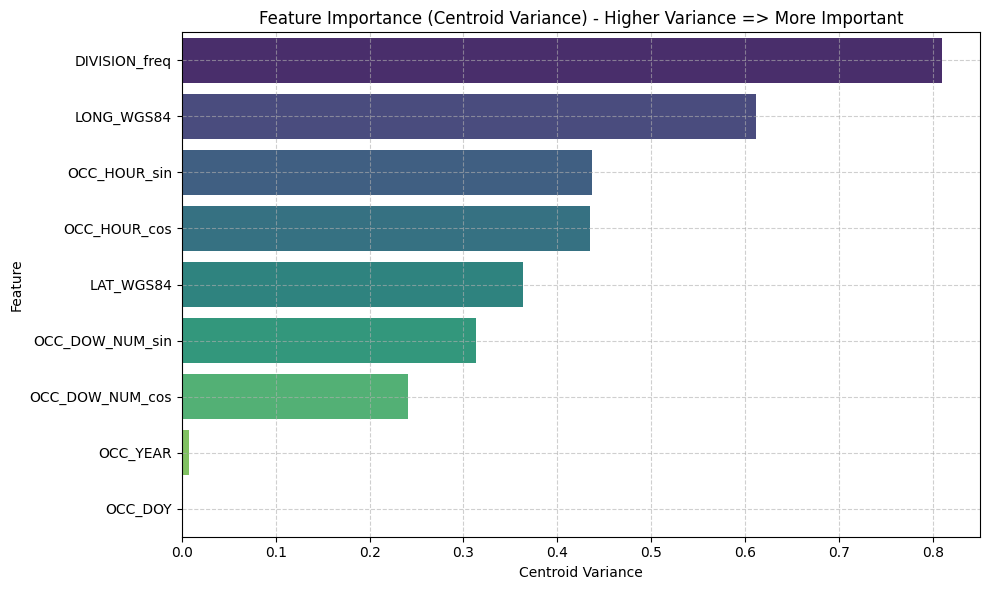


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.14  (Higher is better)
  Inertia                : 379094.60  (Lower is better)
  Davies-Bouldin Index   : 2.22  (Lower is better)
  Calinski-Harabasz Index: 7857.97  (Higher is better)

For k = 4:
  Silhouette Score       : 0.13  (Higher is better)
  Inertia                : 356773.21  (Lower is better)
  Davies-Bouldin Index   : 2.33  (Lower is better)
  Calinski-Harabasz Index: 6698.88  (Higher is better)

For k = 5:
  Silhouette Score       : 0.11  (Higher is better)
  Inertia                : 341668.58  (Lower is better)
  Davies-Bouldin Index   : 2.24  (Lower is better)
  Calinski-Harabasz Index: 5846.38  (Higher is better)

For k = 6:
  Silhouette Score       : 0.12  (Higher is better)
  Inertia                : 327247.04  (Lower is better)
  Davies-Bouldin Index   : 2.27  (Lower is better)
  Calinski-Harabasz Index: 5361.78  (Higher is better)

For k = 7:
  Silhouette Score       : 0.11  (Higher is b

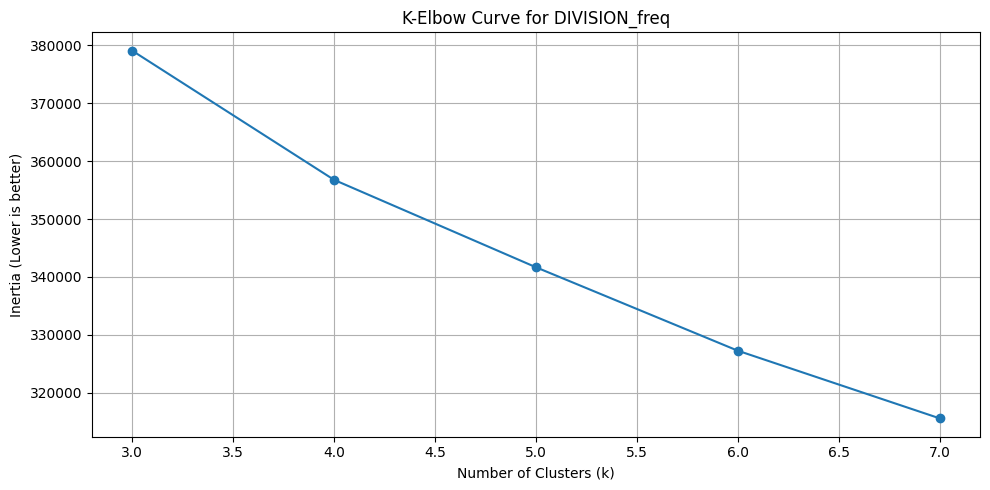


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0    24254
1    13327
2    16730


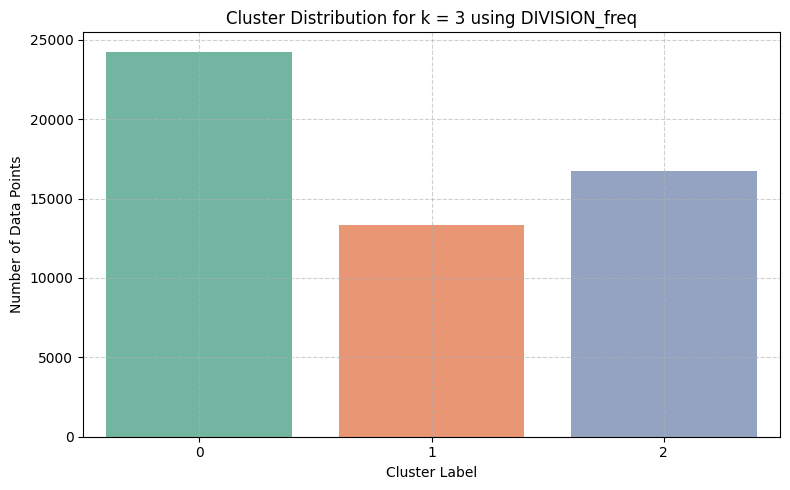


For k = 4, Cluster Counts:
0    15882
1     8752
2    13180
3    16497


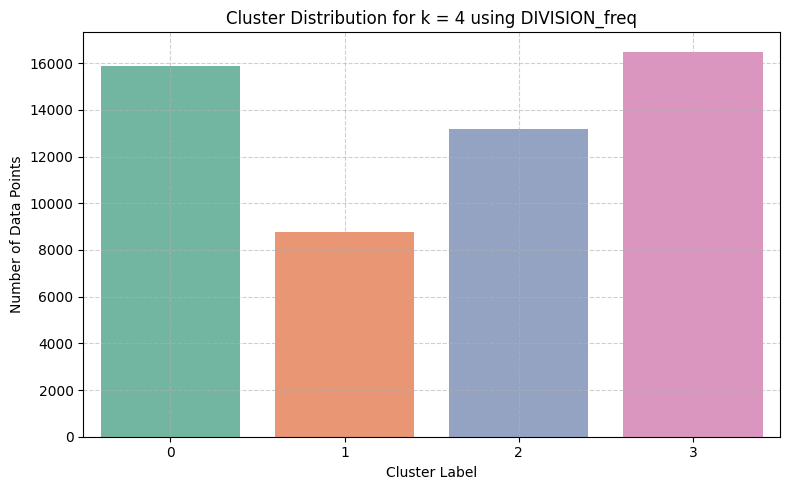


For k = 5, Cluster Counts:
0    10310
1    14349
2    12104
3     8428
4     9120


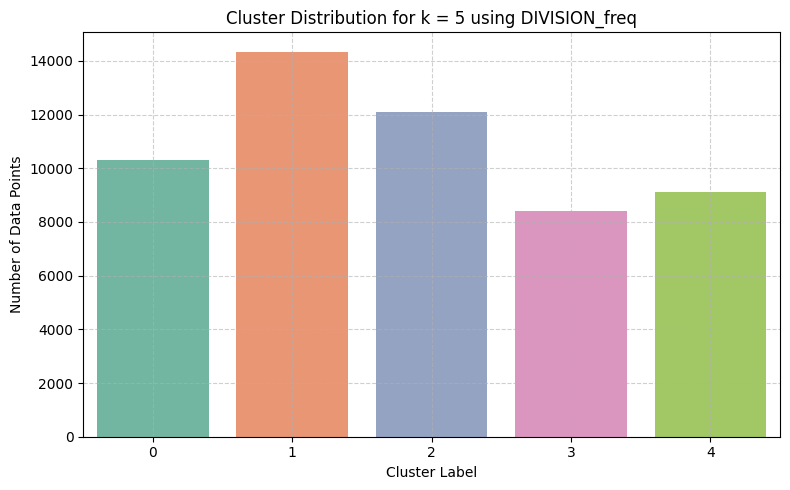


For k = 6, Cluster Counts:
0    12696
1    10562
2     9715
3     7860
4     6710
5     6768


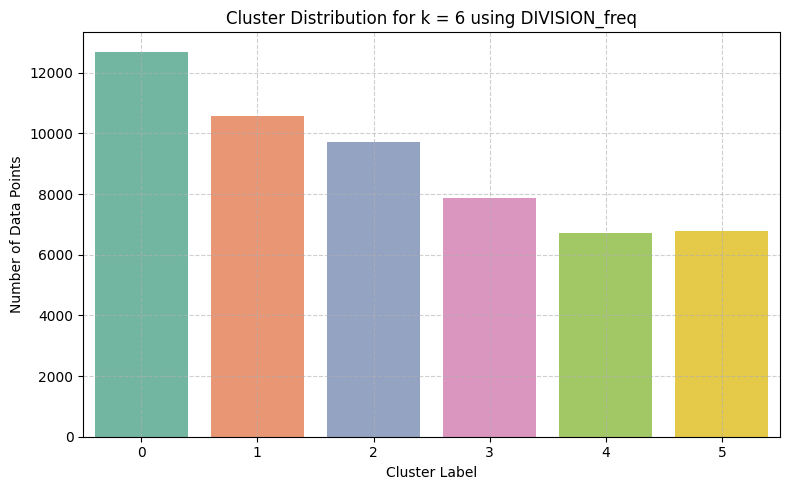


For k = 7, Cluster Counts:
0    9627
1    7003
2    6922
3    9916
4    6680
5    5996
6    8167


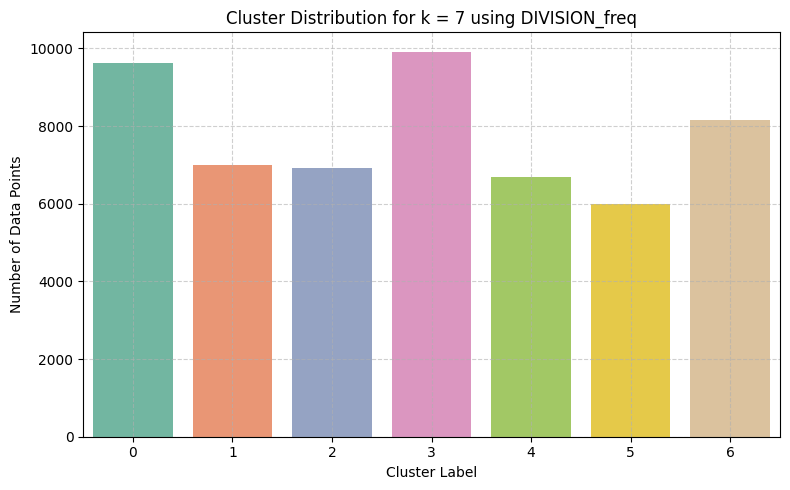

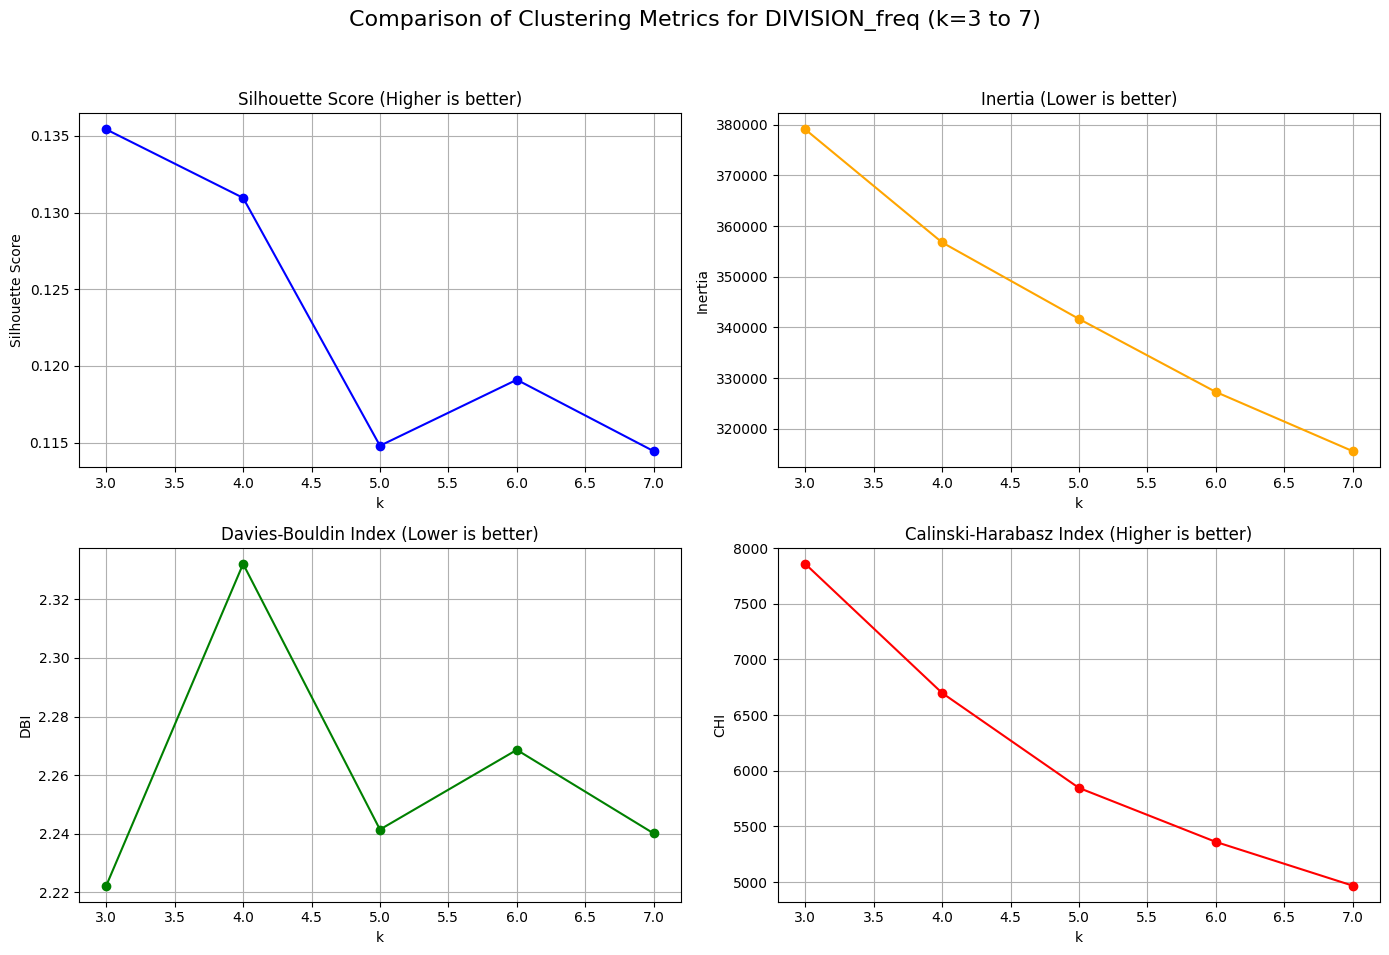



========== Analysis using LOCATION_TYPE_freq along with continuous and cyclical features ==========

--- Feature Importance (Centroid Variance) for k = 7 ---
           Feature  Centroid Variance
LOCATION_TYPE_freq           0.849018
      OCC_HOUR_sin           0.486989
      OCC_HOUR_cos           0.483540
          OCC_YEAR           0.407659
        LONG_WGS84           0.327536
   OCC_DOW_NUM_cos           0.294681
         LAT_WGS84           0.277513
   OCC_DOW_NUM_sin           0.005101
           OCC_DOY           0.002680


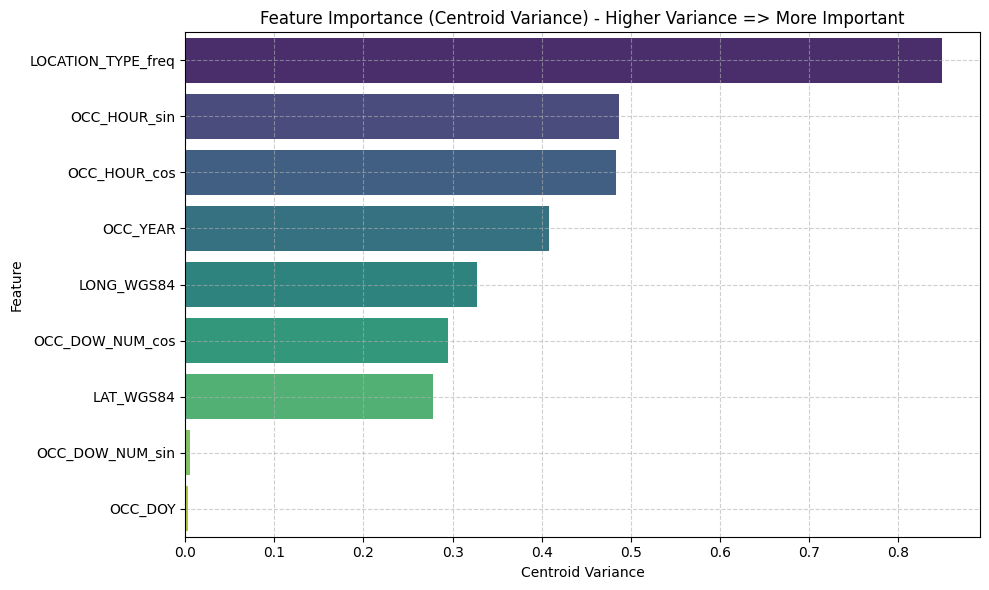


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.11  (Higher is better)
  Inertia                : 399752.86  (Lower is better)
  Davies-Bouldin Index   : 2.54  (Lower is better)
  Calinski-Harabasz Index: 6048.65  (Higher is better)

For k = 4:
  Silhouette Score       : 0.12  (Higher is better)
  Inertia                : 371199.57  (Lower is better)
  Davies-Bouldin Index   : 2.27  (Lower is better)
  Calinski-Harabasz Index: 5734.99  (Higher is better)

For k = 5:
  Silhouette Score       : 0.11  (Higher is better)
  Inertia                : 349857.00  (Lower is better)
  Davies-Bouldin Index   : 2.19  (Lower is better)
  Calinski-Harabasz Index: 5391.79  (Higher is better)

For k = 6:
  Silhouette Score       : 0.10  (Higher is better)
  Inertia                : 333838.70  (Lower is better)
  Davies-Bouldin Index   : 2.06  (Lower is better)
  Calinski-Harabasz Index: 5041.44  (Higher is better)

For k = 7:
  Silhouette Score       : 0.09  (Higher is b

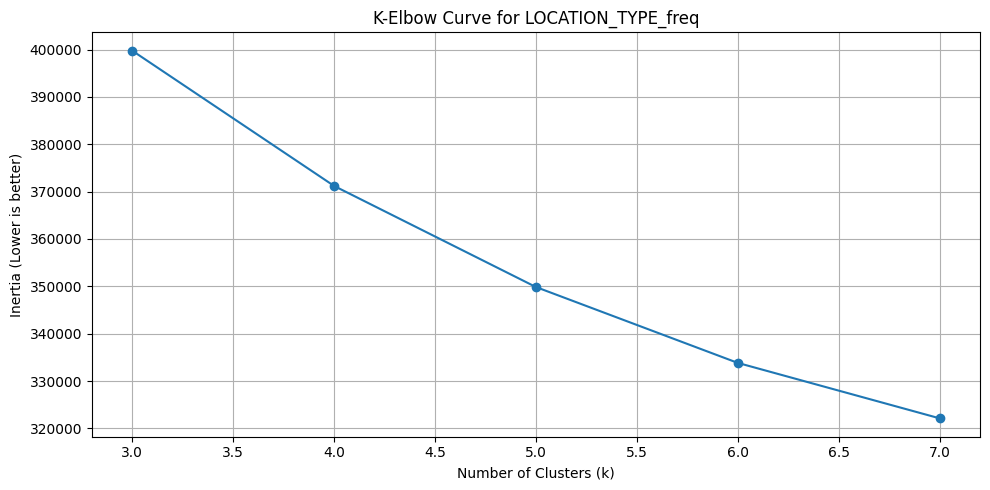


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0    23907
1    14498
2    15906


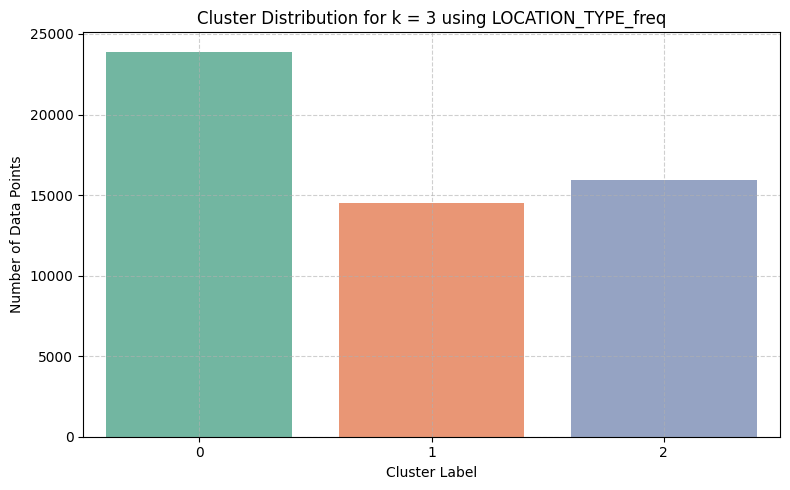


For k = 4, Cluster Counts:
0    23130
1     6621
2    11561
3    12999


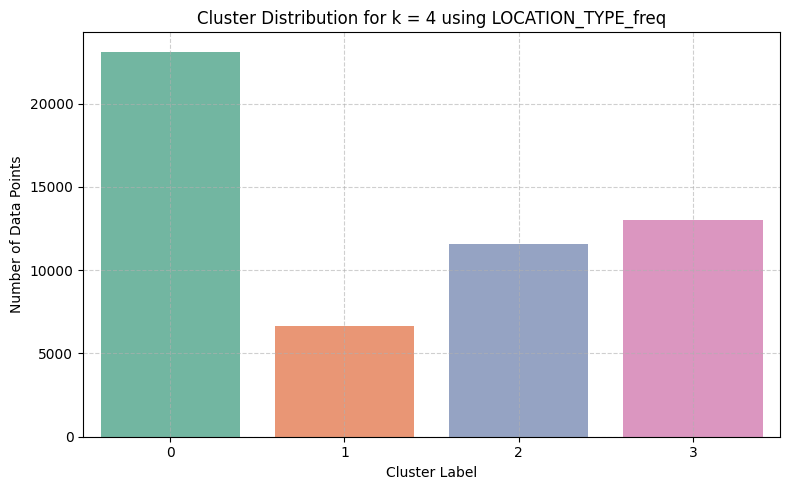


For k = 5, Cluster Counts:
0    15151
1     6617
2    11404
3    11073
4    10066


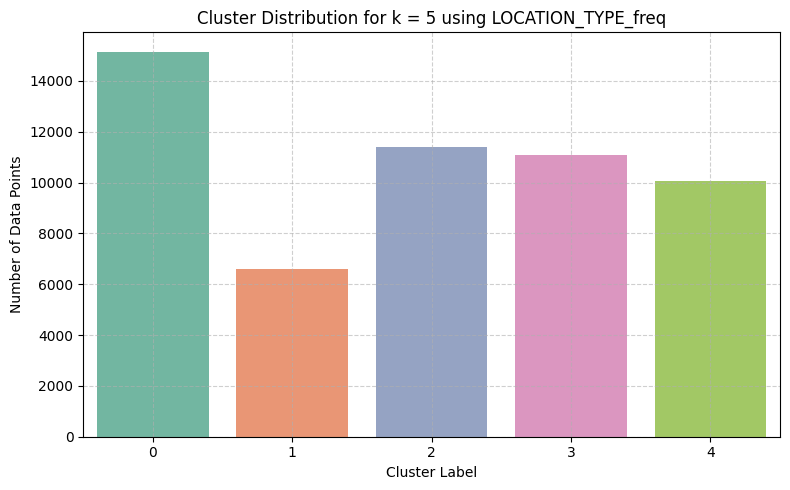


For k = 6, Cluster Counts:
0     6593
1    11066
2     9749
3     9142
4     9685
5     8076


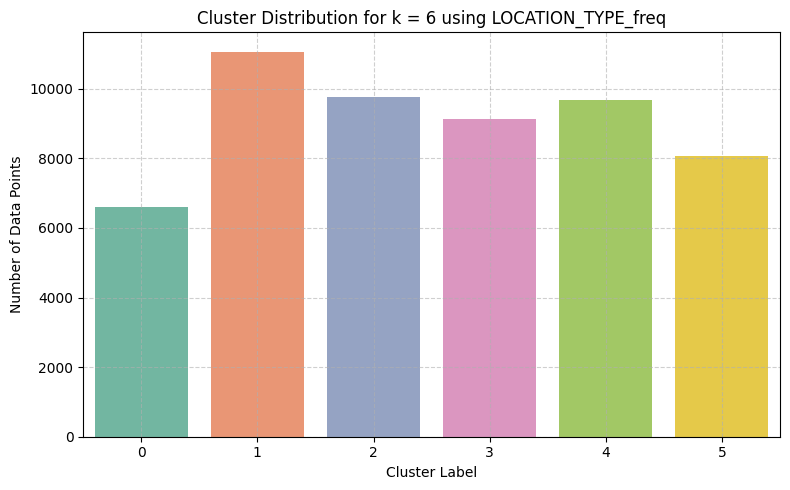


For k = 7, Cluster Counts:
0    7156
1    8913
2    7166
3    7508
4    7200
5    6594
6    9774


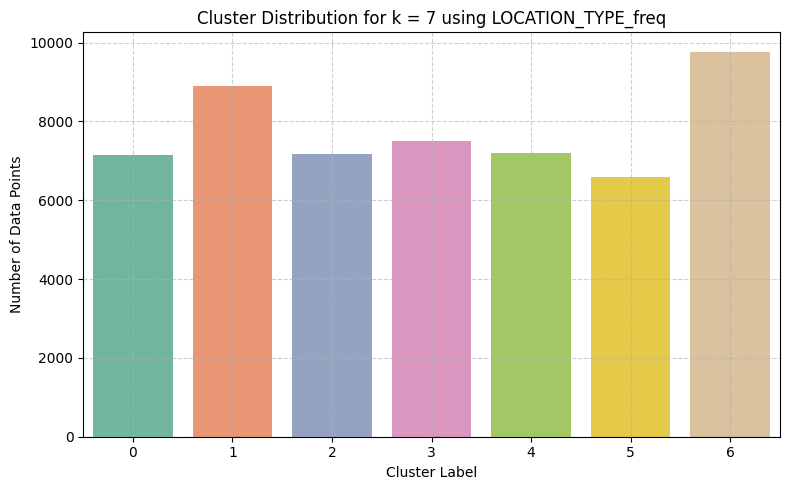

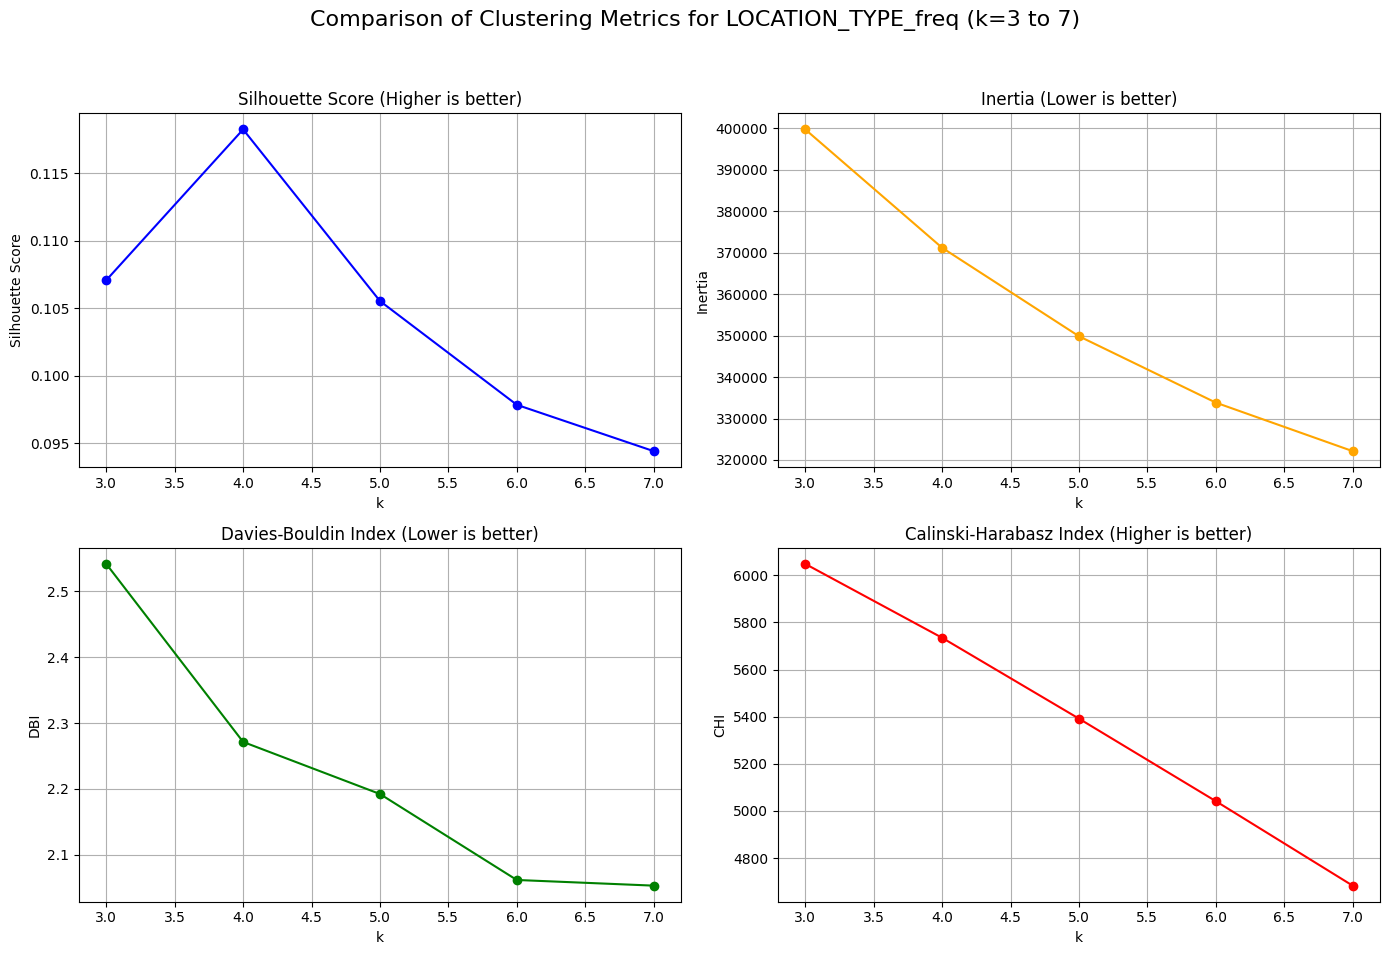



========== Analysis using PREMISES_TYPE_freq along with continuous and cyclical features ==========

--- Feature Importance (Centroid Variance) for k = 7 ---
           Feature  Centroid Variance
PREMISES_TYPE_freq           0.856515
      OCC_HOUR_sin           0.502207
      OCC_HOUR_cos           0.452395
          OCC_YEAR           0.422446
        LONG_WGS84           0.334340
   OCC_DOW_NUM_cos           0.291034
         LAT_WGS84           0.284012
   OCC_DOW_NUM_sin           0.005614
           OCC_DOY           0.002670


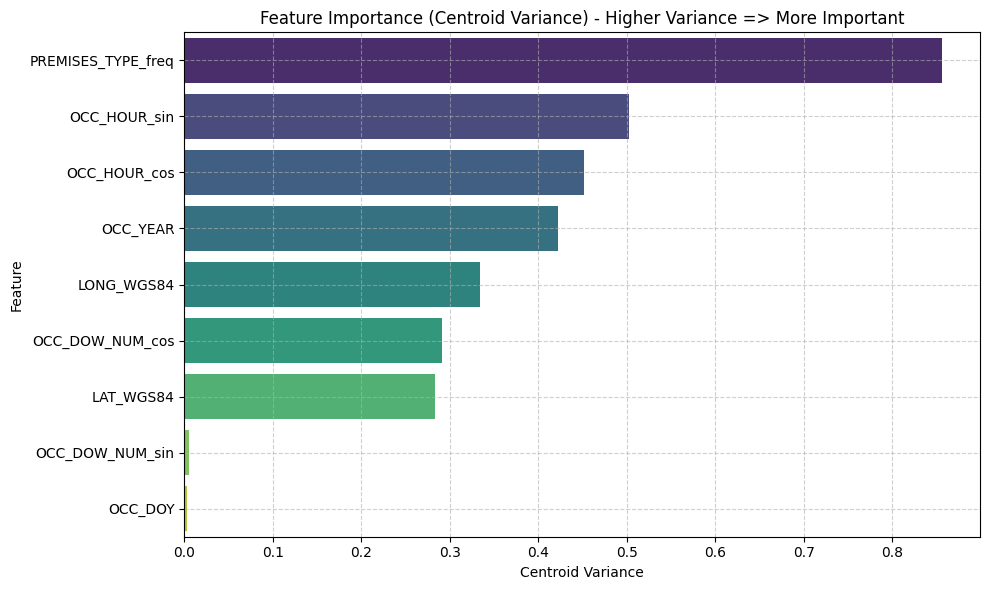


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.11  (Higher is better)
  Inertia                : 399860.33  (Lower is better)
  Davies-Bouldin Index   : 2.50  (Lower is better)
  Calinski-Harabasz Index: 6039.74  (Higher is better)

For k = 4:
  Silhouette Score       : 0.12  (Higher is better)
  Inertia                : 371924.12  (Lower is better)
  Davies-Bouldin Index   : 2.26  (Lower is better)
  Calinski-Harabasz Index: 5688.58  (Higher is better)

For k = 5:
  Silhouette Score       : 0.11  (Higher is better)
  Inertia                : 349625.60  (Lower is better)
  Davies-Bouldin Index   : 2.17  (Lower is better)
  Calinski-Harabasz Index: 5404.34  (Higher is better)

For k = 6:
  Silhouette Score       : 0.10  (Higher is better)
  Inertia                : 334364.29  (Lower is better)
  Davies-Bouldin Index   : 2.06  (Lower is better)
  Calinski-Harabasz Index: 5016.44  (Higher is better)

For k = 7:
  Silhouette Score       : 0.09  (Higher is b

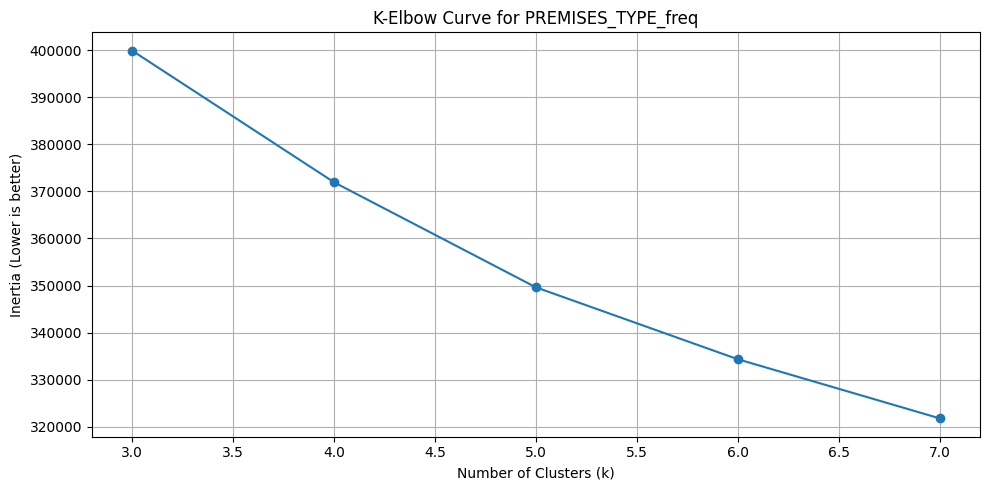


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0    13495
1    15099
2    25717


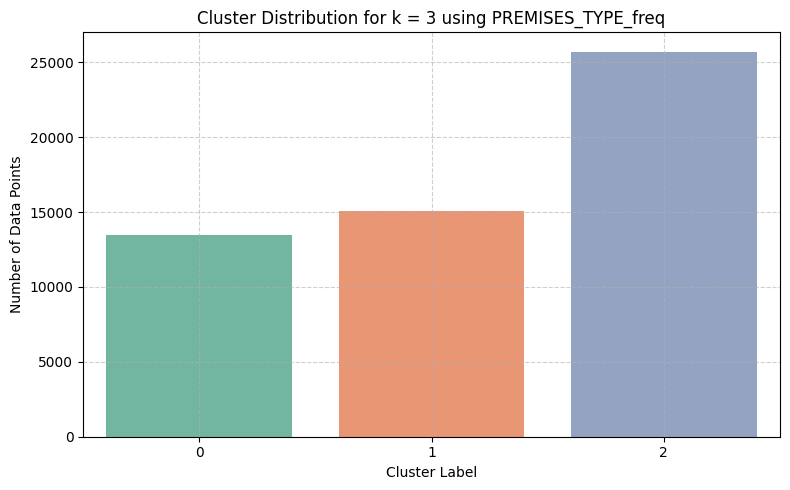


For k = 4, Cluster Counts:
0     6391
1    23275
2    11572
3    13073


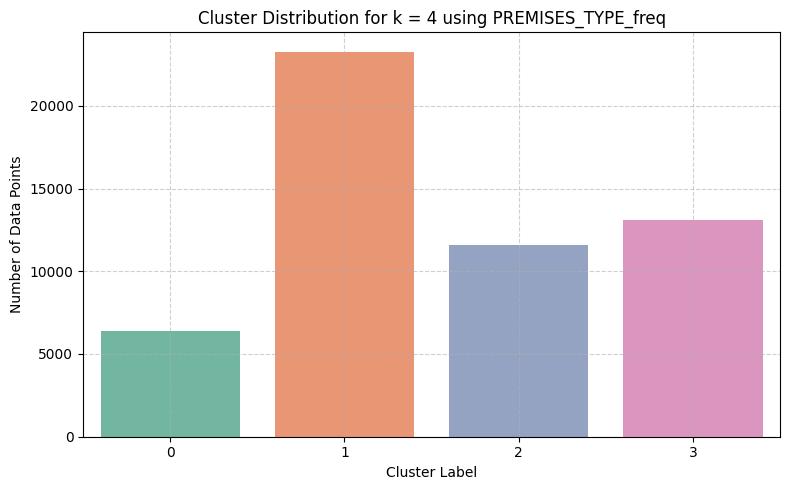


For k = 5, Cluster Counts:
0    14714
1     6325
2    12085
3    10130
4    11057


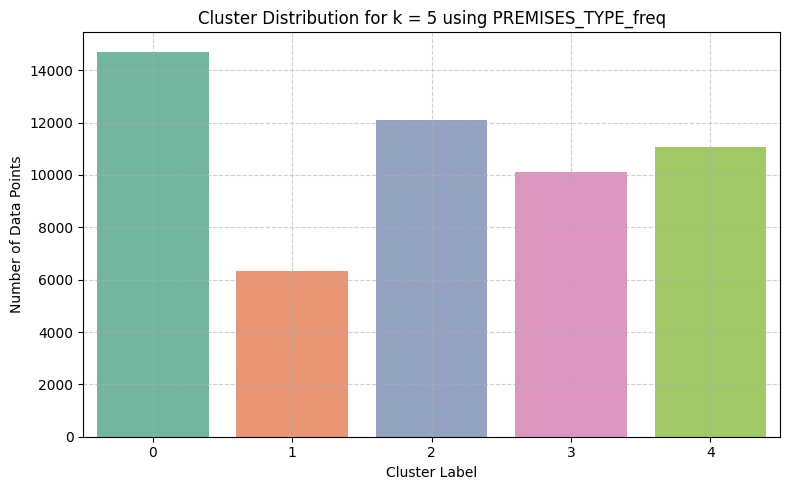


For k = 6, Cluster Counts:
0     6268
1    11869
2     9217
3     9804
4     8098
5     9055


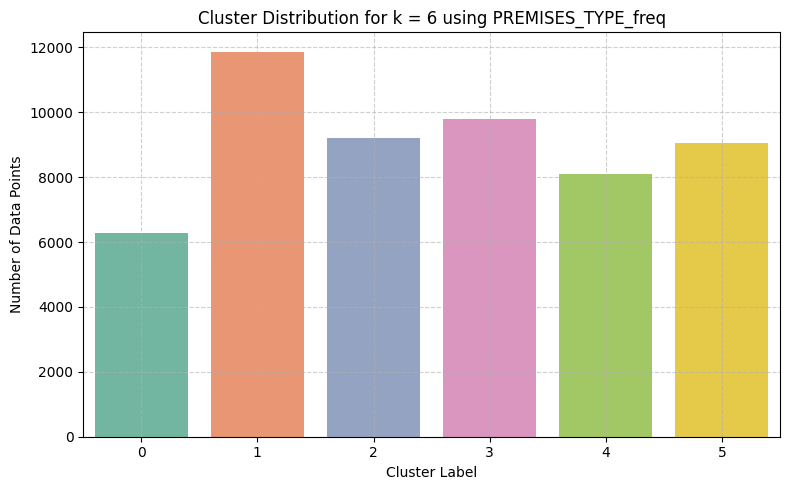


For k = 7, Cluster Counts:
0    7381
1    9773
2    6232
3    7789
4    6856
5    8834
6    7446


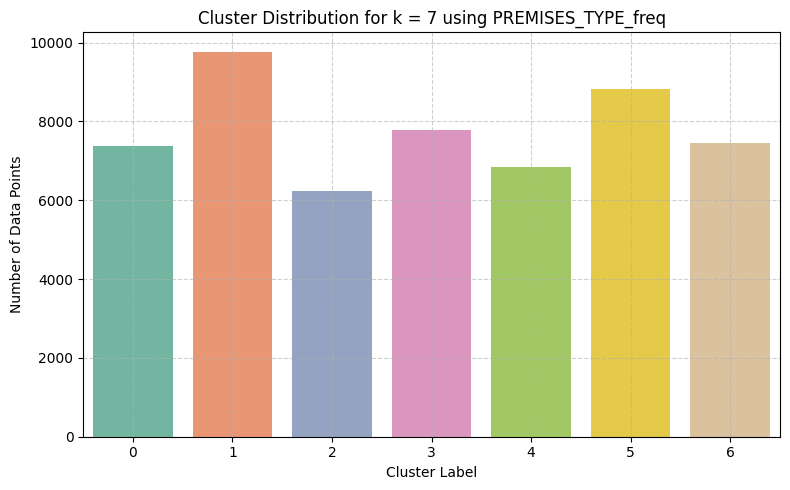

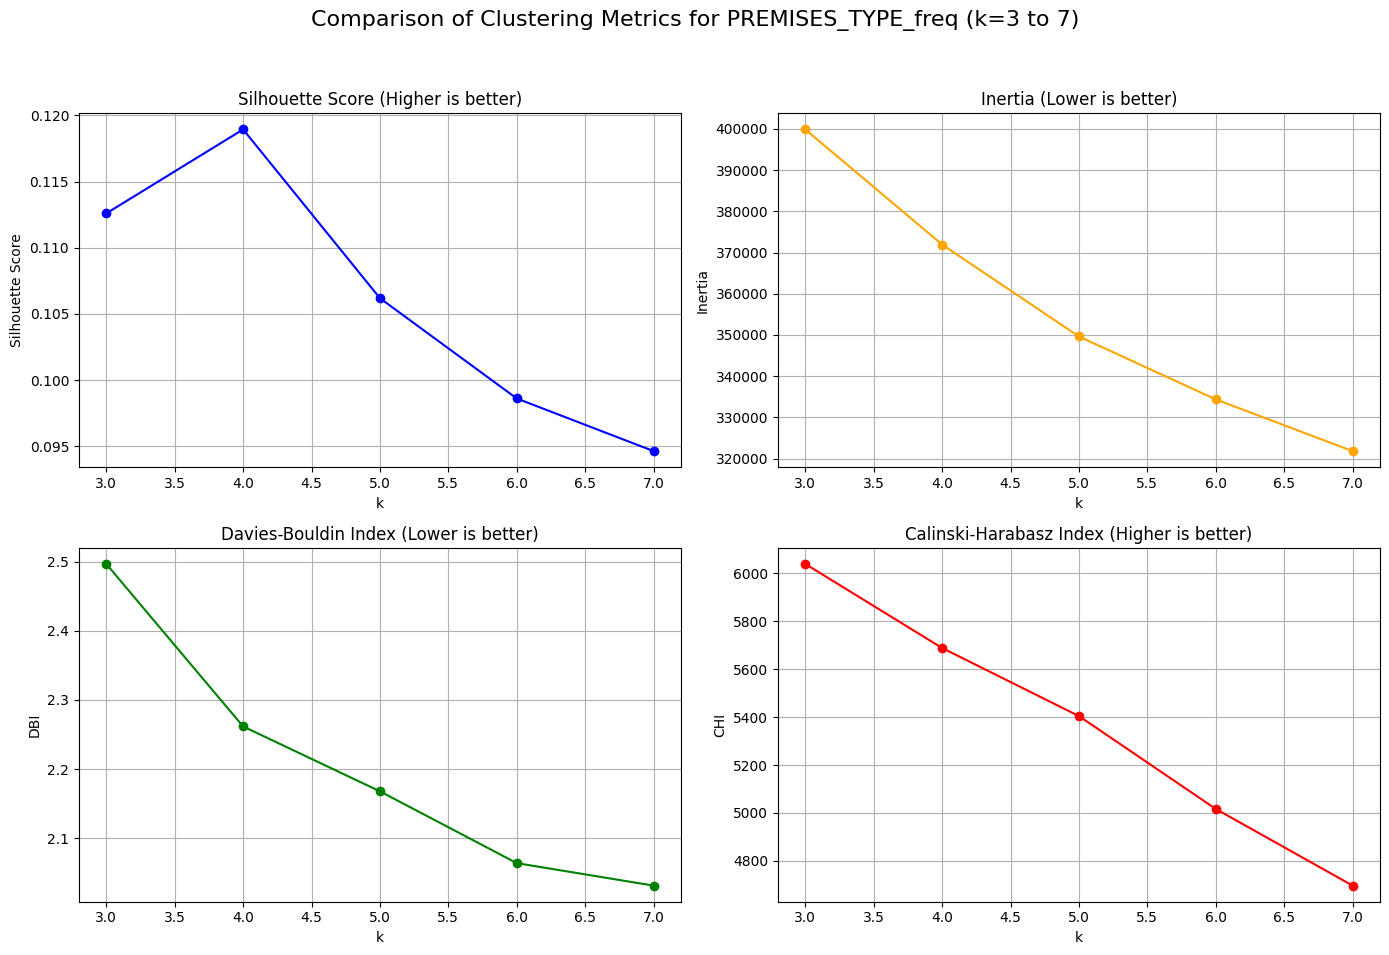



========== Analysis using HOOD_158_freq along with continuous and cyclical features ==========

--- Feature Importance (Centroid Variance) for k = 7 ---
        Feature  Centroid Variance
  HOOD_158_freq           1.740172
     LONG_WGS84           0.614024
   OCC_HOUR_sin           0.528732
   OCC_HOUR_cos           0.461138
OCC_DOW_NUM_cos           0.350296
      LAT_WGS84           0.291894
OCC_DOW_NUM_sin           0.273487
       OCC_YEAR           0.040375
        OCC_DOY           0.000430


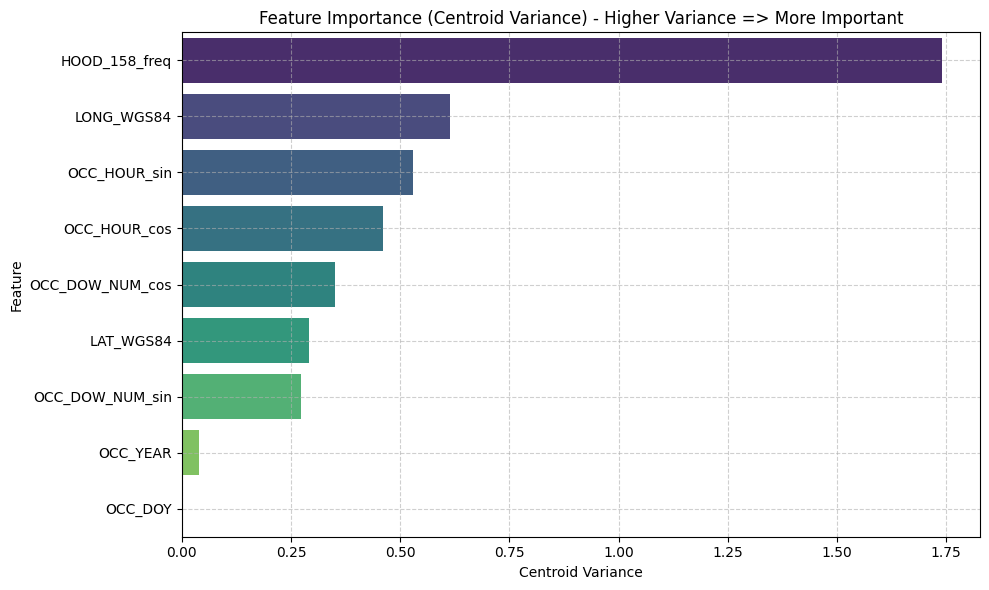


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.14  (Higher is better)
  Inertia                : 379810.56  (Lower is better)
  Davies-Bouldin Index   : 2.12  (Lower is better)
  Calinski-Harabasz Index: 7792.00  (Higher is better)

For k = 4:
  Silhouette Score       : 0.14  (Higher is better)
  Inertia                : 348805.81  (Lower is better)
  Davies-Bouldin Index   : 2.06  (Lower is better)
  Calinski-Harabasz Index: 7265.41  (Higher is better)

For k = 5:
  Silhouette Score       : 0.13  (Higher is better)
  Inertia                : 325804.78  (Lower is better)
  Davies-Bouldin Index   : 2.01  (Lower is better)
  Calinski-Harabasz Index: 6792.09  (Higher is better)

For k = 6:
  Silhouette Score       : 0.12  (Higher is better)
  Inertia                : 310337.54  (Lower is better)
  Davies-Bouldin Index   : 1.91  (Lower is better)
  Calinski-Harabasz Index: 6245.69  (Higher is better)

For k = 7:
  Silhouette Score       : 0.12  (Higher is b

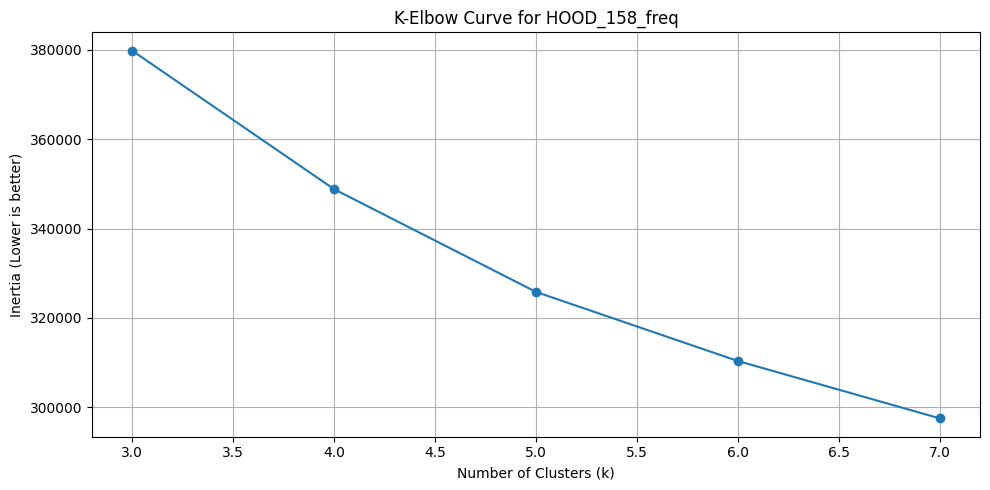


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0    32159
1    18428
2     3724


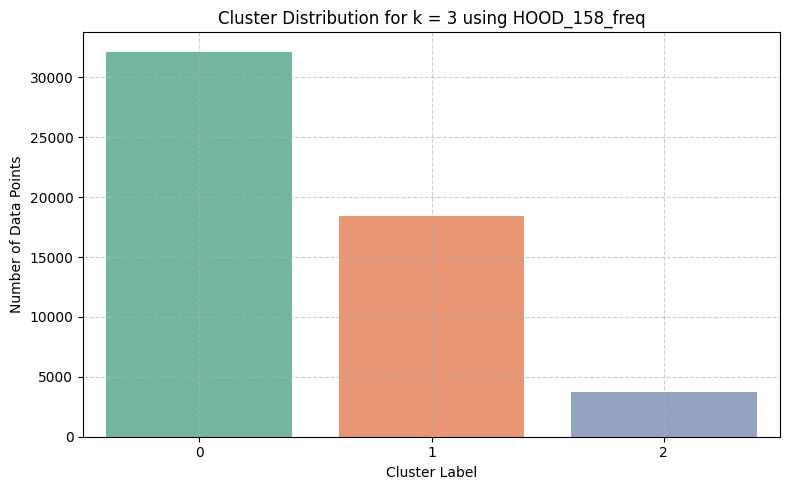


For k = 4, Cluster Counts:
0    23920
1    14249
2     3724
3    12418


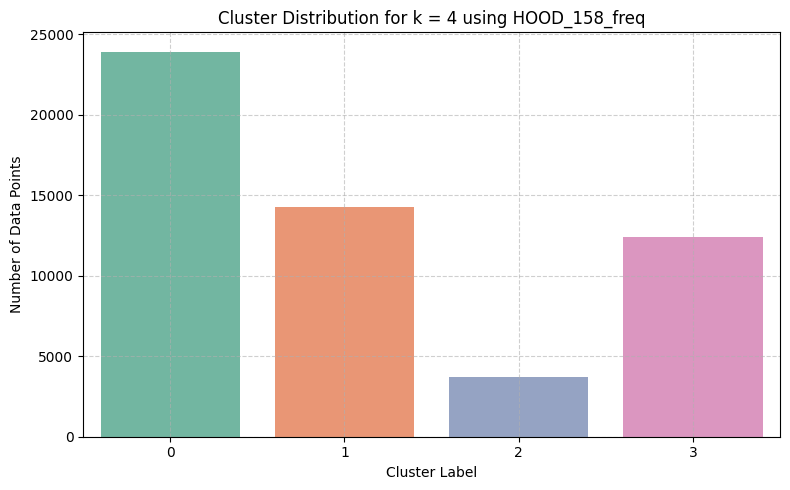


For k = 5, Cluster Counts:
0    15742
1    12100
2    11958
3    10787
4     3724


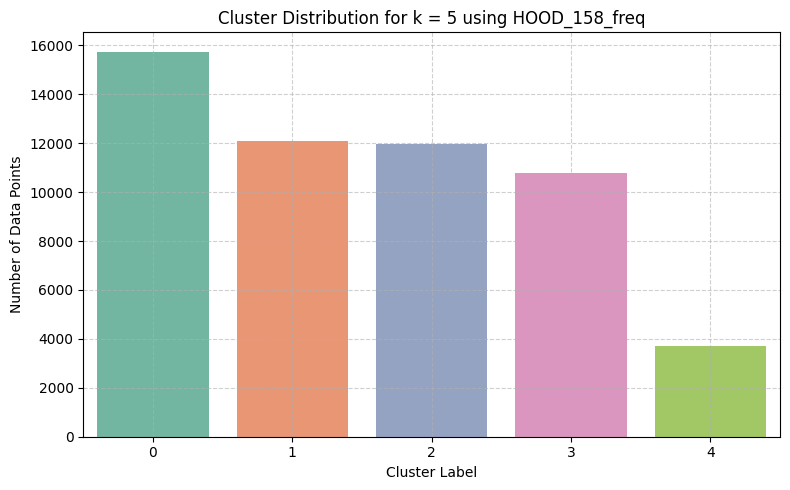


For k = 6, Cluster Counts:
0     9783
1    12570
2    10493
3     8255
4     9486
5     3724


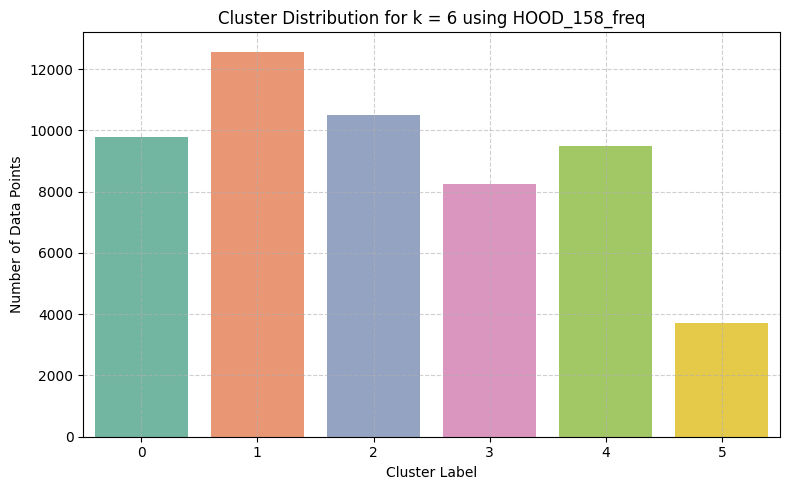


For k = 7, Cluster Counts:
0     8054
1     8067
2    10249
3     9451
4     7180
5     7586
6     3724


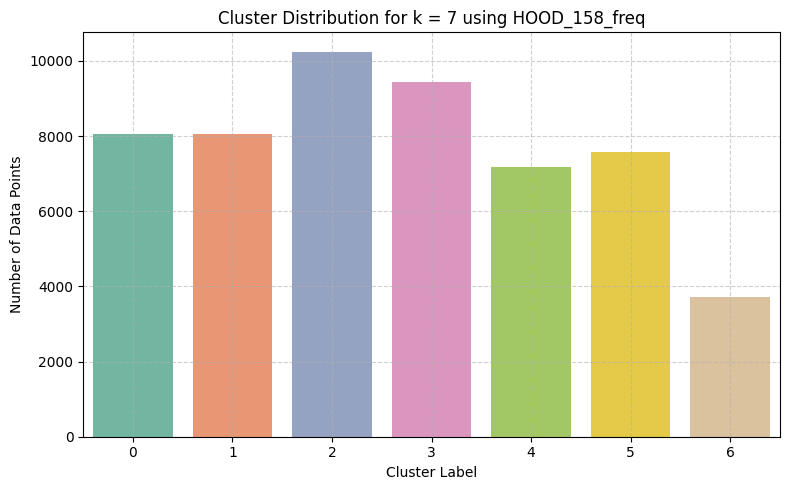

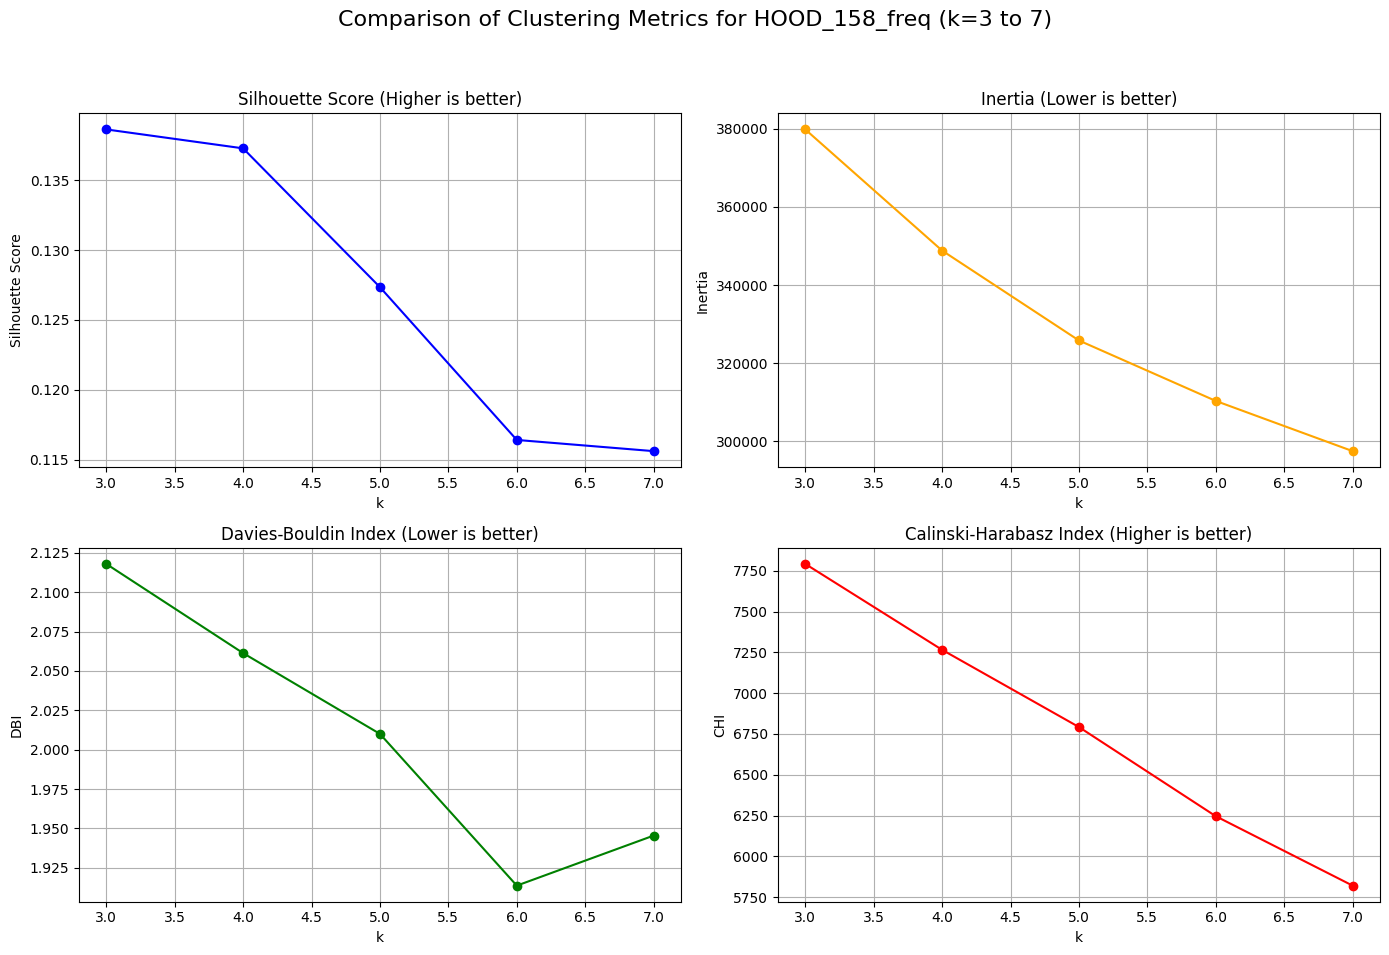

In [ ]:
# Install prince if not already installed (uncomment the next line if needed)
# !pip install prince -qqq

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 1. Load the Data
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
try:
    df = pd.read_csv(url)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# 2. Convert columns to integers and create new numeric columns
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['OCC_MONTH_NUM'] = df['OCC_MONTH'].map(month_mapping).astype(int)
df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)
dow_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['OCC_DOW_NUM'] = df['OCC_DOW'].map(dow_mapping).astype(int)

print("\nColumns converted and new numeric columns created:")
print(df[['OCC_MONTH', 'OCC_MONTH_NUM', 'OCC_HOUR', 'OCC_DOW', 'OCC_DOW_NUM']].head())

# 3. Cyclical Encoding (Sine/Cosine)
def cyclical_encode(df, col, period):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / period)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / period)
    return df

df = cyclical_encode(df, 'OCC_MONTH_NUM', 12)
df = cyclical_encode(df, 'OCC_HOUR', 24)
df = cyclical_encode(df, 'OCC_DOW_NUM', 7)

print("\nCyclical encoding applied.")

# 4. Frequency Encoding for selected categorical features
features_for_frequency_encoding = ['DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
for feature in features_for_frequency_encoding:
    freq = df[feature].value_counts()
    df[feature + '_freq'] = df[feature].map(freq)

print("\nFrequency encoding applied for features:")
print(df[[f + '_freq' for f in features_for_frequency_encoding]].head())

# 5. Define feature groups for clustering
# Continuous features (ensure these exist in your dataset)
continuous_features = ['OCC_YEAR', 'OCC_DOY', 'LONG_WGS84', 'LAT_WGS84']
# Cyclical encoded features
encoded_features = [
    'OCC_HOUR_sin', 'OCC_HOUR_cos',
    'OCC_DOW_NUM_sin', 'OCC_DOW_NUM_cos'
]
# Frequency-encoded features (we will select one at a time)
frequency_features = [f + '_freq' for f in features_for_frequency_encoding]

# Loop over each frequency-encoded feature
for freq_feature in frequency_features:
    print(f"\n\n========== Analysis using {freq_feature} along with continuous and cyclical features ==========")

    # Combine features for clustering
    clustering_features = continuous_features + encoded_features + [freq_feature]
    X = df[clustering_features].dropna()

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # -----------------------------------------
    # A. FEATURE IMPORTANCE (using k=7 for this purpose)
    # -----------------------------------------
    selected_k = 7
    kmeans_importance = KMeans(n_clusters=selected_k, random_state=42, n_init=10)
    kmeans_importance.fit(X_scaled)
    centroids = kmeans_importance.cluster_centers_
    # Compute variance across centroids for each feature (as an importance metric)
    centroid_variance = np.var(centroids, axis=0)
    importance_df = pd.DataFrame({
        'Feature': clustering_features,
        'Centroid Variance': centroid_variance
    }).sort_values(by='Centroid Variance', ascending=False)

    print("\n--- Feature Importance (Centroid Variance) for k = 7 ---")
    print(importance_df.to_string(index=False))

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Centroid Variance', y='Feature', data=importance_df, palette='viridis')
    plt.title("Feature Importance (Centroid Variance) - Higher Variance => More Important")
    plt.xlabel("Centroid Variance")
    plt.ylabel("Feature")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # -----------------------------------------
    # B. K-ELBOW ANALYSIS (for k=3 to k=7)
    # -----------------------------------------
    inertia_values = []
    metrics = []  # to store all metrics for each k
    print("\n--- K-Elbow Analysis (k=3 to k=7) ---")
    for k in range(3, 8):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)

        sil_score = silhouette_score(X_scaled, cluster_labels)
        inertia = kmeans.inertia_
        db_index = davies_bouldin_score(X_scaled, cluster_labels)
        ch_index = calinski_harabasz_score(X_scaled, cluster_labels)

        inertia_values.append(inertia)
        metrics.append({
            'k': k,
            'Silhouette': sil_score,
            'Inertia': inertia,
            'Davies-Bouldin': db_index,
            'Calinski-Harabasz': ch_index
        })

        print(f"\nFor k = {k}:")
        print(f"  Silhouette Score       : {sil_score:.2f}  (Higher is better)")
        print(f"  Inertia                : {inertia:.2f}  (Lower is better)")
        print(f"  Davies-Bouldin Index   : {db_index:.2f}  (Lower is better)")
        print(f"  Calinski-Harabasz Index: {ch_index:.2f}  (Higher is better)")

    metrics_df = pd.DataFrame(metrics)
    print("\nK-Elbow Summary:")
    print(metrics_df.to_string(index=False))

    # Plot Elbow Curve (Inertia vs. k)
    plt.figure(figsize=(10, 5))
    plt.plot(range(3, 8), inertia_values, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Lower is better)")
    plt.title(f"K-Elbow Curve for {freq_feature}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # -----------------------------------------
    # C. NUMBER OF POINTS IN EACH CLUSTER (for k=3 to k=7)
    # -----------------------------------------
    print("\n--- Number of Points in Each Cluster ---")
    cluster_counts_dict = {}  # to store counts for each k
    for k in range(3, 8):
        kmeans_counts = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans_counts.fit_predict(X_scaled)
        # Create a series with cluster counts
        cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
        cluster_counts_dict[k] = cluster_counts
        print(f"\nFor k = {k}, Cluster Counts:")
        print(cluster_counts.to_string())

        # Plot cluster distribution for this k
        plt.figure(figsize=(8, 5))
        sns.countplot(x=cluster_labels, palette="Set2")
        plt.title(f"Cluster Distribution for k = {k} using {freq_feature}")
        plt.xlabel("Cluster Label")
        plt.ylabel("Number of Data Points")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    # -----------------------------------------
    # D. COMPARISON PLOTS OF ALL METRICS (for k=3 to k=7)
    # -----------------------------------------
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Silhouette Score (Higher is better)
    axs[0, 0].plot(metrics_df['k'], metrics_df['Silhouette'], marker='o', color='blue')
    axs[0, 0].set_title("Silhouette Score (Higher is better)")
    axs[0, 0].set_xlabel("k")
    axs[0, 0].set_ylabel("Silhouette Score")
    axs[0, 0].grid(True)

    # Inertia (Lower is better)
    axs[0, 1].plot(metrics_df['k'], metrics_df['Inertia'], marker='o', color='orange')
    axs[0, 1].set_title("Inertia (Lower is better)")
    axs[0, 1].set_xlabel("k")
    axs[0, 1].set_ylabel("Inertia")
    axs[0, 1].grid(True)

    # Davies-Bouldin Index (Lower is better)
    axs[1, 0].plot(metrics_df['k'], metrics_df['Davies-Bouldin'], marker='o', color='green')
    axs[1, 0].set_title("Davies-Bouldin Index (Lower is better)")
    axs[1, 0].set_xlabel("k")
    axs[1, 0].set_ylabel("DBI")
    axs[1, 0].grid(True)

    # Calinski-Harabasz Index (Higher is better)
    axs[1, 1].plot(metrics_df['k'], metrics_df['Calinski-Harabasz'], marker='o', color='red')
    axs[1, 1].set_title("Calinski-Harabasz Index (Higher is better)")
    axs[1, 1].set_xlabel("k")
    axs[1, 1].set_ylabel("CHI")
    axs[1, 1].grid(True)

    fig.suptitle(f"Comparison of Clustering Metrics for {freq_feature} (k=3 to 7)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Data loaded successfully.

First 5 rows of the DataFrame:
   _id EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY    OCC_DOW  \
0    1  GO-20141263217    2013.0  December     31.0    365.0    Tuesday   
1   42  GO-20141262914    2014.0   January      1.0      1.0  Wednesday   
2  108  GO-20141266097    2014.0   January      2.0      2.0   Thursday   
3  126  GO-20141265947    2014.0   January      1.0      1.0  Wednesday   
4  140  GO-20141265795    2014.0   January      1.0      1.0  Wednesday   

   OCC_HOUR DIVISION                                      LOCATION_TYPE  \
0        17      D33                   Apartment (Rooming House, Condo)   
1        15      D43  Streets, Roads, Highways (Bicycle Path, Privat...   
2         1      D42  Single Home, House (Attach Garage, Cottage, Mo...   
3        15      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   
4        19      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   

  PREMISES_TYPE  HOOD_158               

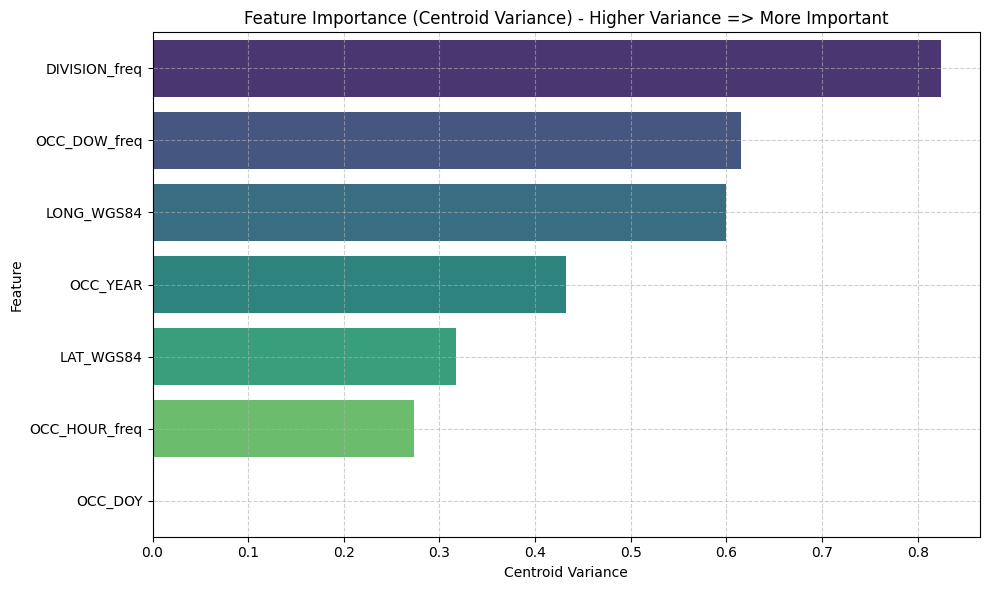


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.18  (Higher is better)
  Inertia                : 270545.05  (Lower is better)
  Davies-Bouldin Index   : 1.85  (Lower is better)
  Calinski-Harabasz Index: 11003.51  (Higher is better)

For k = 4:
  Silhouette Score       : 0.16  (Higher is better)
  Inertia                : 250814.31  (Lower is better)
  Davies-Bouldin Index   : 2.07  (Lower is better)
  Calinski-Harabasz Index: 9336.70  (Higher is better)

For k = 5:
  Silhouette Score       : 0.15  (Higher is better)
  Inertia                : 234969.74  (Lower is better)
  Davies-Bouldin Index   : 2.04  (Lower is better)
  Calinski-Harabasz Index: 8390.06  (Higher is better)

For k = 6:
  Silhouette Score       : 0.15  (Higher is better)
  Inertia                : 222512.63  (Lower is better)
  Davies-Bouldin Index   : 1.93  (Lower is better)
  Calinski-Harabasz Index: 7695.73  (Higher is better)

For k = 7:
  Silhouette Score       : 0.15  (Higher is 

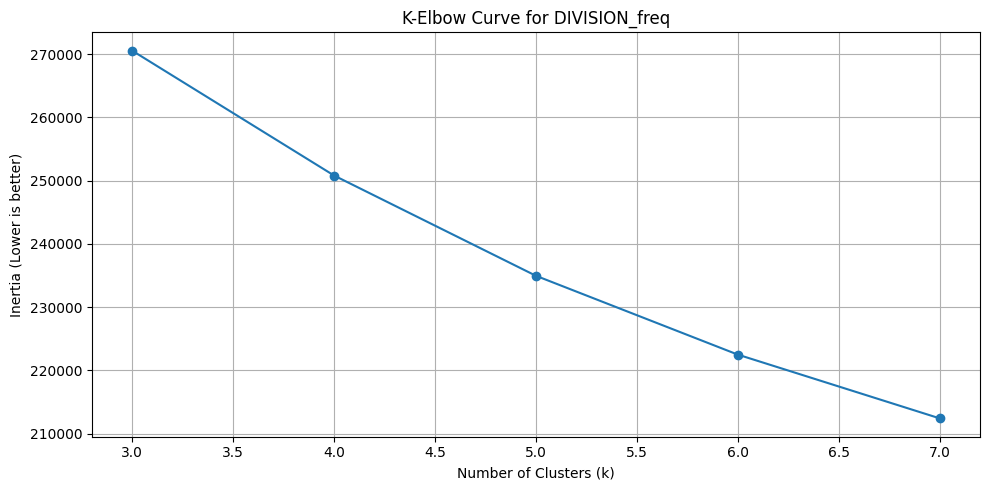


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0    16731
1    24259
2    13321


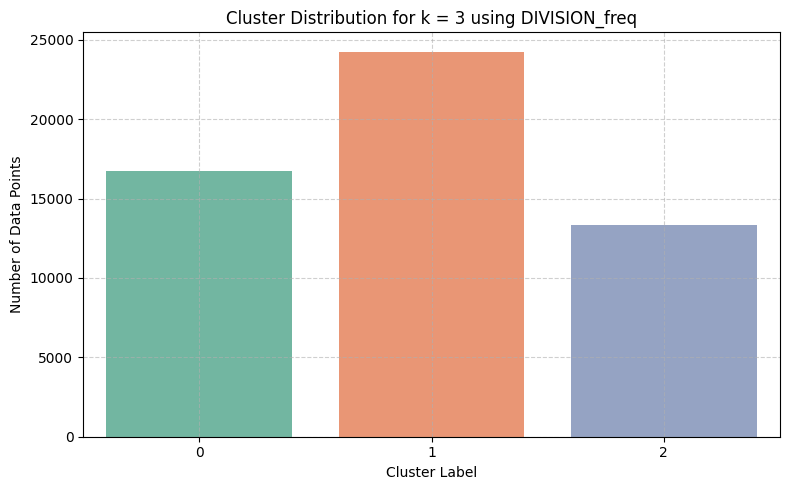


For k = 4, Cluster Counts:
0    16553
1    10229
2    14190
3    13339


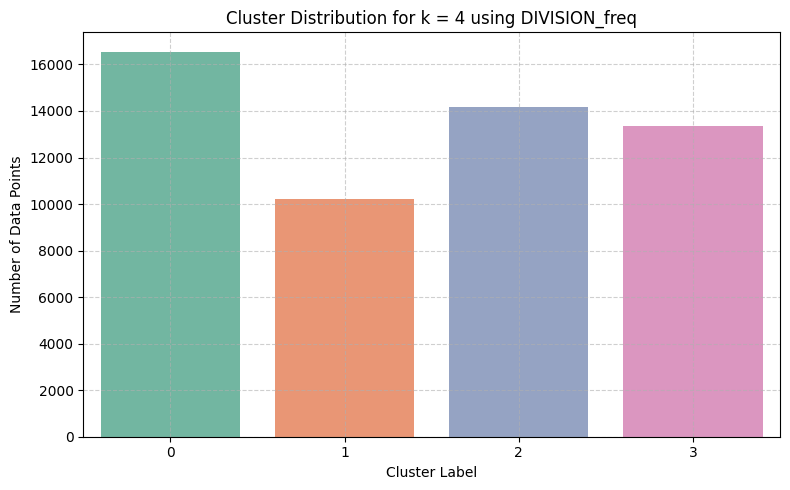


For k = 5, Cluster Counts:
0    11334
1    12422
2     8602
3     9900
4    12053


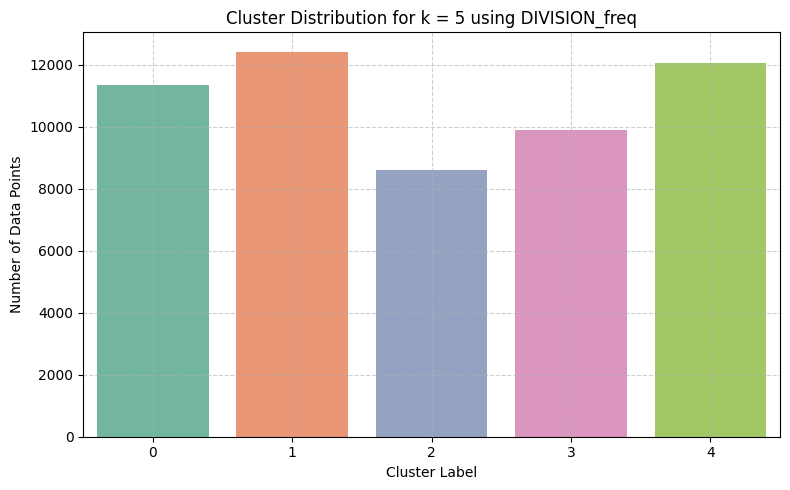


For k = 6, Cluster Counts:
0     8549
1    11293
2     7409
3    11724
4     6957
5     8379


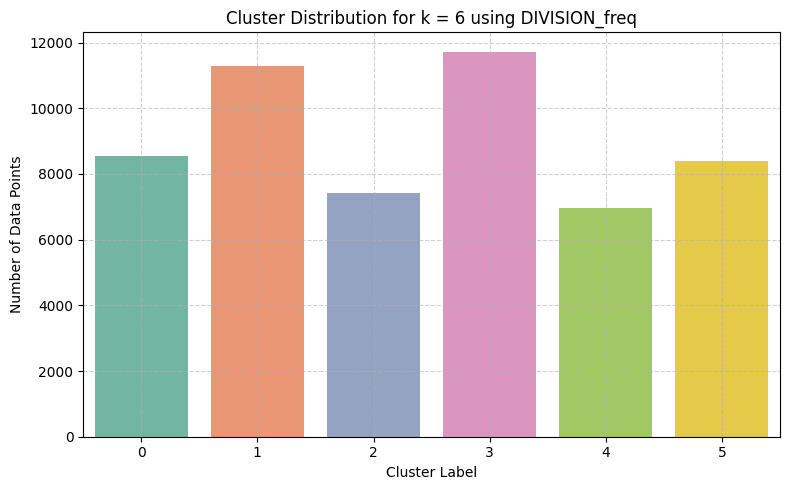


For k = 7, Cluster Counts:
0     7072
1     8065
2    11762
3     6315
4     5768
5     5742
6     9587


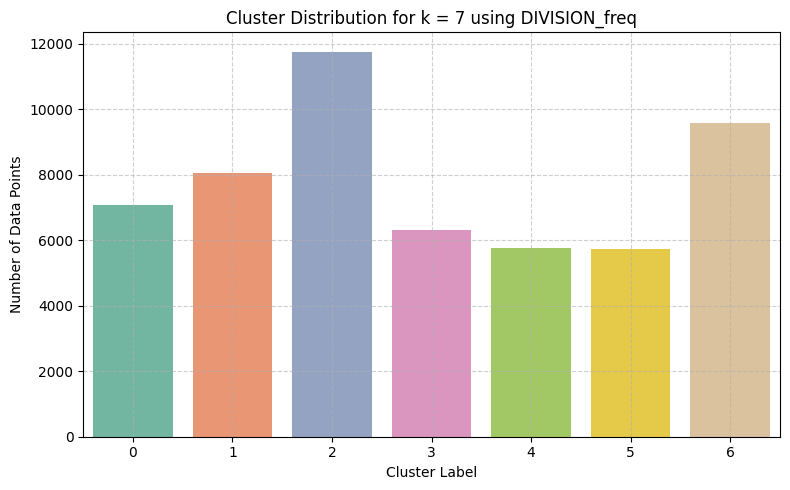

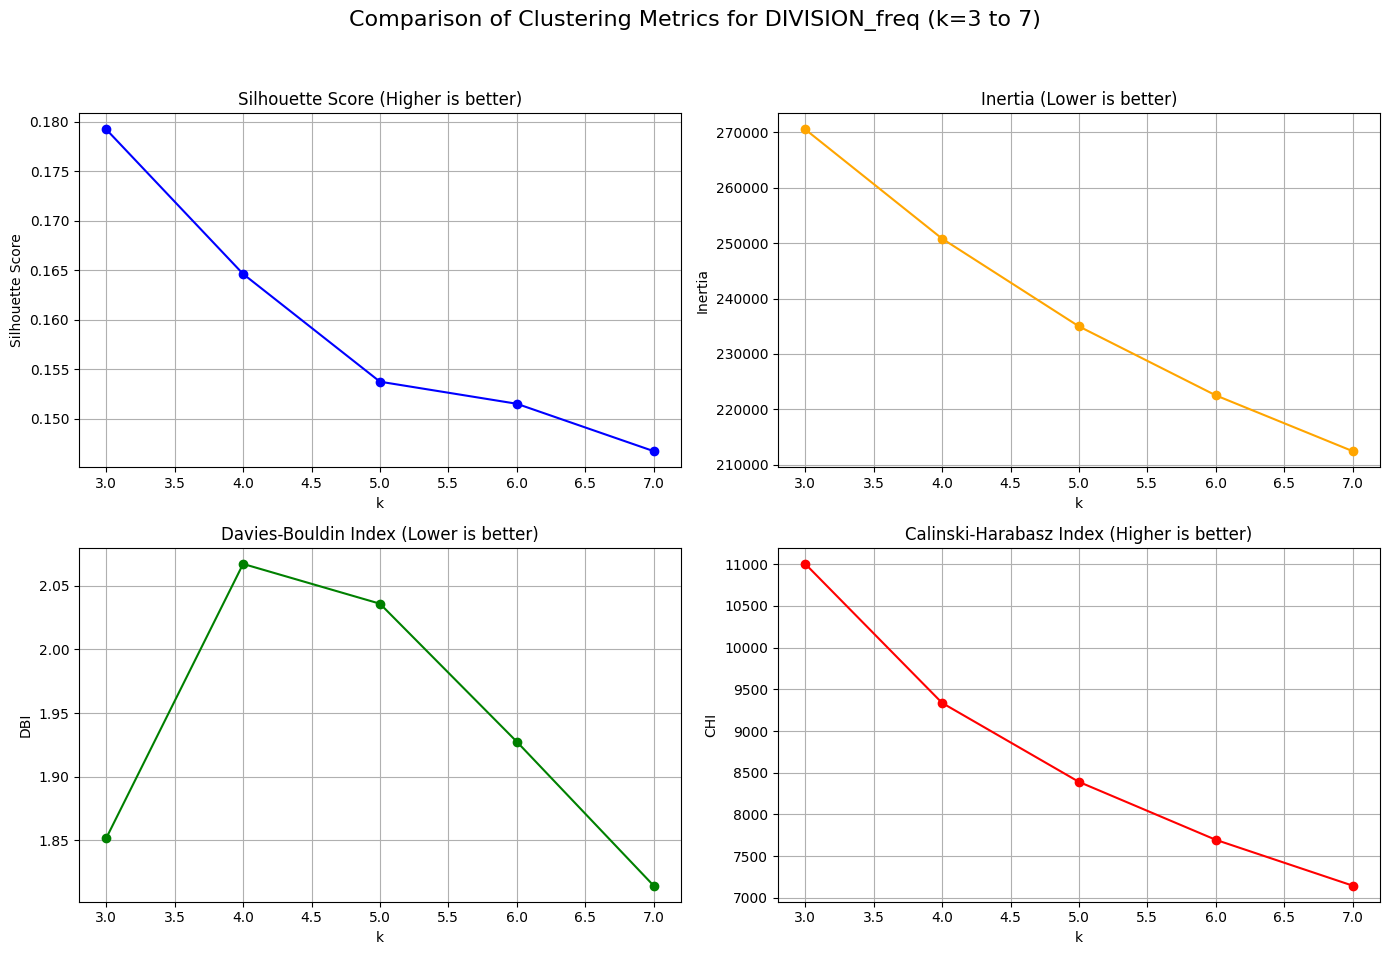



========== Analysis using LOCATION_TYPE_freq along with continuous and encoded features ==========

--- Feature Importance (Centroid Variance) for k = 7 ---
           Feature  Centroid Variance
LOCATION_TYPE_freq           0.847384
          OCC_YEAR           0.466665
      OCC_DOW_freq           0.410880
     OCC_HOUR_freq           0.357424
        LONG_WGS84           0.335619
           OCC_DOY           0.279225
         LAT_WGS84           0.277351


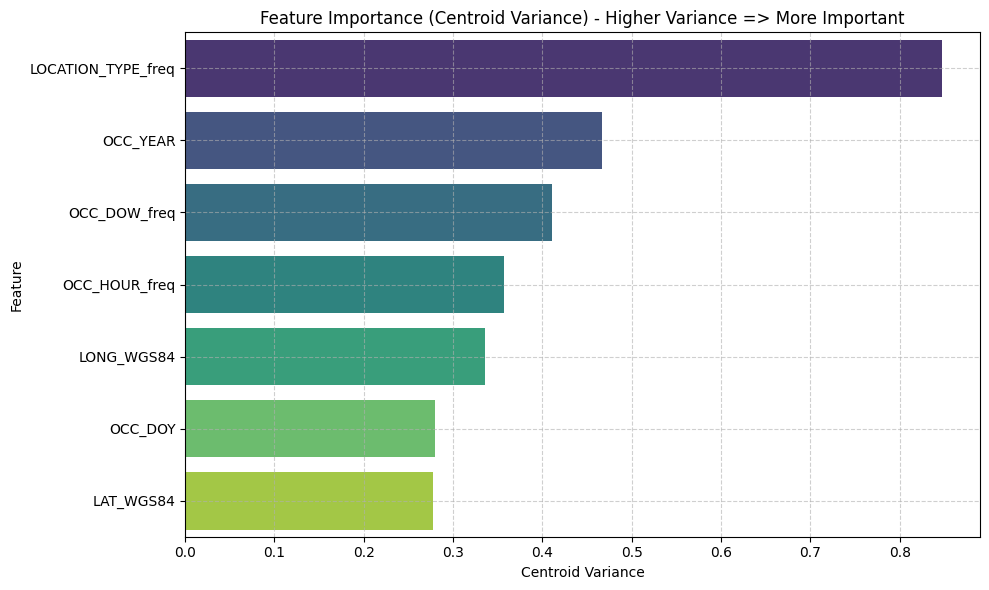


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.14  (Higher is better)
  Inertia                : 291238.21  (Lower is better)
  Davies-Bouldin Index   : 2.15  (Lower is better)
  Calinski-Harabasz Index: 8292.42  (Higher is better)

For k = 4:
  Silhouette Score       : 0.15  (Higher is better)
  Inertia                : 264050.83  (Lower is better)
  Davies-Bouldin Index   : 1.98  (Lower is better)
  Calinski-Harabasz Index: 7961.24  (Higher is better)

For k = 5:
  Silhouette Score       : 0.14  (Higher is better)
  Inertia                : 245082.71  (Lower is better)
  Davies-Bouldin Index   : 1.83  (Lower is better)
  Calinski-Harabasz Index: 7483.65  (Higher is better)

For k = 6:
  Silhouette Score       : 0.13  (Higher is better)
  Inertia                : 230022.46  (Lower is better)
  Davies-Bouldin Index   : 1.71  (Lower is better)
  Calinski-Harabasz Index: 7089.88  (Higher is better)

For k = 7:
  Silhouette Score       : 0.12  (Higher is b

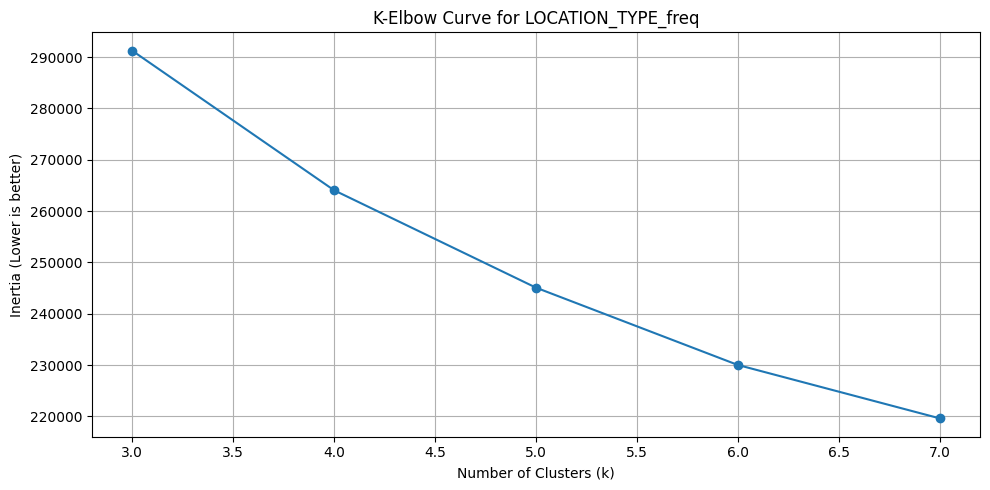


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0    14212
1    15911
2    24188


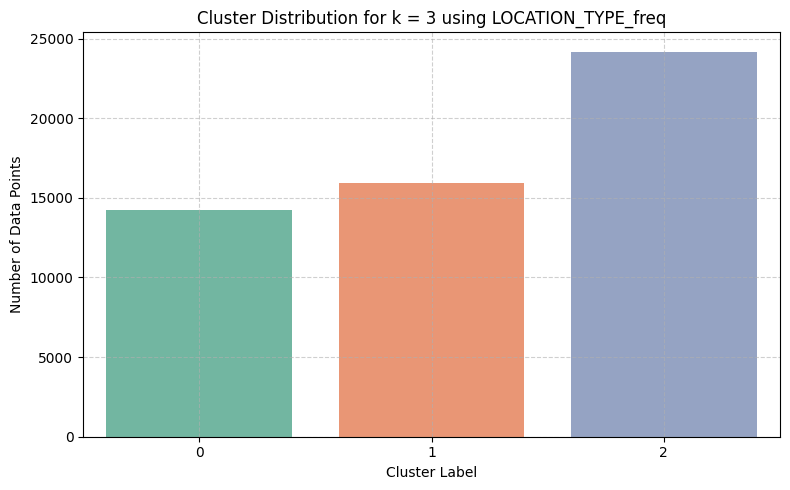


For k = 4, Cluster Counts:
0    19814
1     6645
2    13516
3    14336


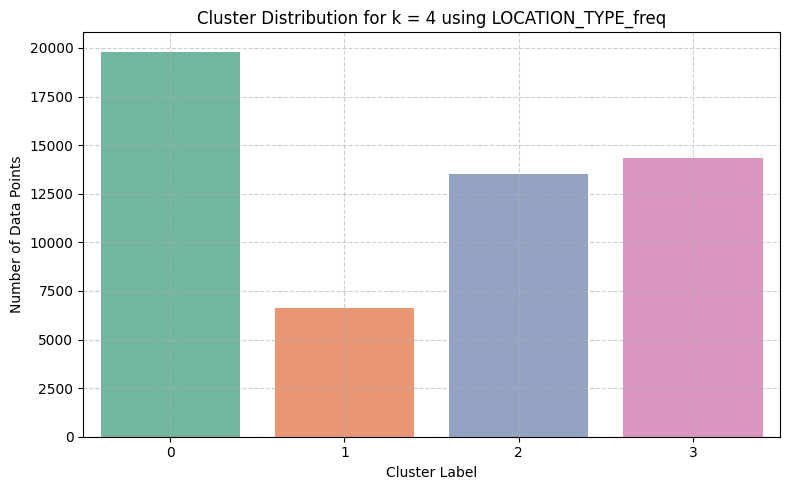


For k = 5, Cluster Counts:
0     6617
1    12326
2    11789
3    11951
4    11628


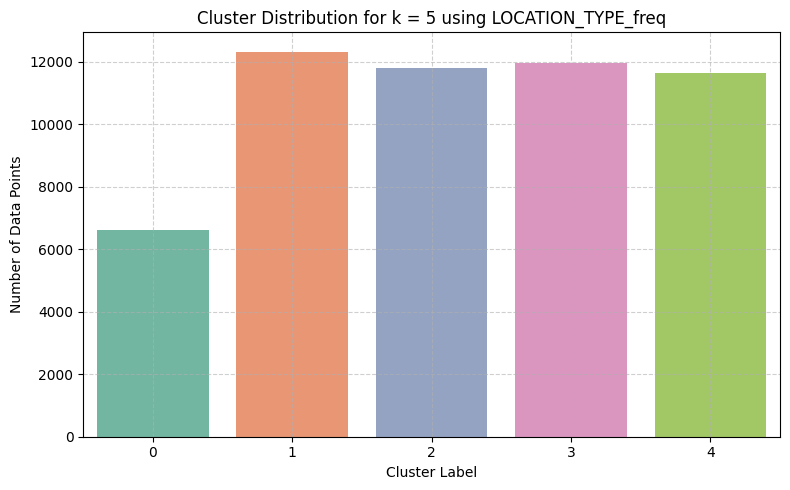


For k = 6, Cluster Counts:
0     9884
1    10262
2     8691
3     9232
4     9628
5     6614


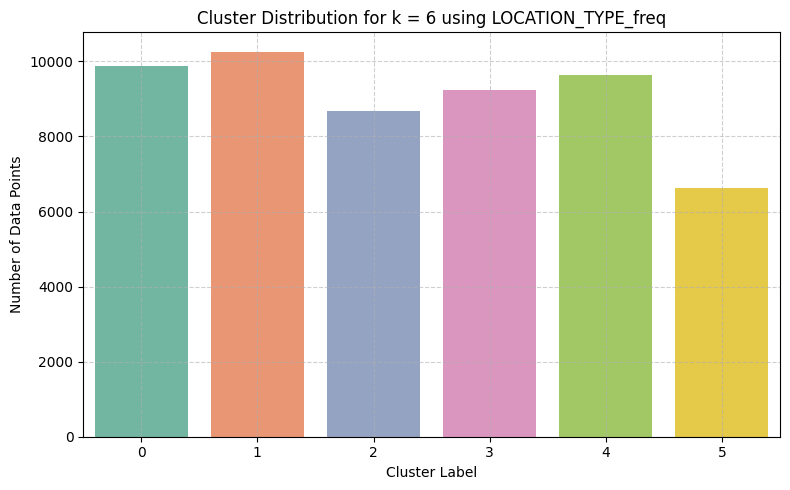


For k = 7, Cluster Counts:
0    7780
1    6612
2    9416
3    8578
4    6628
5    6773
6    8524


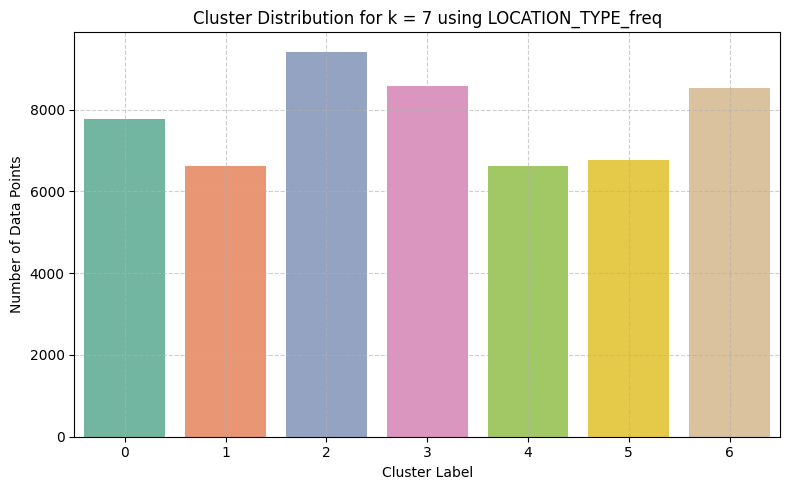

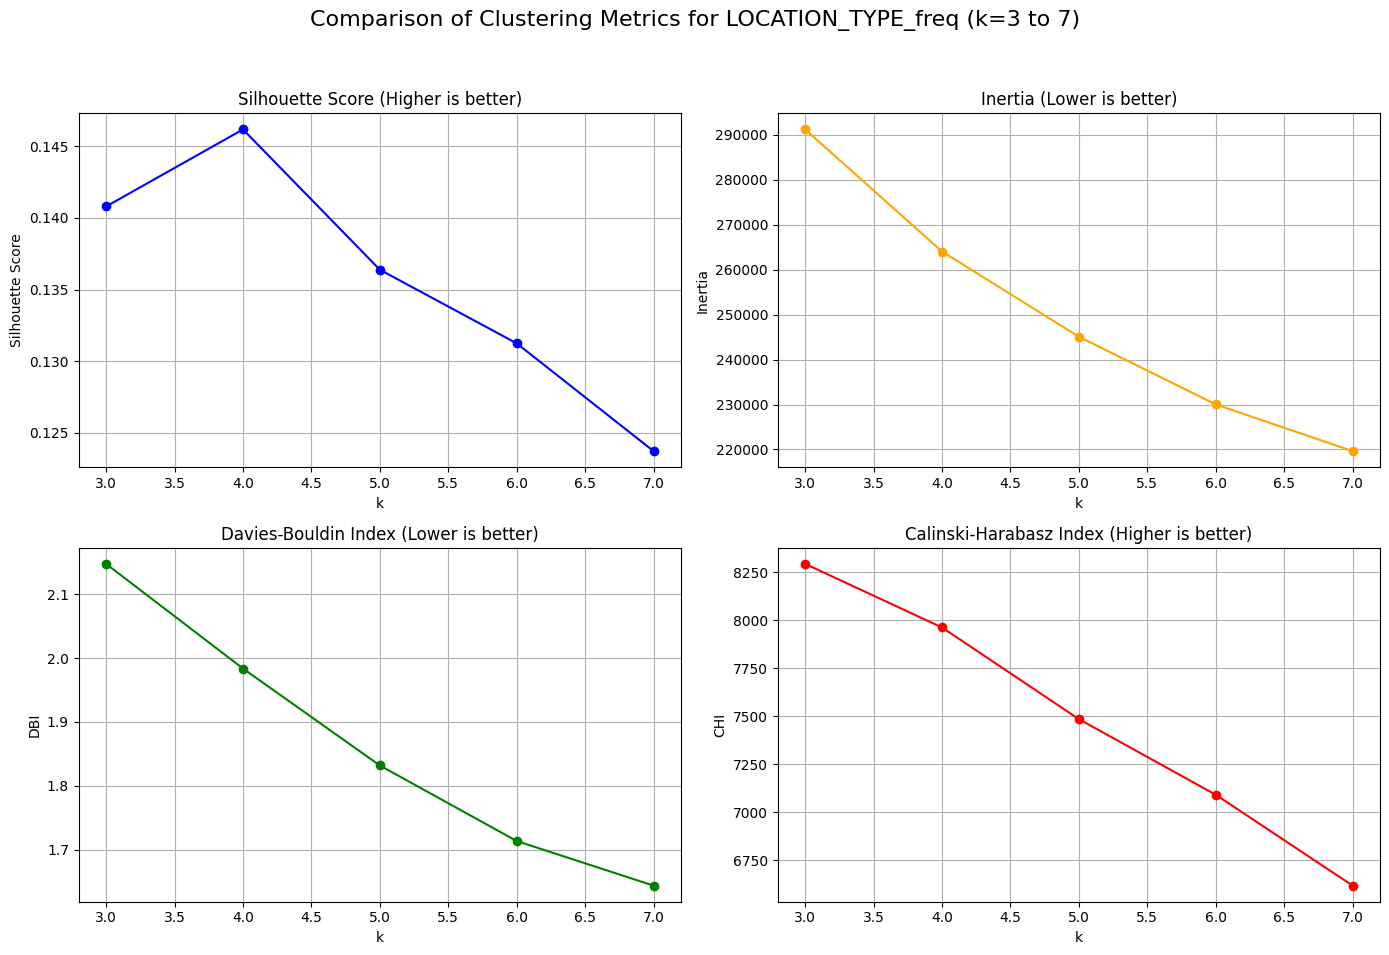



========== Analysis using PREMISES_TYPE_freq along with continuous and encoded features ==========

--- Feature Importance (Centroid Variance) for k = 7 ---
           Feature  Centroid Variance
PREMISES_TYPE_freq           0.846198
          OCC_YEAR           0.466944
      OCC_DOW_freq           0.410672
     OCC_HOUR_freq           0.357152
        LONG_WGS84           0.340695
           OCC_DOY           0.279685
         LAT_WGS84           0.279178


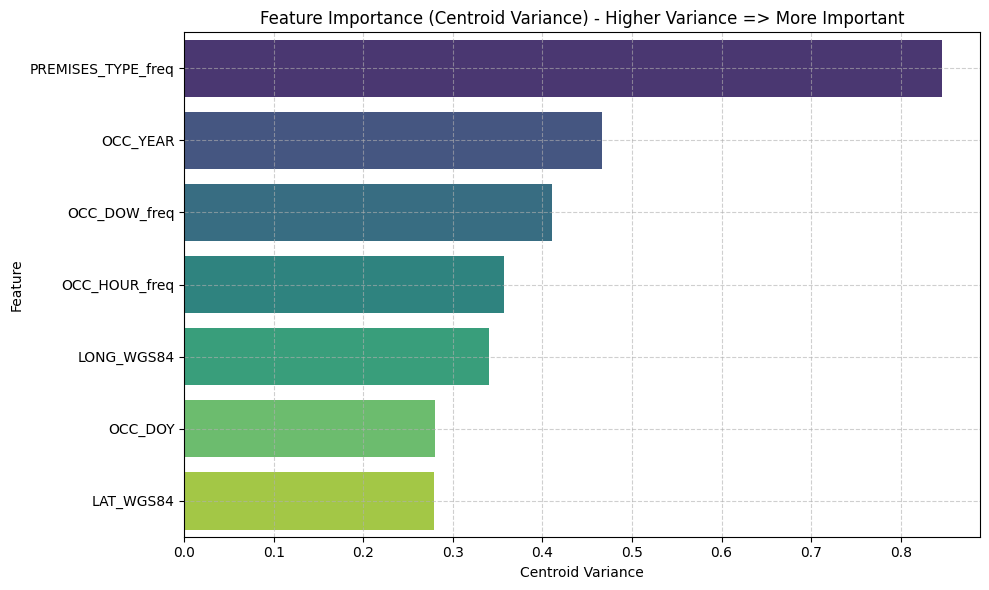


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.15  (Higher is better)
  Inertia                : 293266.64  (Lower is better)
  Davies-Bouldin Index   : 2.00  (Lower is better)
  Calinski-Harabasz Index: 8047.17  (Higher is better)

For k = 4:
  Silhouette Score       : 0.14  (Higher is better)
  Inertia                : 265141.54  (Lower is better)
  Davies-Bouldin Index   : 1.99  (Lower is better)
  Calinski-Harabasz Index: 7854.05  (Higher is better)

For k = 5:
  Silhouette Score       : 0.14  (Higher is better)
  Inertia                : 245931.49  (Lower is better)
  Davies-Bouldin Index   : 1.84  (Lower is better)
  Calinski-Harabasz Index: 7410.95  (Higher is better)

For k = 6:
  Silhouette Score       : 0.13  (Higher is better)
  Inertia                : 230771.76  (Lower is better)
  Davies-Bouldin Index   : 1.70  (Lower is better)
  Calinski-Harabasz Index: 7031.60  (Higher is better)

For k = 7:
  Silhouette Score       : 0.12  (Higher is b

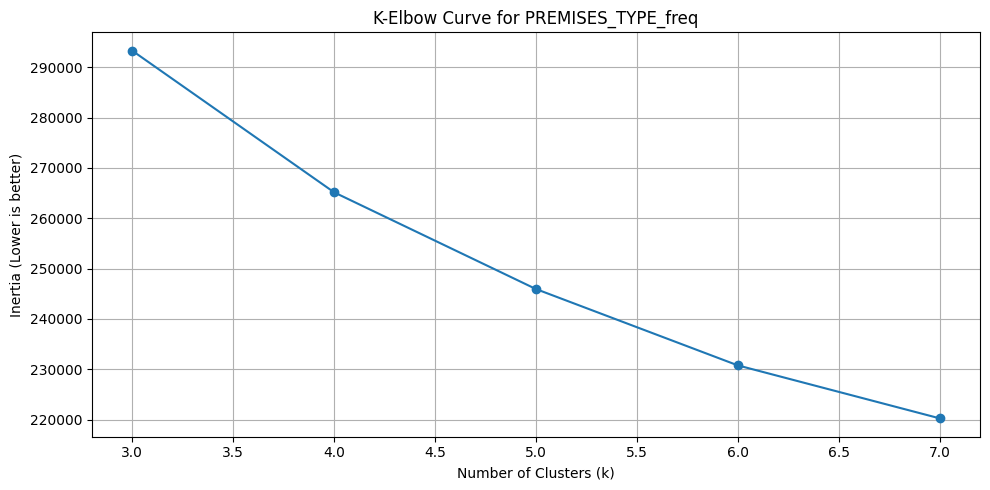


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0    31000
1     6479
2    16832


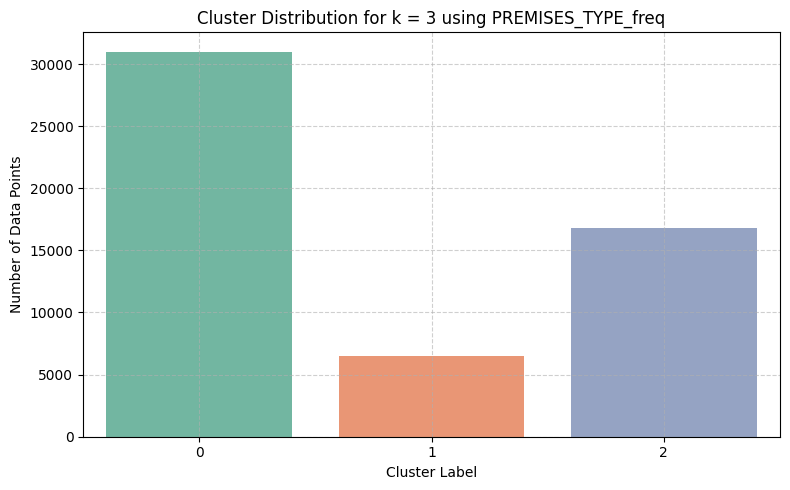


For k = 4, Cluster Counts:
0     6465
1    14463
2    19785
3    13598


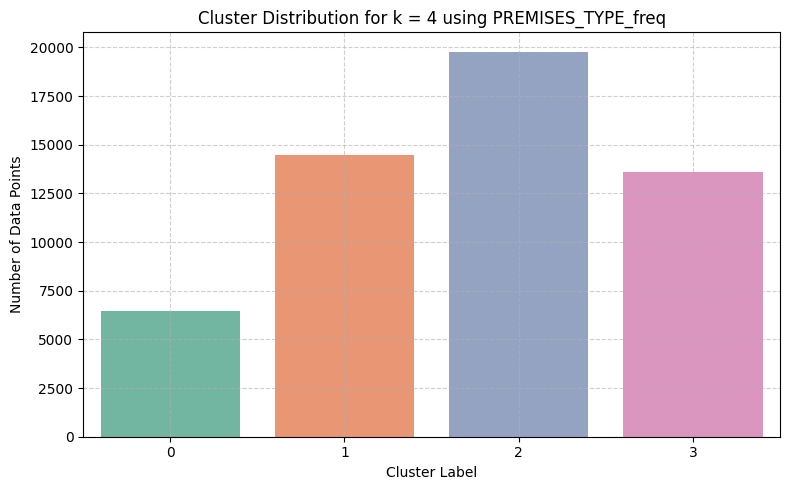


For k = 5, Cluster Counts:
0    10379
1    14663
2    11017
3     6421
4    11831


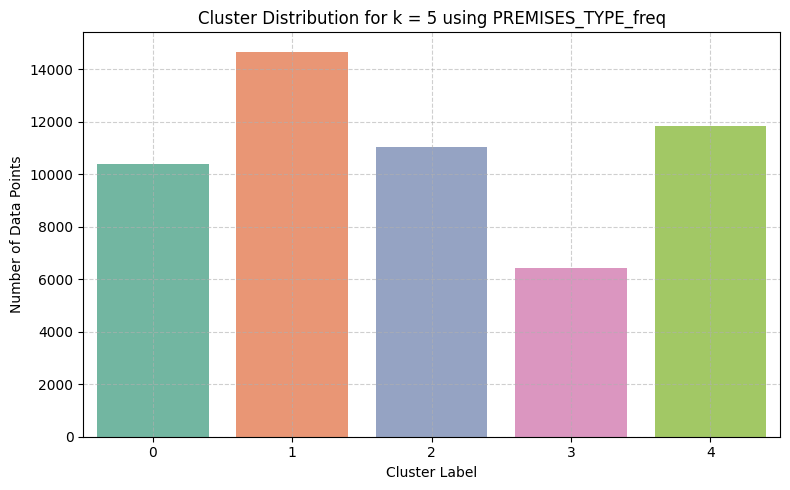


For k = 6, Cluster Counts:
0     6343
1     9962
2     8653
3     9779
4    10269
5     9305


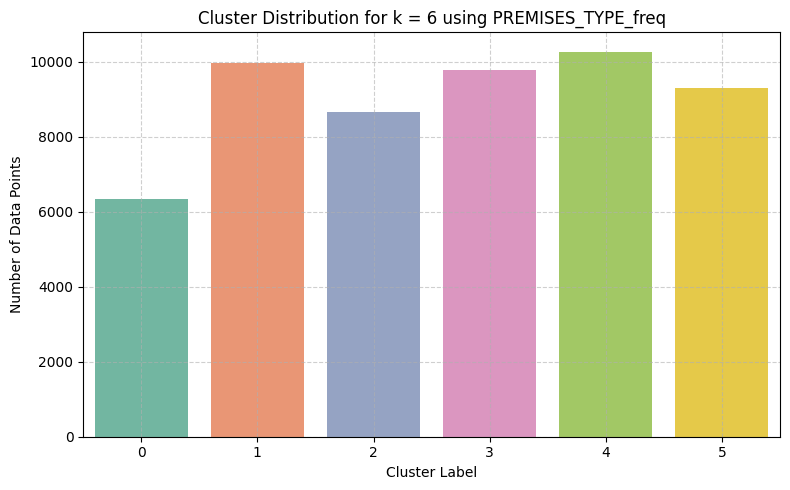


For k = 7, Cluster Counts:
0    8631
1    7800
2    6696
3    6839
4    8545
5    9492
6    6308


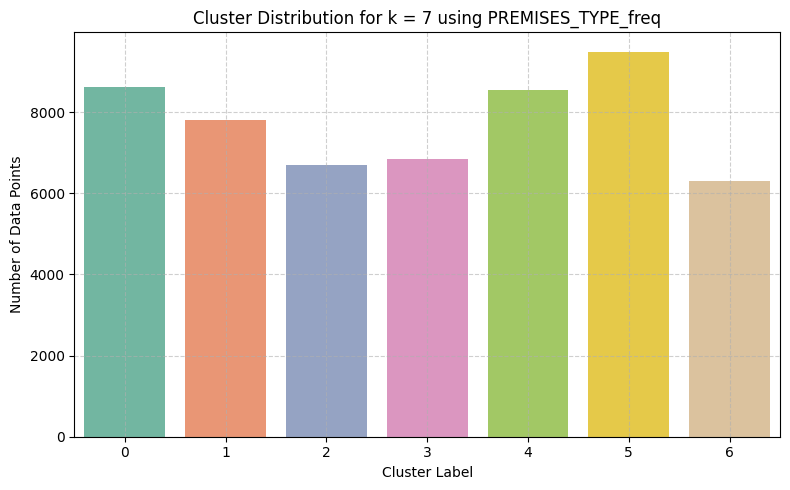

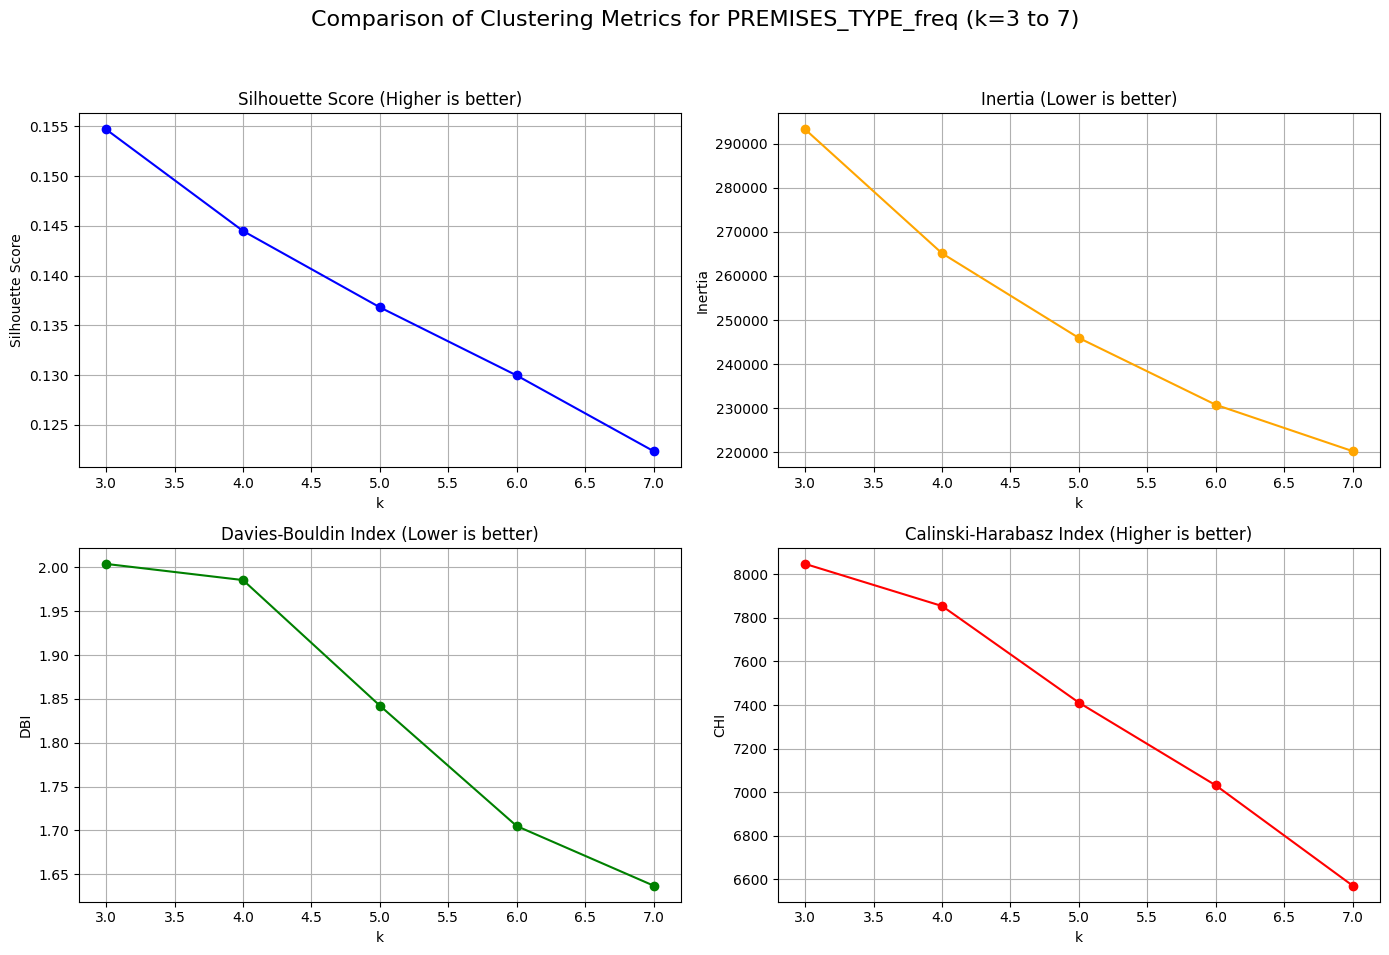



========== Analysis using HOOD_158_freq along with continuous and encoded features ==========

--- Feature Importance (Centroid Variance) for k = 7 ---
      Feature  Centroid Variance
HOOD_158_freq           1.738638
   LONG_WGS84           0.601303
     OCC_YEAR           0.476990
 OCC_DOW_freq           0.414147
OCC_HOUR_freq           0.354934
    LAT_WGS84           0.284293
      OCC_DOY           0.277180


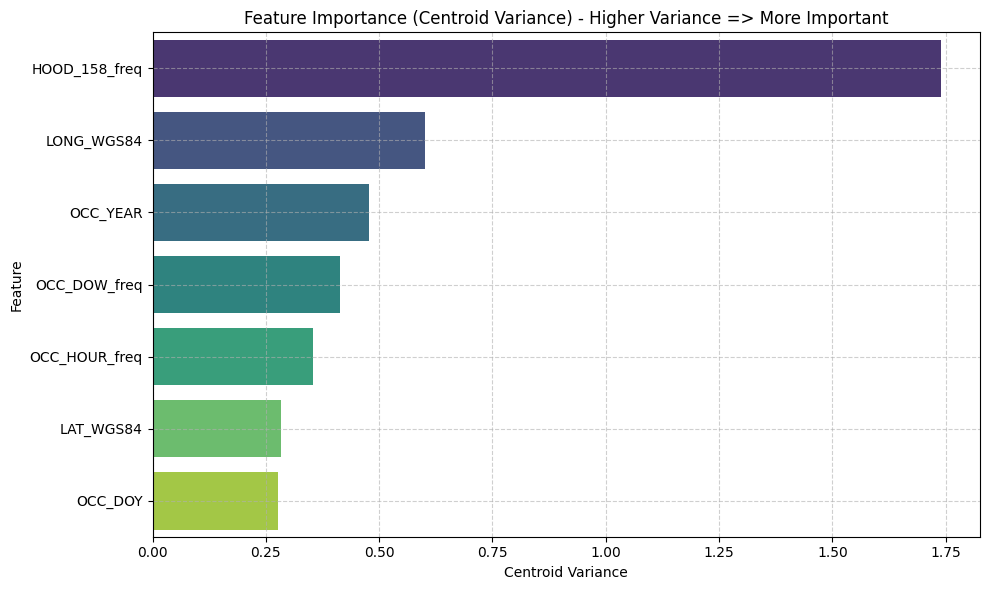


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.18  (Higher is better)
  Inertia                : 271237.62  (Lower is better)
  Davies-Bouldin Index   : 1.76  (Lower is better)
  Calinski-Harabasz Index: 10906.09  (Higher is better)

For k = 4:
  Silhouette Score       : 0.17  (Higher is better)
  Inertia                : 242167.44  (Lower is better)
  Davies-Bouldin Index   : 1.79  (Lower is better)
  Calinski-Harabasz Index: 10316.55  (Higher is better)

For k = 5:
  Silhouette Score       : 0.16  (Higher is better)
  Inertia                : 221983.79  (Lower is better)
  Davies-Bouldin Index   : 1.68  (Lower is better)
  Calinski-Harabasz Index: 9675.09  (Higher is better)

For k = 6:
  Silhouette Score       : 0.16  (Higher is better)
  Inertia                : 206205.09  (Lower is better)
  Davies-Bouldin Index   : 1.57  (Lower is better)
  Calinski-Harabasz Index: 9163.27  (Higher is better)

For k = 7:
  Silhouette Score       : 0.15  (Higher is

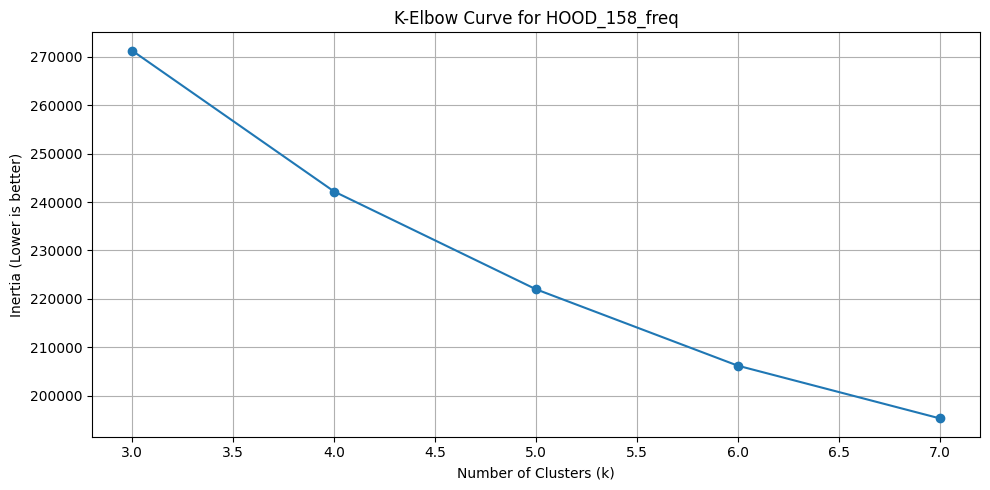


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0    32344
1    18243
2     3724


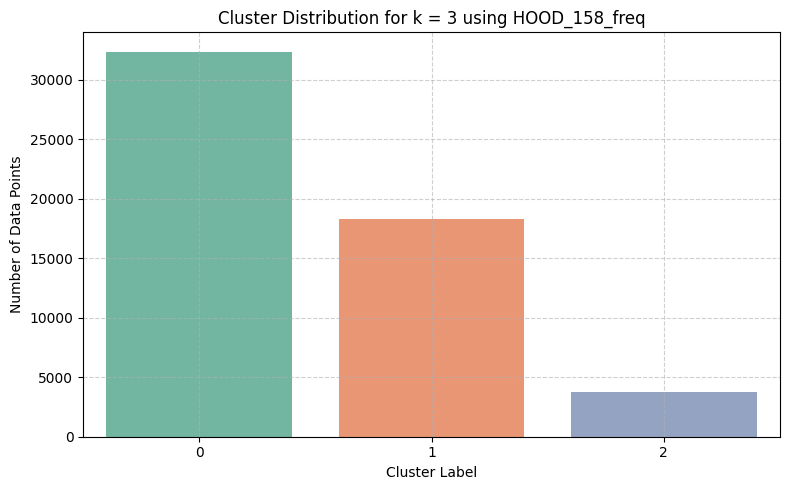


For k = 4, Cluster Counts:
0     3724
1    20416
2    15053
3    15118


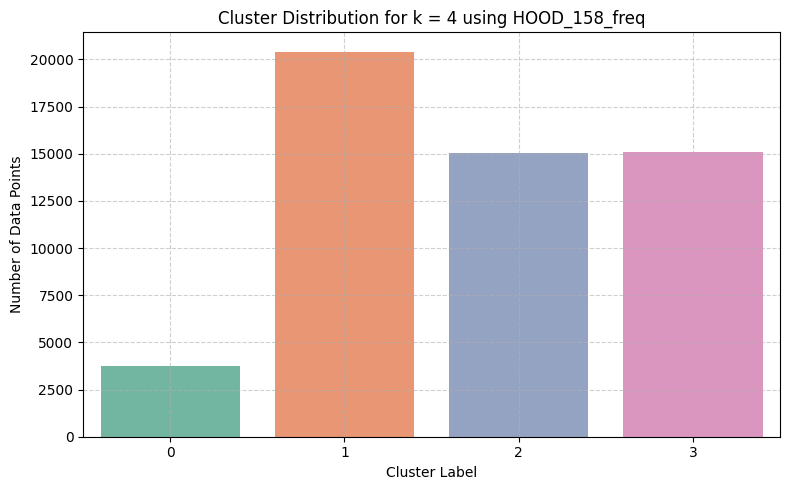


For k = 5, Cluster Counts:
0    15364
1    13120
2     3724
3    11430
4    10673


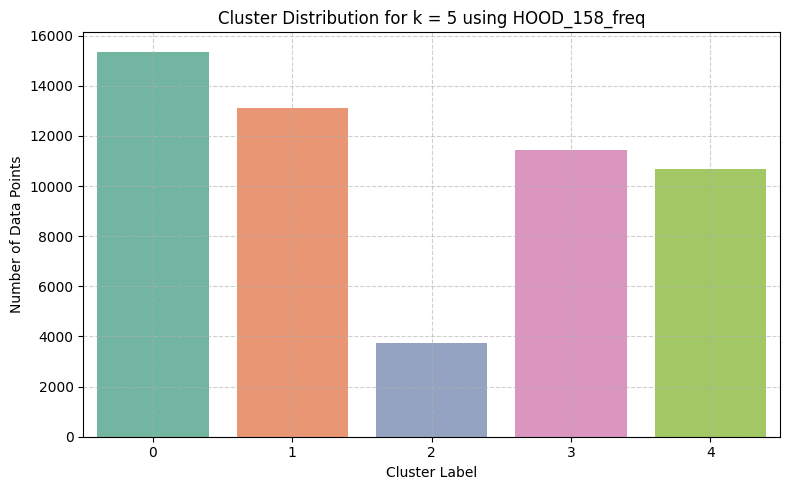


For k = 6, Cluster Counts:
0    10188
1    11276
2    10460
3     9613
4     3724
5     9050


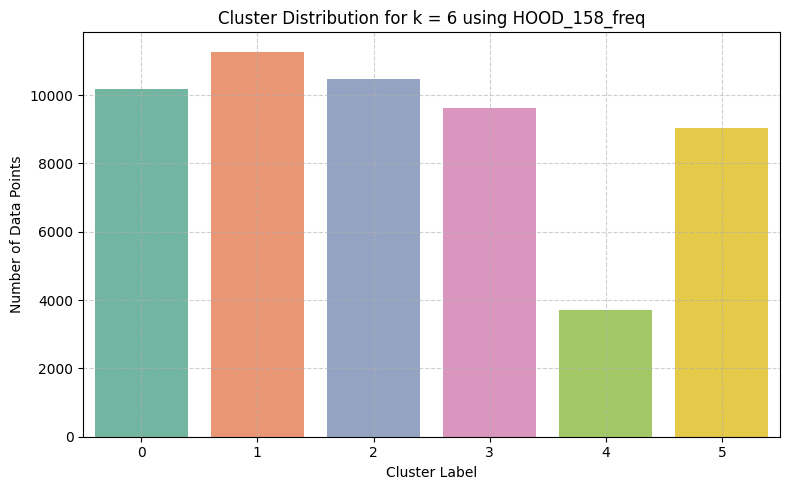


For k = 7, Cluster Counts:
0     3724
1    10214
2     6926
3     7206
4     9060
5     8215
6     8966


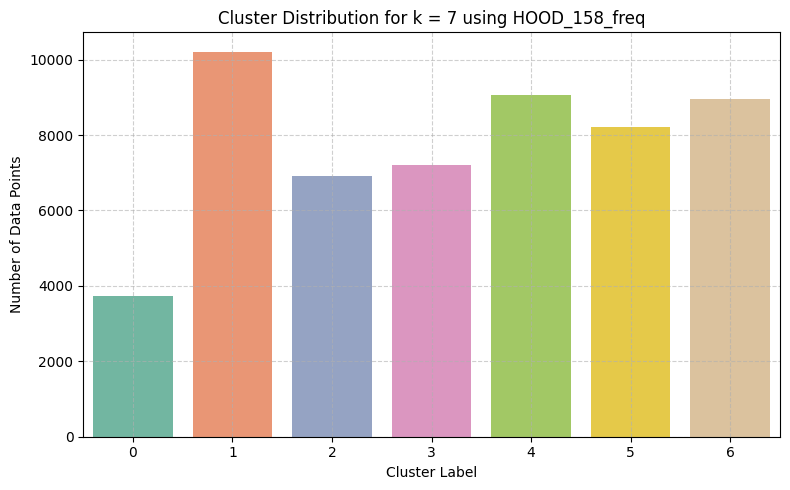

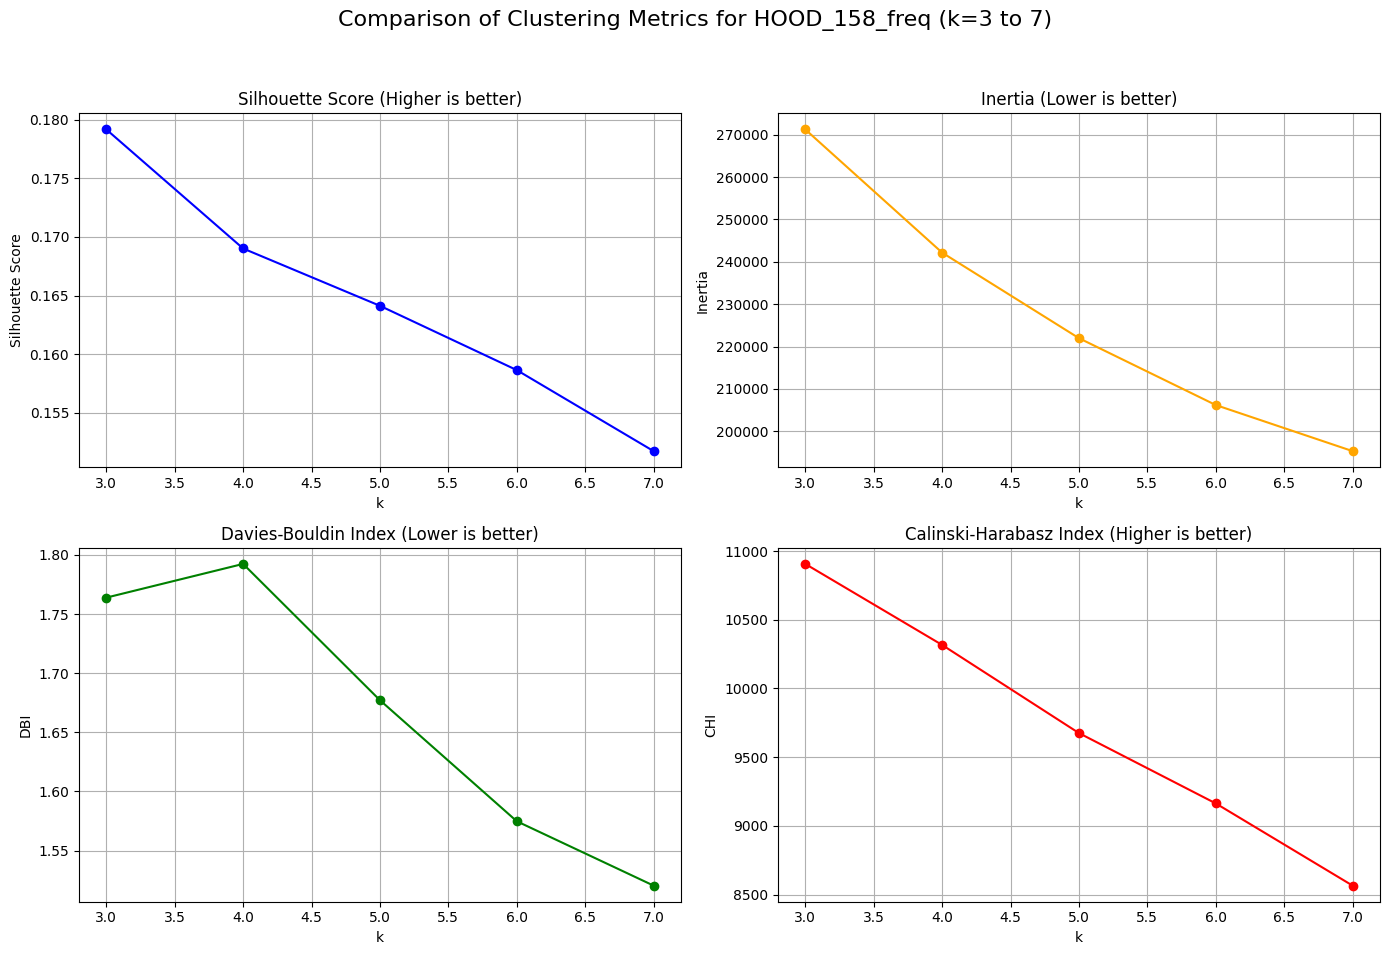

In [ ]:
# Install prince if not already installed (uncomment the next line if needed)
# !pip install prince -qqq

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 1. Load the Data
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
try:
    df = pd.read_csv(url)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# 2. Convert columns to integers and create new numeric columns
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['OCC_MONTH_NUM'] = df['OCC_MONTH'].map(month_mapping).astype(int)
df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)
dow_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['OCC_DOW_NUM'] = df['OCC_DOW'].map(dow_mapping).astype(int)

print("\nColumns converted and new numeric columns created:")
print(df[['OCC_MONTH', 'OCC_MONTH_NUM', 'OCC_HOUR', 'OCC_DOW', 'OCC_DOW_NUM']].head())

# 3. Encoding for Time Variables
# For Month, apply cyclical encoding
def cyclical_encode(df, col, period):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / period)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / period)
    return df

df = cyclical_encode(df, 'OCC_MONTH_NUM', 12)
# For Hour, perform frequency encoding instead of cyclical encoding
hour_freq = df['OCC_HOUR'].value_counts()
df['OCC_HOUR_freq'] = df['OCC_HOUR'].map(hour_freq)
# For Day-of-Week, perform frequency encoding instead of cyclical encoding
dow_freq = df['OCC_DOW_NUM'].value_counts()
df['OCC_DOW_freq'] = df['OCC_DOW_NUM'].map(dow_freq)

print("\nCyclical encoding applied for Month, and frequency encoding applied for Hour and Day-of-Week.")
print(df[['OCC_HOUR', 'OCC_HOUR_freq', 'OCC_MONTH_NUM_sin', 'OCC_MONTH_NUM_cos', 'OCC_DOW_freq']].head())

# 4. Frequency Encoding for selected categorical features
features_for_frequency_encoding = ['DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
for feature in features_for_frequency_encoding:
    freq = df[feature].value_counts()
    df[feature + '_freq'] = df[feature].map(freq)

print("\nFrequency encoding applied for features:")
print(df[[f + '_freq' for f in features_for_frequency_encoding]].head())

# 5. Define feature groups for clustering
# Continuous features (ensure these exist in your dataset)
continuous_features = ['OCC_YEAR', 'OCC_DOY', 'LONG_WGS84', 'LAT_WGS84']
# Encoded features: using frequency encoding for Hour and Day-of-Week
encoded_features = [
    'OCC_HOUR_freq',
    'OCC_DOW_freq'
]
# Frequency-encoded features (we will select one at a time)
frequency_features = [f + '_freq' for f in features_for_frequency_encoding]

# Loop over each frequency-encoded feature
for freq_feature in frequency_features:
    print(f"\n\n========== Analysis using {freq_feature} along with continuous and encoded features ==========")

    # Combine features for clustering
    clustering_features = continuous_features + encoded_features + [freq_feature]
    X = df[clustering_features].dropna()

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # -----------------------------------------
    # A. FEATURE IMPORTANCE (using k=7 for this purpose)
    # -----------------------------------------
    selected_k = 7
    kmeans_importance = KMeans(n_clusters=selected_k, random_state=42, n_init=10)
    kmeans_importance.fit(X_scaled)
    centroids = kmeans_importance.cluster_centers_
    # Compute variance across centroids for each feature (as an importance metric)
    centroid_variance = np.var(centroids, axis=0)
    importance_df = pd.DataFrame({
        'Feature': clustering_features,
        'Centroid Variance': centroid_variance
    }).sort_values(by='Centroid Variance', ascending=False)

    print("\n--- Feature Importance (Centroid Variance) for k = 7 ---")
    print(importance_df.to_string(index=False))

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Centroid Variance', y='Feature', data=importance_df, palette='viridis')
    plt.title("Feature Importance (Centroid Variance) - Higher Variance => More Important")
    plt.xlabel("Centroid Variance")
    plt.ylabel("Feature")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # -----------------------------------------
    # B. K-ELBOW ANALYSIS (for k=3 to k=7)
    # -----------------------------------------
    inertia_values = []
    metrics = []  # to store all metrics for each k
    print("\n--- K-Elbow Analysis (k=3 to k=7) ---")
    for k in range(3, 8):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)

        sil_score = silhouette_score(X_scaled, cluster_labels)
        inertia = kmeans.inertia_
        db_index = davies_bouldin_score(X_scaled, cluster_labels)
        ch_index = calinski_harabasz_score(X_scaled, cluster_labels)

        inertia_values.append(inertia)
        metrics.append({
            'k': k,
            'Silhouette': sil_score,
            'Inertia': inertia,
            'Davies-Bouldin': db_index,
            'Calinski-Harabasz': ch_index
        })

        print(f"\nFor k = {k}:")
        print(f"  Silhouette Score       : {sil_score:.2f}  (Higher is better)")
        print(f"  Inertia                : {inertia:.2f}  (Lower is better)")
        print(f"  Davies-Bouldin Index   : {db_index:.2f}  (Lower is better)")
        print(f"  Calinski-Harabasz Index: {ch_index:.2f}  (Higher is better)")

    metrics_df = pd.DataFrame(metrics)
    print("\nK-Elbow Summary:")
    print(metrics_df.to_string(index=False))

    # Plot Elbow Curve (Inertia vs. k)
    plt.figure(figsize=(10, 5))
    plt.plot(range(3, 8), inertia_values, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Lower is better)")
    plt.title(f"K-Elbow Curve for {freq_feature}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # -----------------------------------------
    # C. NUMBER OF POINTS IN EACH CLUSTER (for k=3 to k=7)
    # -----------------------------------------
    print("\n--- Number of Points in Each Cluster ---")
    cluster_counts_dict = {}  # to store counts for each k
    for k in range(3, 8):
        kmeans_counts = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans_counts.fit_predict(X_scaled)
        # Create a series with cluster counts
        cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
        cluster_counts_dict[k] = cluster_counts
        print(f"\nFor k = {k}, Cluster Counts:")
        print(cluster_counts.to_string())

        # Plot cluster distribution for this k
        plt.figure(figsize=(8, 5))
        sns.countplot(x=cluster_labels, palette="Set2")
        plt.title(f"Cluster Distribution for k = {k} using {freq_feature}")
        plt.xlabel("Cluster Label")
        plt.ylabel("Number of Data Points")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    # -----------------------------------------
    # D. COMPARISON PLOTS OF ALL METRICS (for k=3 to k=7)
    # -----------------------------------------
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Silhouette Score (Higher is better)
    axs[0, 0].plot(metrics_df['k'], metrics_df['Silhouette'], marker='o', color='blue')
    axs[0, 0].set_title("Silhouette Score (Higher is better)")
    axs[0, 0].set_xlabel("k")
    axs[0, 0].set_ylabel("Silhouette Score")
    axs[0, 0].grid(True)

    # Inertia (Lower is better)
    axs[0, 1].plot(metrics_df['k'], metrics_df['Inertia'], marker='o', color='orange')
    axs[0, 1].set_title("Inertia (Lower is better)")
    axs[0, 1].set_xlabel("k")
    axs[0, 1].set_ylabel("Inertia")
    axs[0, 1].grid(True)

    # Davies-Bouldin Index (Lower is better)
    axs[1, 0].plot(metrics_df['k'], metrics_df['Davies-Bouldin'], marker='o', color='green')
    axs[1, 0].set_title("Davies-Bouldin Index (Lower is better)")
    axs[1, 0].set_xlabel("k")
    axs[1, 0].set_ylabel("DBI")
    axs[1, 0].grid(True)

    # Calinski-Harabasz Index (Higher is better)
    axs[1, 1].plot(metrics_df['k'], metrics_df['Calinski-Harabasz'], marker='o', color='red')
    axs[1, 1].set_title("Calinski-Harabasz Index (Higher is better)")
    axs[1, 1].set_xlabel("k")
    axs[1, 1].set_ylabel("CHI")
    axs[1, 1].grid(True)

    fig.suptitle(f"Comparison of Clustering Metrics for {freq_feature} (k=3 to 7)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Data loaded successfully.

First 5 rows of the DataFrame:
   _id EVENT_UNIQUE_ID  OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY    OCC_DOW  \
0    1  GO-20141263217    2013.0  December     31.0    365.0    Tuesday   
1   42  GO-20141262914    2014.0   January      1.0      1.0  Wednesday   
2  108  GO-20141266097    2014.0   January      2.0      2.0   Thursday   
3  126  GO-20141265947    2014.0   January      1.0      1.0  Wednesday   
4  140  GO-20141265795    2014.0   January      1.0      1.0  Wednesday   

   OCC_HOUR DIVISION                                      LOCATION_TYPE  \
0        17      D33                   Apartment (Rooming House, Condo)   
1        15      D43  Streets, Roads, Highways (Bicycle Path, Privat...   
2         1      D42  Single Home, House (Attach Garage, Cottage, Mo...   
3        15      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   
4        19      D23  Parking Lots (Apt., Commercial Or Non-Commercial)   

  PREMISES_TYPE  HOOD_158               

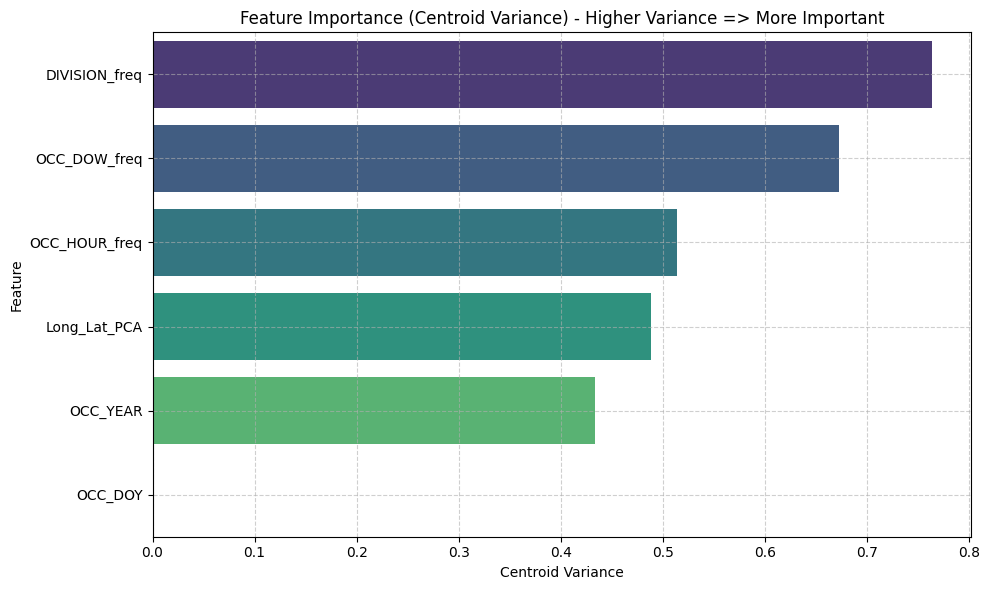


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.18  (Higher is better)
  Inertia                : 232826.44  (Lower is better)
  Davies-Bouldin Index   : 1.92  (Lower is better)
  Calinski-Harabasz Index: 10851.03  (Higher is better)

For k = 4:
  Silhouette Score       : 0.17  (Higher is better)
  Inertia                : 211807.76  (Lower is better)
  Davies-Bouldin Index   : 2.08  (Lower is better)
  Calinski-Harabasz Index: 9748.15  (Higher is better)

For k = 5:
  Silhouette Score       : 0.17  (Higher is better)
  Inertia                : 195424.49  (Lower is better)
  Davies-Bouldin Index   : 1.89  (Lower is better)
  Calinski-Harabasz Index: 9062.02  (Higher is better)

For k = 6:
  Silhouette Score       : 0.16  (Higher is better)
  Inertia                : 182795.47  (Lower is better)
  Davies-Bouldin Index   : 1.80  (Lower is better)
  Calinski-Harabasz Index: 8500.72  (Higher is better)

For k = 7:
  Silhouette Score       : 0.16  (Higher is 

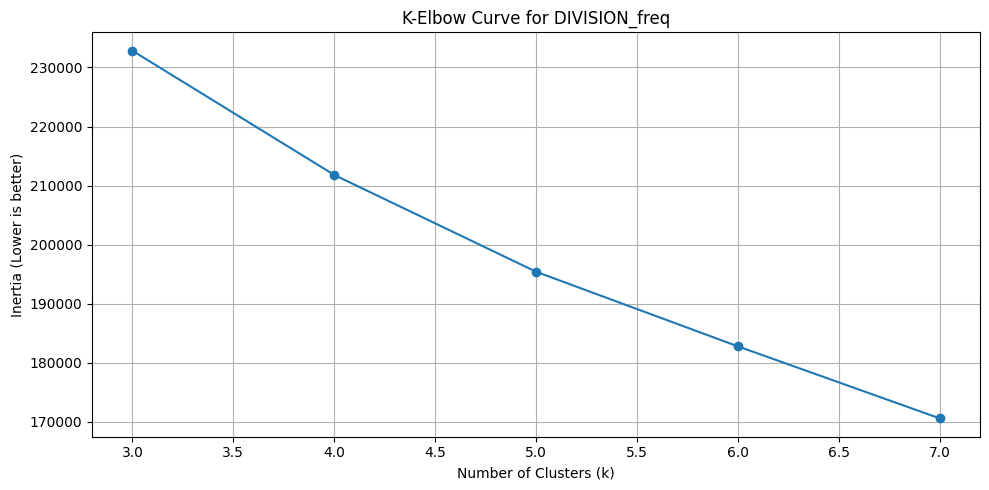


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0    22051
1    20665
2    11595


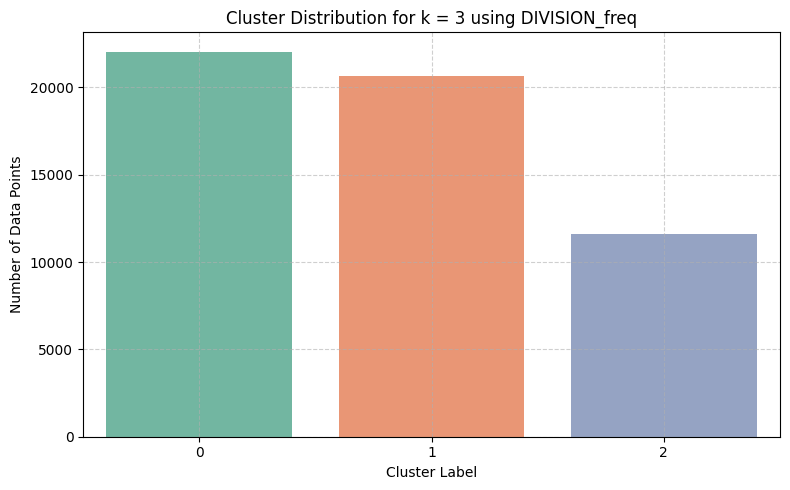


For k = 4, Cluster Counts:
0    12973
1    11747
2    13028
3    16563


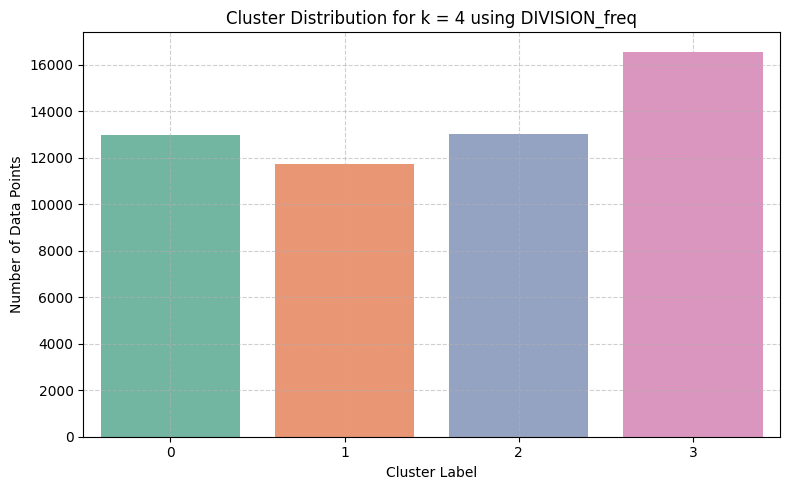


For k = 5, Cluster Counts:
0    11465
1     9059
2    13187
3    12544
4     8056


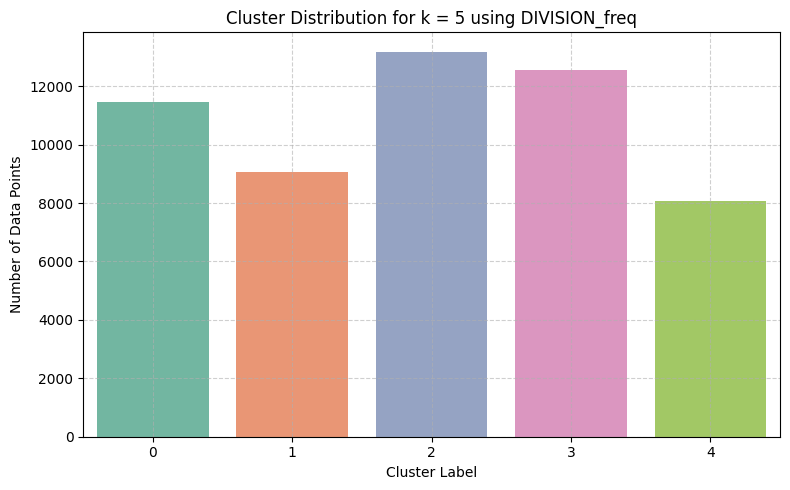


For k = 6, Cluster Counts:
0     8104
1    10823
2    10567
3     8719
4     7538
5     8560


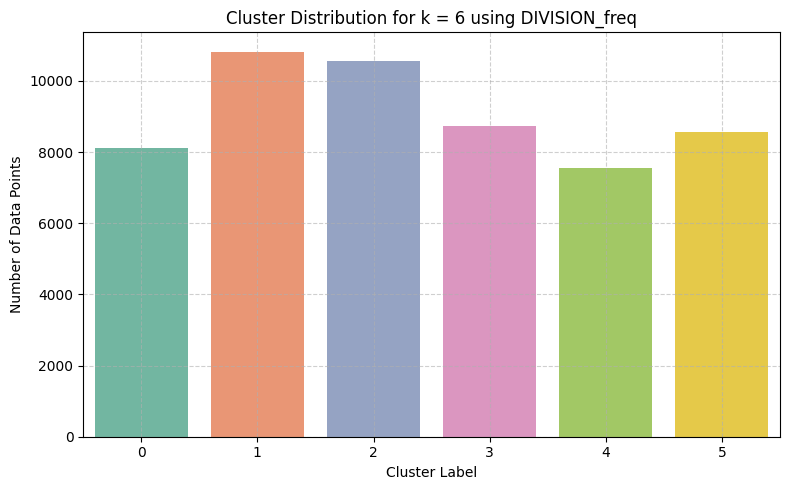


For k = 7, Cluster Counts:
0    8522
1    8280
2    8145
3    7409
4    7289
5    7992
6    6674


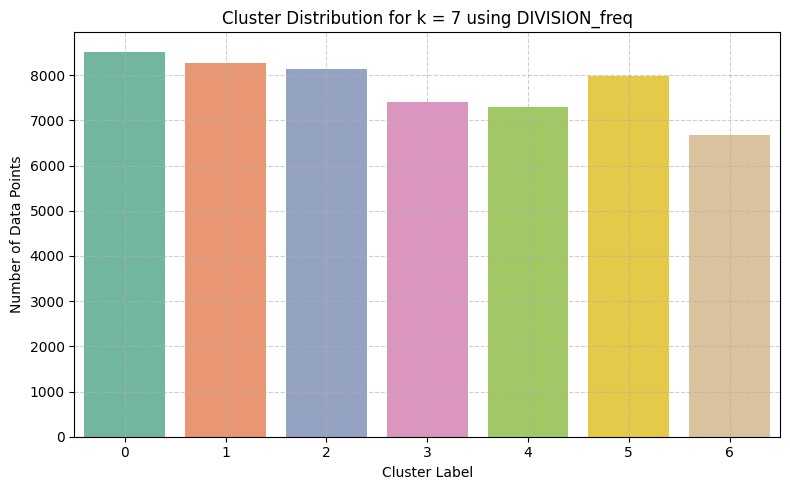

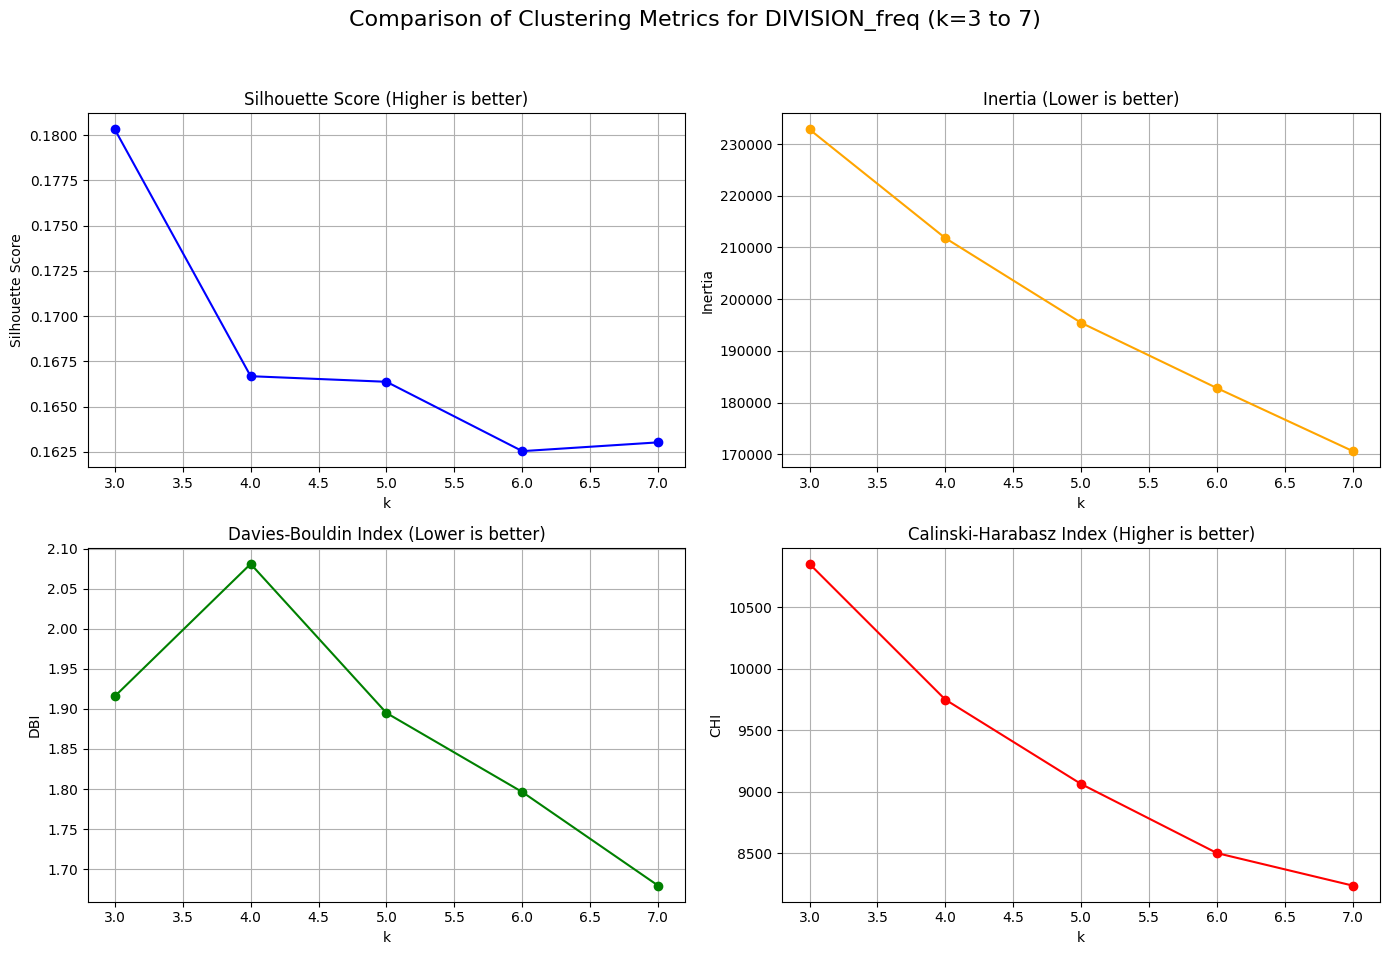



========== Analysis using LOCATION_TYPE_freq along with continuous and encoded features ==========

--- Feature Importance (Centroid Variance) for k = 7 ---
           Feature  Centroid Variance
LOCATION_TYPE_freq           0.848200
      OCC_DOW_freq           0.542661
          OCC_YEAR           0.482807
      Long_Lat_PCA           0.363770
     OCC_HOUR_freq           0.289413
           OCC_DOY           0.274646


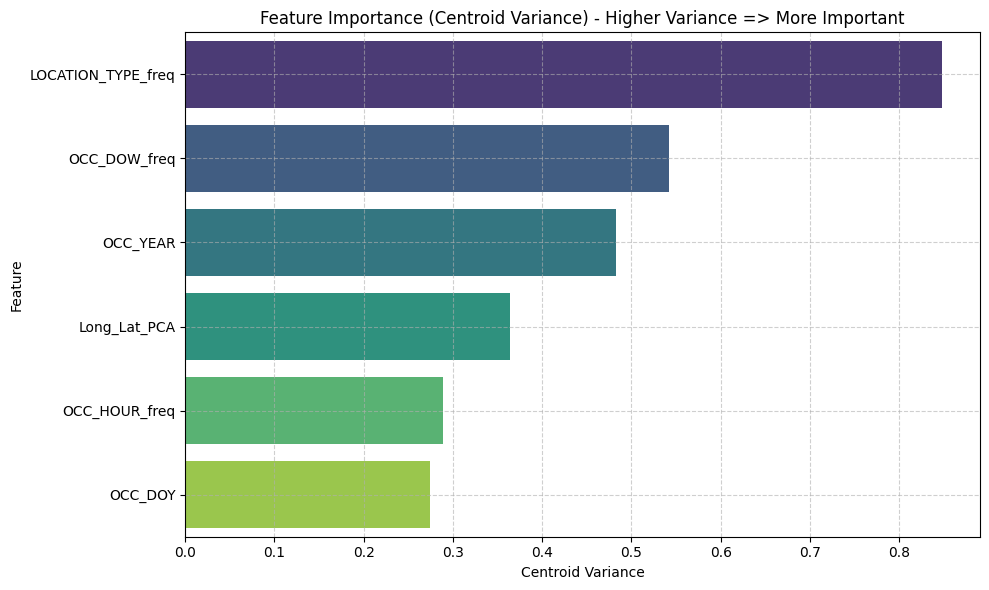


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.15  (Higher is better)
  Inertia                : 249211.10  (Lower is better)
  Davies-Bouldin Index   : 2.10  (Lower is better)
  Calinski-Harabasz Index: 8352.42  (Higher is better)

For k = 4:
  Silhouette Score       : 0.16  (Higher is better)
  Inertia                : 220987.71  (Lower is better)
  Davies-Bouldin Index   : 1.83  (Lower is better)
  Calinski-Harabasz Index: 8591.19  (Higher is better)

For k = 5:
  Silhouette Score       : 0.15  (Higher is better)
  Inertia                : 201449.04  (Lower is better)
  Davies-Bouldin Index   : 1.68  (Lower is better)
  Calinski-Harabasz Index: 8385.08  (Higher is better)

For k = 6:
  Silhouette Score       : 0.14  (Higher is better)
  Inertia                : 188311.66  (Lower is better)
  Davies-Bouldin Index   : 1.58  (Lower is better)
  Calinski-Harabasz Index: 7933.57  (Higher is better)

For k = 7:
  Silhouette Score       : 0.15  (Higher is b

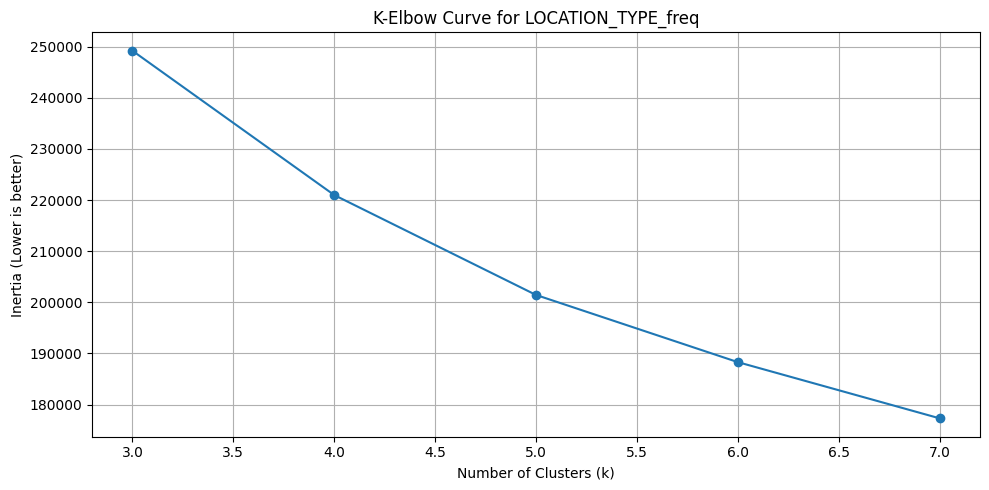


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0     6616
1    22974
2    24721


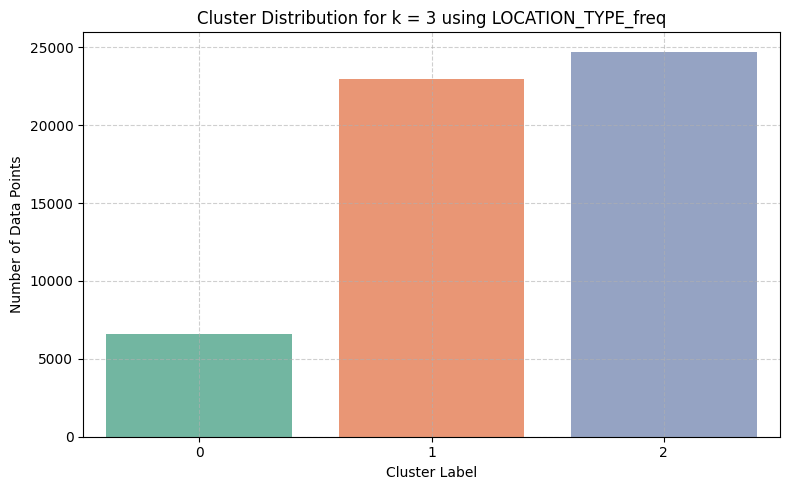


For k = 4, Cluster Counts:
0    20683
1    14222
2     6618
3    12788


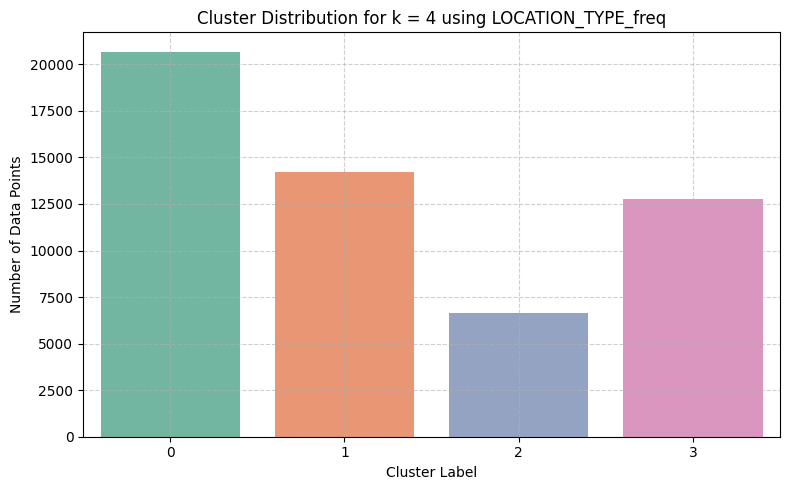


For k = 5, Cluster Counts:
0    13093
1    11423
2     6616
3    10491
4    12688


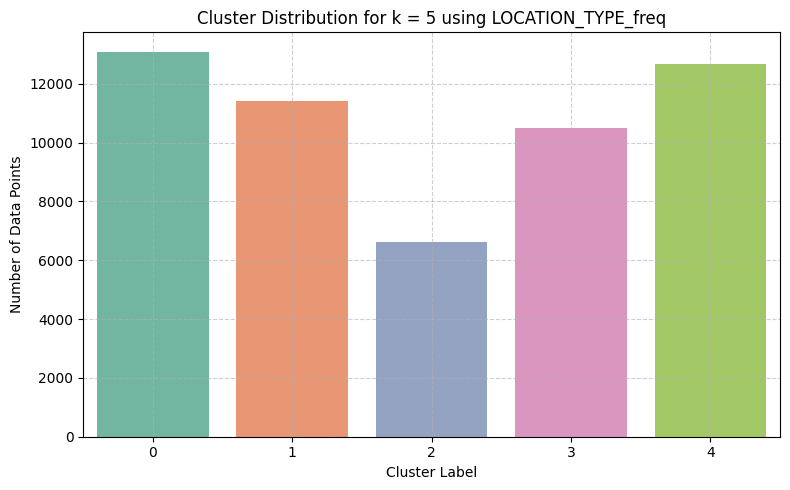


For k = 6, Cluster Counts:
0    10428
1    10937
2     9398
3     8396
4     8534
5     6618


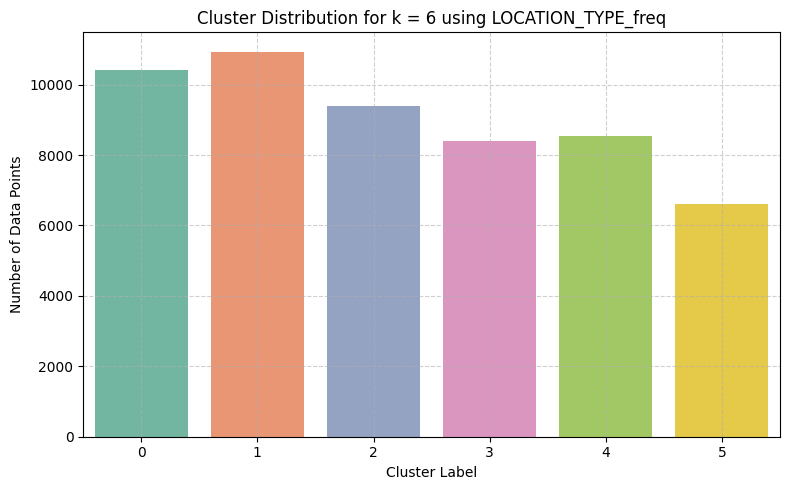


For k = 7, Cluster Counts:
0    8399
1    7387
2    7374
3    7191
4    8713
5    8631
6    6616


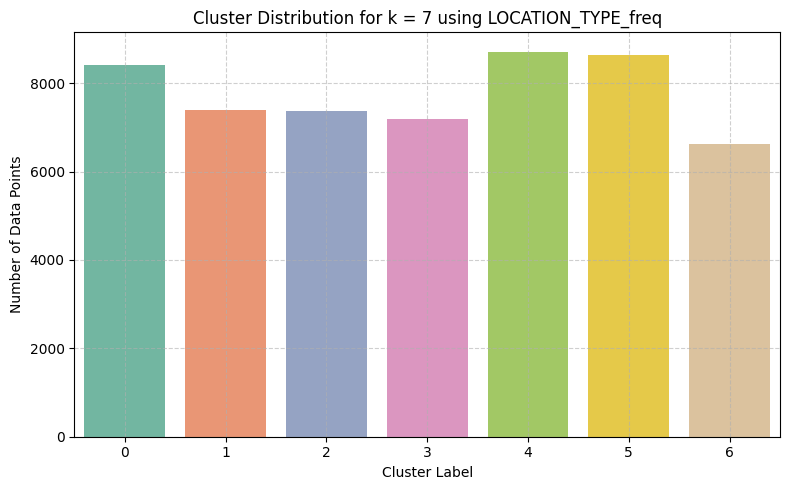

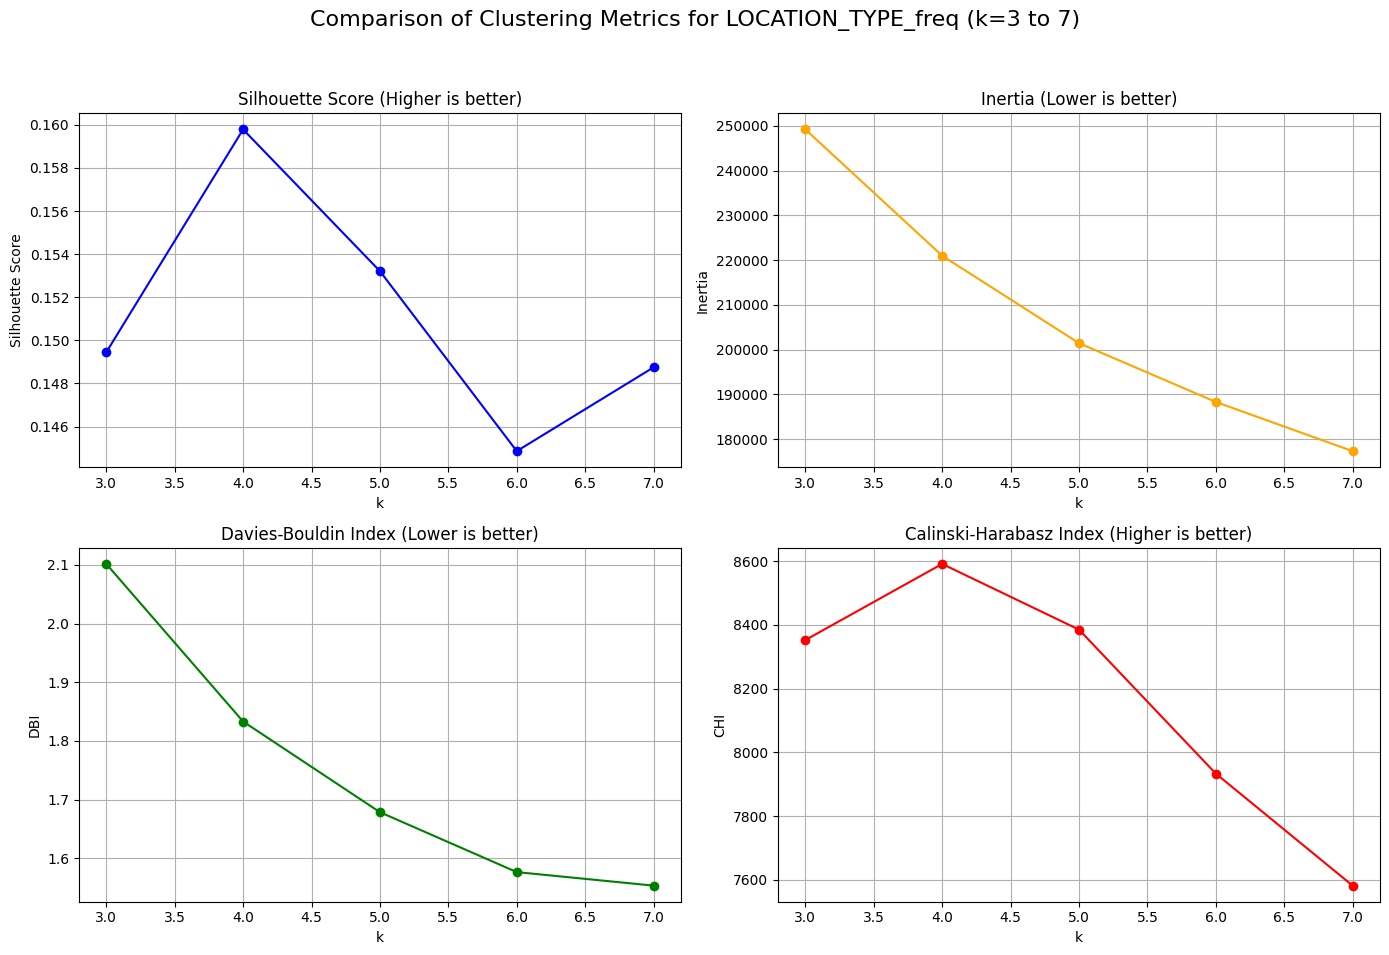



========== Analysis using PREMISES_TYPE_freq along with continuous and encoded features ==========

--- Feature Importance (Centroid Variance) for k = 7 ---
           Feature  Centroid Variance
PREMISES_TYPE_freq           0.842403
          OCC_YEAR           0.478356
      OCC_DOW_freq           0.417951
     OCC_HOUR_freq           0.397720
      Long_Lat_PCA           0.370058
           OCC_DOY           0.281826


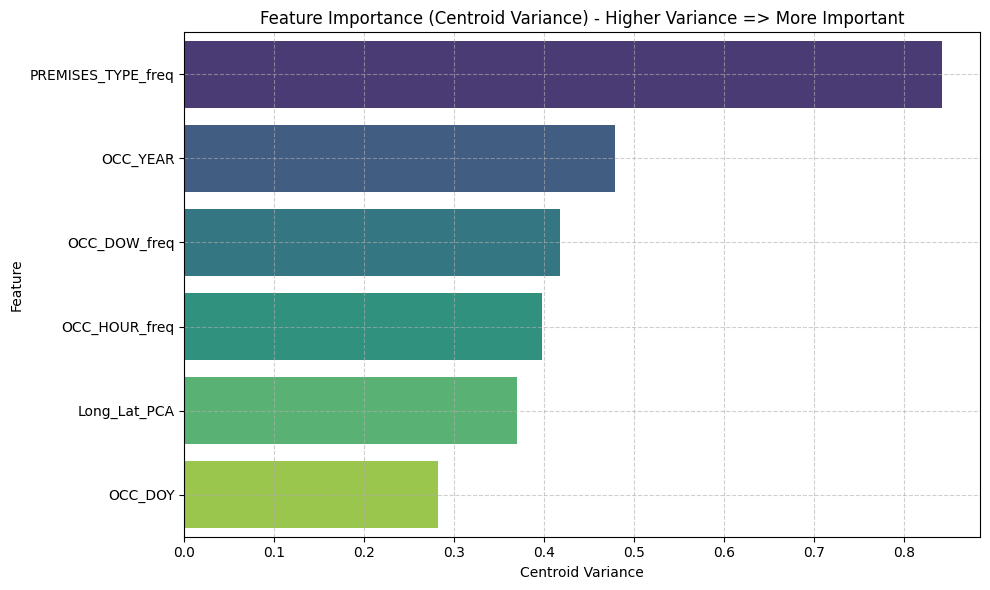


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.16  (Higher is better)
  Inertia                : 247677.15  (Lower is better)
  Davies-Bouldin Index   : 2.04  (Lower is better)
  Calinski-Harabasz Index: 8572.23  (Higher is better)

For k = 4:
  Silhouette Score       : 0.15  (Higher is better)
  Inertia                : 221853.88  (Lower is better)
  Davies-Bouldin Index   : 1.83  (Lower is better)
  Calinski-Harabasz Index: 8486.97  (Higher is better)

For k = 5:
  Silhouette Score       : 0.15  (Higher is better)
  Inertia                : 202208.21  (Lower is better)
  Davies-Bouldin Index   : 1.68  (Lower is better)
  Calinski-Harabasz Index: 8302.56  (Higher is better)

For k = 6:
  Silhouette Score       : 0.14  (Higher is better)
  Inertia                : 188948.34  (Lower is better)
  Davies-Bouldin Index   : 1.57  (Lower is better)
  Calinski-Harabasz Index: 7870.27  (Higher is better)

For k = 7:
  Silhouette Score       : 0.14  (Higher is b

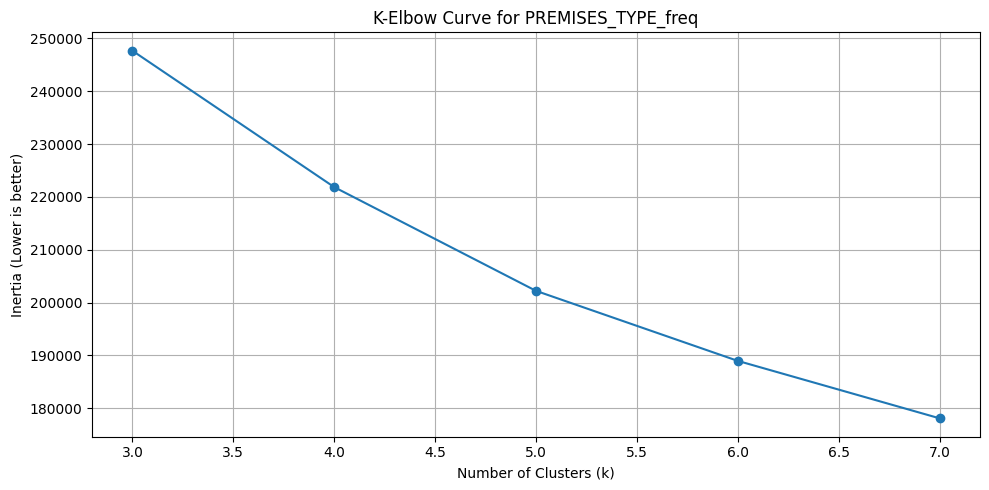


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0     6480
1    27325
2    20506


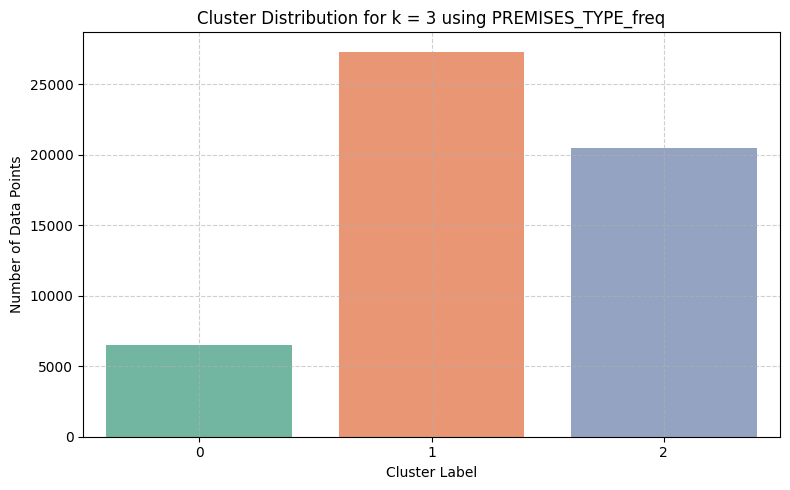


For k = 4, Cluster Counts:
0     6480
1    16678
2    14964
3    16189


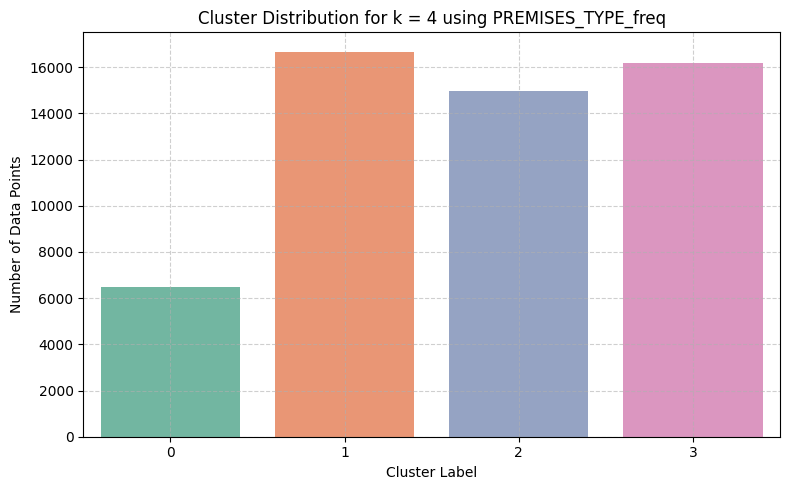


For k = 5, Cluster Counts:
0    12827
1    11554
2    10508
3    12942
4     6480


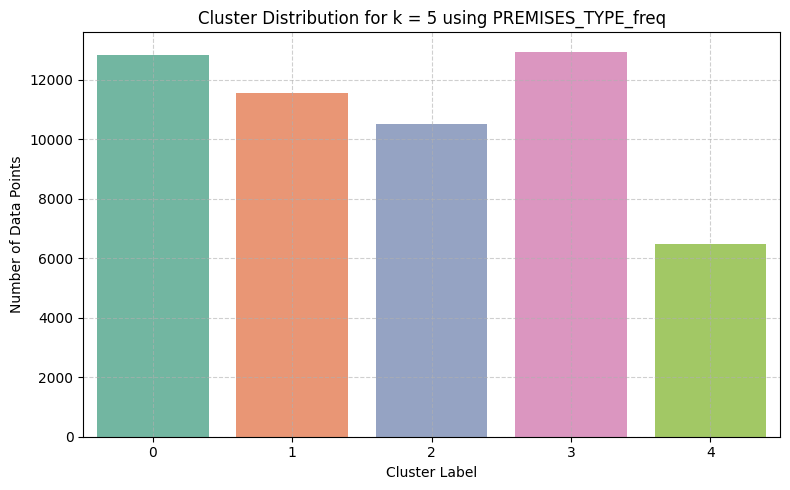


For k = 6, Cluster Counts:
0    10142
1     8521
2     9147
3    10098
4     9925
5     6478


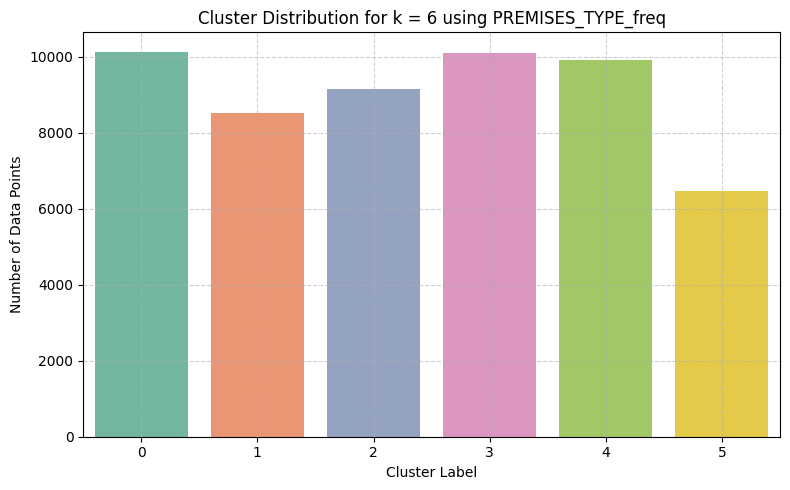


For k = 7, Cluster Counts:
0    8462
1    7045
2    7282
3    9256
4    6462
5    8364
6    7440


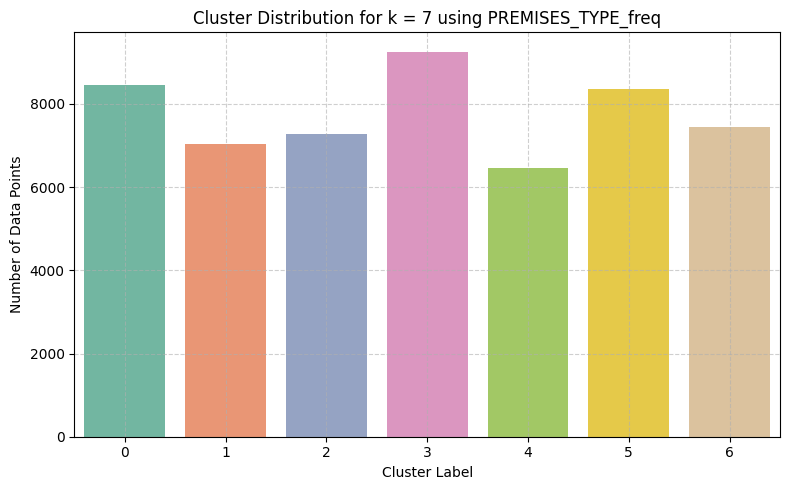

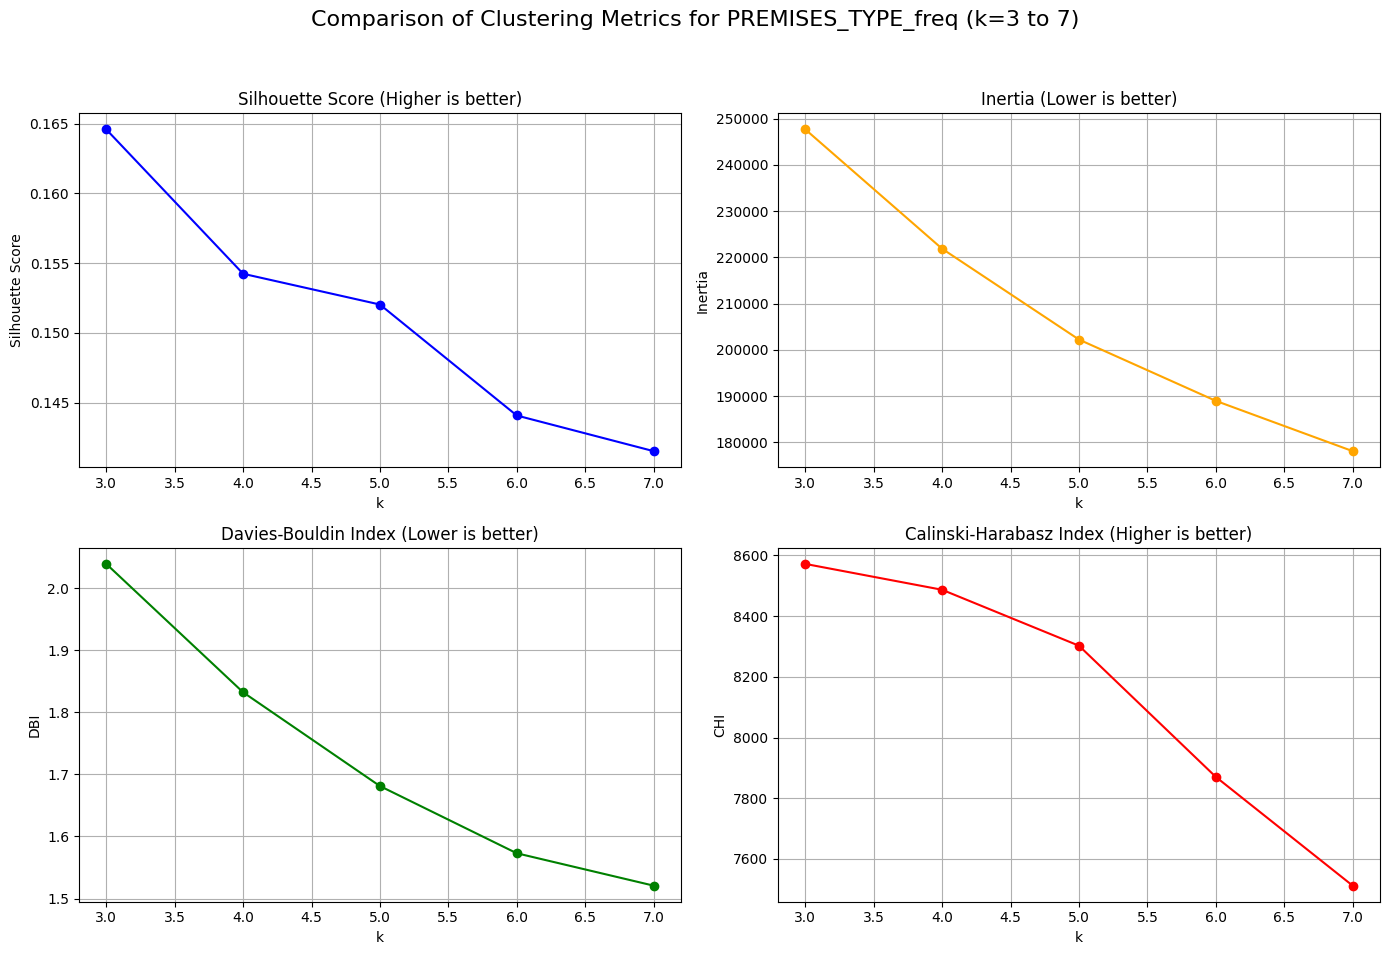



========== Analysis using HOOD_158_freq along with continuous and encoded features ==========

--- Feature Importance (Centroid Variance) for k = 7 ---
      Feature  Centroid Variance
HOOD_158_freq           1.741478
 OCC_DOW_freq           0.600220
OCC_HOUR_freq           0.567160
     OCC_YEAR           0.480897
 Long_Lat_PCA           0.299418
      OCC_DOY           0.276151


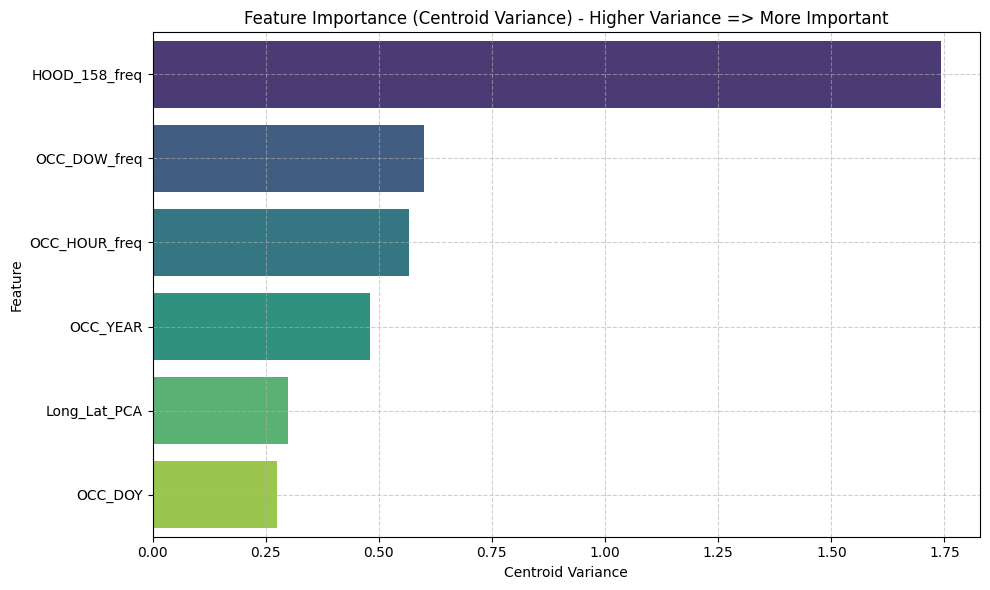


--- K-Elbow Analysis (k=3 to k=7) ---

For k = 3:
  Silhouette Score       : 0.19  (Higher is better)
  Inertia                : 226926.06  (Lower is better)
  Davies-Bouldin Index   : 1.78  (Lower is better)
  Calinski-Harabasz Index: 11839.18  (Higher is better)

For k = 4:
  Silhouette Score       : 0.18  (Higher is better)
  Inertia                : 199692.76  (Lower is better)
  Davies-Bouldin Index   : 1.66  (Lower is better)
  Calinski-Harabasz Index: 11437.73  (Higher is better)

For k = 5:
  Silhouette Score       : 0.18  (Higher is better)
  Inertia                : 180068.38  (Lower is better)
  Davies-Bouldin Index   : 1.54  (Lower is better)
  Calinski-Harabasz Index: 10992.63  (Higher is better)

For k = 6:
  Silhouette Score       : 0.17  (Higher is better)
  Inertia                : 164958.30  (Lower is better)
  Davies-Bouldin Index   : 1.44  (Lower is better)
  Calinski-Harabasz Index: 10594.40  (Higher is better)

For k = 7:
  Silhouette Score       : 0.18  (Higher 

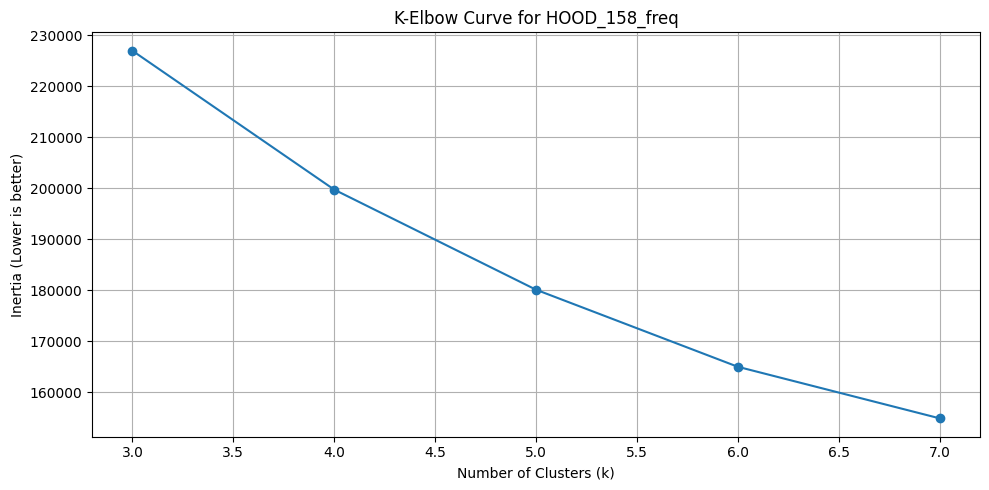


--- Number of Points in Each Cluster ---

For k = 3, Cluster Counts:
0     3724
1    21577
2    29010


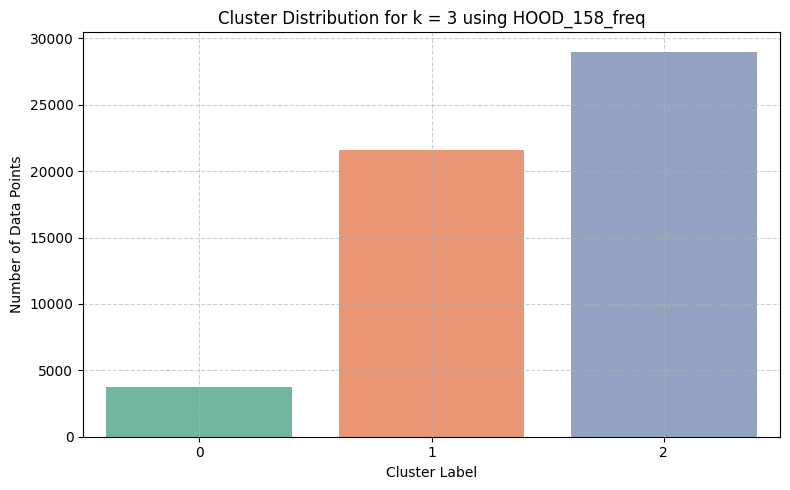


For k = 4, Cluster Counts:
0    13175
1    19550
2     3724
3    17862


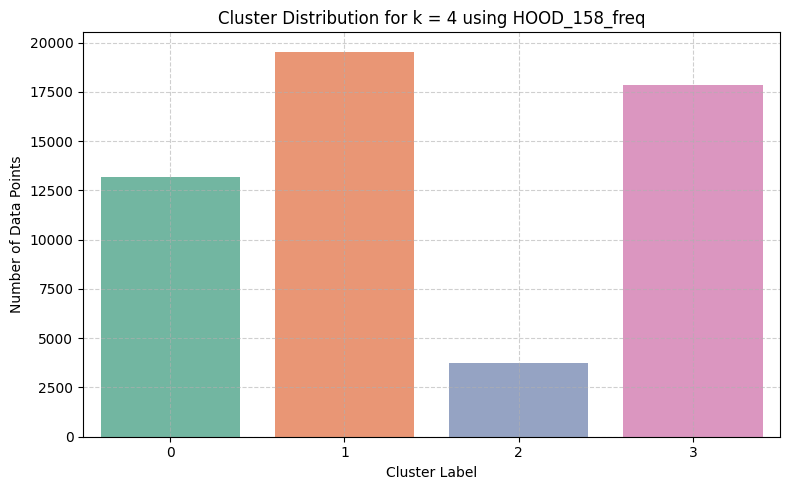


For k = 5, Cluster Counts:
0    13252
1    12534
2    13627
3     3724
4    11174


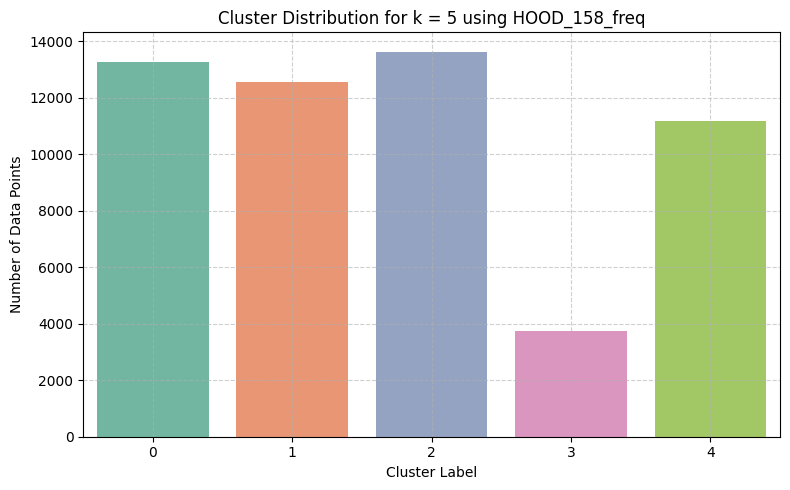


For k = 6, Cluster Counts:
0    11005
1     8938
2     9114
3     3724
4     9889
5    11641


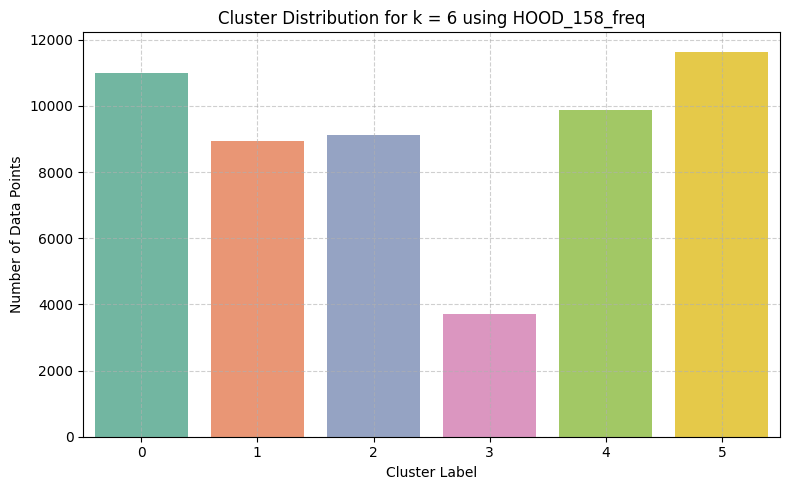


For k = 7, Cluster Counts:
0     8385
1    10138
2     8571
3     3724
4     9026
5     7395
6     7072


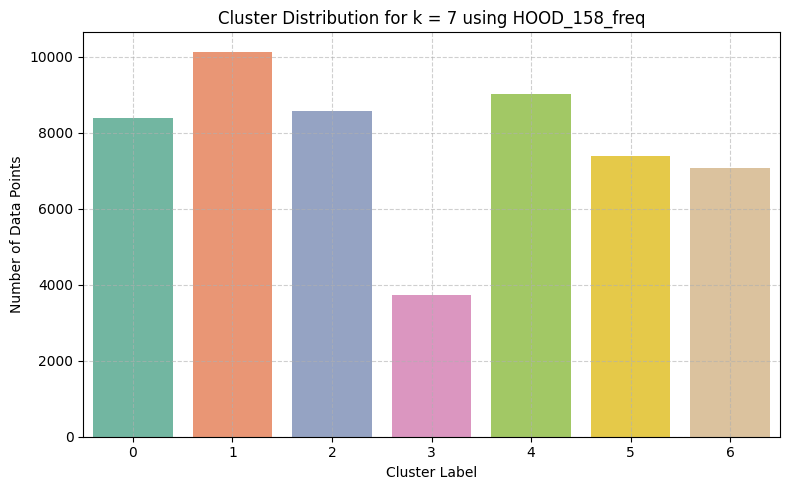

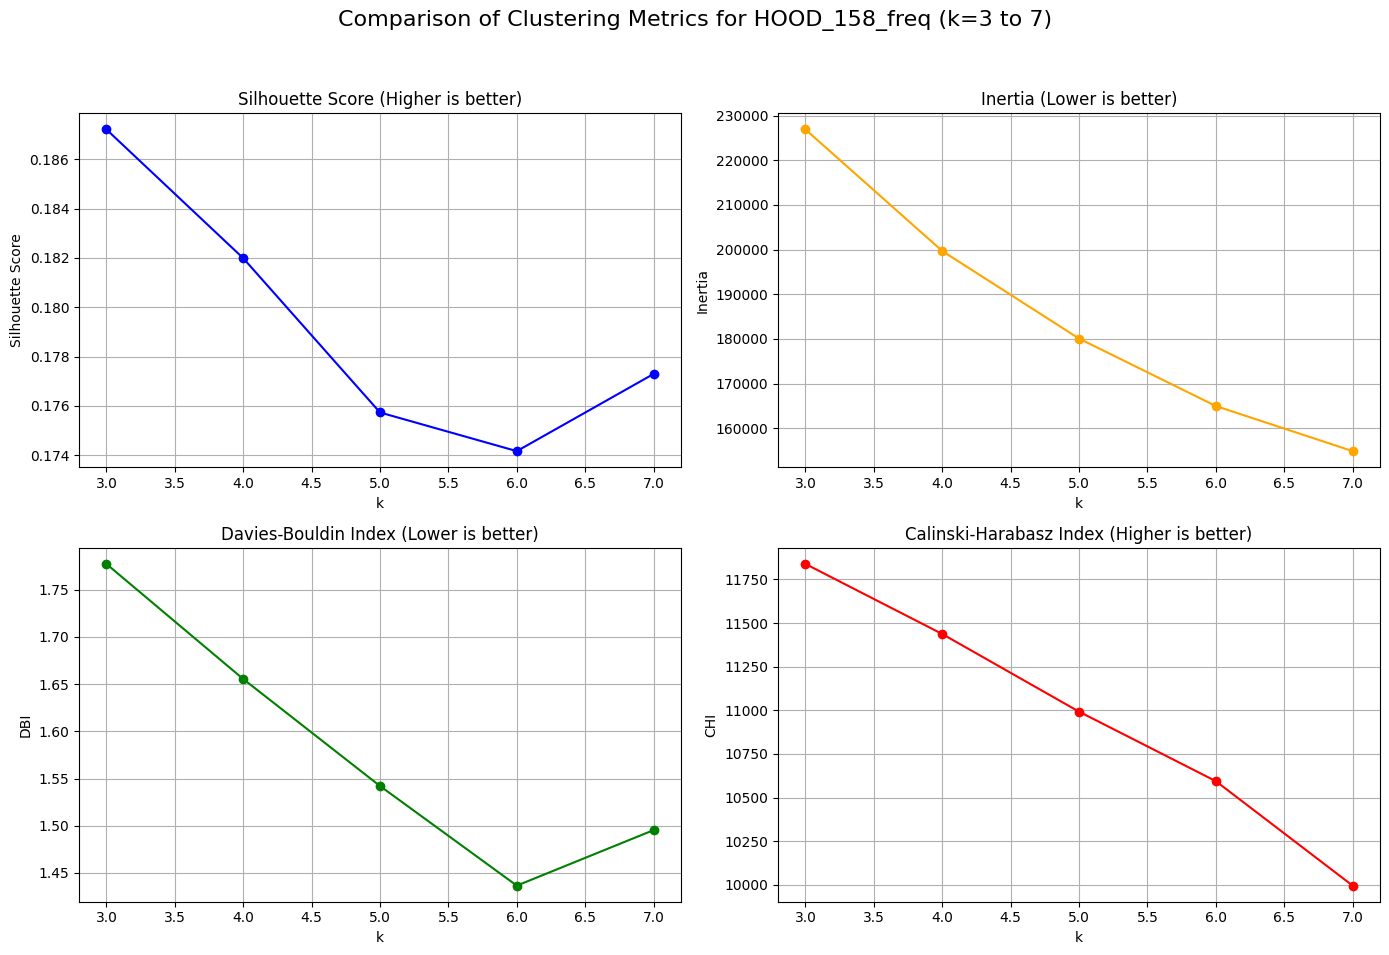

In [ ]:
    # Install prince if not already installed (uncomment the next line if needed)
    # !pip install prince -qqq

    import warnings
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
    from sklearn.decomposition import PCA

    # 1. Load the Data
    url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
    try:
        df = pd.read_csv(url)
        print("Data loaded successfully.")
    except Exception as e:
        print(f"Error loading data: {e}")
        exit()

    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

    # 2. Convert columns to integers and create new numeric columns
    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['OCC_MONTH_NUM'] = df['OCC_MONTH'].map(month_mapping).astype(int)
    df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)
    dow_mapping = {
        'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
        'Friday': 5, 'Saturday': 6, 'Sunday': 7
    }
    df['OCC_DOW_NUM'] = df['OCC_DOW'].map(dow_mapping).astype(int)

    print("\nColumns converted and new numeric columns created:")
    print(df[['OCC_MONTH', 'OCC_MONTH_NUM', 'OCC_HOUR', 'OCC_DOW', 'OCC_DOW_NUM']].head())

    # 3. Encoding for Time Variables
    # For Month, apply cyclical encoding
    def cyclical_encode(df, col, period):
        df[col + '_sin'] = np.sin(2 * np.pi * df[col] / period)
        df[col + '_cos'] = np.cos(2 * np.pi * df[col] / period)
        return df

    df = cyclical_encode(df, 'OCC_MONTH_NUM', 12)
    # For Hour, perform frequency encoding
    hour_freq = df['OCC_HOUR'].value_counts()
    df['OCC_HOUR_freq'] = df['OCC_HOUR'].map(hour_freq)
    # For Day-of-Week, perform frequency encoding
    dow_freq = df['OCC_DOW_NUM'].value_counts()
    df['OCC_DOW_freq'] = df['OCC_DOW_NUM'].map(dow_freq)

    print("\nCyclical encoding applied for Month, and frequency encoding applied for Hour and Day-of-Week.")
    print(df[['OCC_HOUR', 'OCC_HOUR_freq', 'OCC_MONTH_NUM_sin', 'OCC_MONTH_NUM_cos', 'OCC_DOW_freq']].head())

    # 4. Frequency Encoding for selected categorical features
    features_for_frequency_encoding = ['DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
    for feature in features_for_frequency_encoding:
        freq = df[feature].value_counts()
        df[feature + '_freq'] = df[feature].map(freq)

    print("\nFrequency encoding applied for features:")
    print(df[[f + '_freq' for f in features_for_frequency_encoding]].head())

    # 4a. Perform PCA on LONG_WGS84 and LAT_WGS84 to create a combined location factor
    pca = PCA(n_components=1)
    df['Long_Lat_PCA'] = pca.fit_transform(df[['LONG_WGS84', 'LAT_WGS84']])
    print("\nPCA on LONG_WGS84 & LAT_WGS84 completed. New column 'Long_Lat_PCA' created:")
    print(df[['LONG_WGS84', 'LAT_WGS84', 'Long_Lat_PCA']].head())

    # 5. Define feature groups for clustering
    # Continuous features: use OCC_YEAR, OCC_DOY, and the new Long_Lat_PCA (instead of separate LONG and LAT)
    continuous_features = ['OCC_YEAR', 'OCC_DOY', 'Long_Lat_PCA']
    # Encoded features: using frequency encoding for Hour and Day-of-Week
    encoded_features = [
        'OCC_HOUR_freq',
        'OCC_DOW_freq'
    ]
    # Frequency-encoded features (we will select one at a time)
    frequency_features = [f + '_freq' for f in features_for_frequency_encoding]

    # Loop over each frequency-encoded feature
    for freq_feature in frequency_features:
        print(f"\n\n========== Analysis using {freq_feature} along with continuous and encoded features ==========")

        # Combine features for clustering
        clustering_features = continuous_features + encoded_features + [freq_feature]
        X = df[clustering_features].dropna()

        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # -----------------------------------------
        # A. FEATURE IMPORTANCE (using k=7 for this purpose)
        # -----------------------------------------
        selected_k = 7
        kmeans_importance = KMeans(n_clusters=selected_k, random_state=42, n_init=10)
        kmeans_importance.fit(X_scaled)
        centroids = kmeans_importance.cluster_centers_
        # Compute variance across centroids for each feature (as an importance metric)
        centroid_variance = np.var(centroids, axis=0)
        importance_df = pd.DataFrame({
            'Feature': clustering_features,
            'Centroid Variance': centroid_variance
        }).sort_values(by='Centroid Variance', ascending=False)

        print("\n--- Feature Importance (Centroid Variance) for k = 7 ---")
        print(importance_df.to_string(index=False))

        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Centroid Variance', y='Feature', data=importance_df, palette='viridis')
        plt.title("Feature Importance (Centroid Variance) - Higher Variance => More Important")
        plt.xlabel("Centroid Variance")
        plt.ylabel("Feature")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

        # -----------------------------------------
        # B. K-ELBOW ANALYSIS (for k=3 to k=7)
        # -----------------------------------------
        inertia_values = []
        metrics = []  # to store all metrics for each k
        print("\n--- K-Elbow Analysis (k=3 to k=7) ---")
        for k in range(3, 8):
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(X_scaled)

            sil_score = silhouette_score(X_scaled, cluster_labels)
            inertia = kmeans.inertia_
            db_index = davies_bouldin_score(X_scaled, cluster_labels)
            ch_index = calinski_harabasz_score(X_scaled, cluster_labels)

            inertia_values.append(inertia)
            metrics.append({
                'k': k,
                'Silhouette': sil_score,
                'Inertia': inertia,
                'Davies-Bouldin': db_index,
                'Calinski-Harabasz': ch_index
            })

            print(f"\nFor k = {k}:")
            print(f"  Silhouette Score       : {sil_score:.2f}  (Higher is better)")
            print(f"  Inertia                : {inertia:.2f}  (Lower is better)")
            print(f"  Davies-Bouldin Index   : {db_index:.2f}  (Lower is better)")
            print(f"  Calinski-Harabasz Index: {ch_index:.2f}  (Higher is better)")

        metrics_df = pd.DataFrame(metrics)
        print("\nK-Elbow Summary:")
        print(metrics_df.to_string(index=False))

        # Plot Elbow Curve (Inertia vs. k)
        plt.figure(figsize=(10, 5))
        plt.plot(range(3, 8), inertia_values, marker='o', linestyle='-')
        plt.xlabel("Number of Clusters (k)")
        plt.ylabel("Inertia (Lower is better)")
        plt.title(f"K-Elbow Curve for {freq_feature}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # -----------------------------------------
        # C. NUMBER OF POINTS IN EACH CLUSTER (for k=3 to k=7)
        # -----------------------------------------
        print("\n--- Number of Points in Each Cluster ---")
        cluster_counts_dict = {}  # to store counts for each k
        for k in range(3, 8):
            kmeans_counts = KMeans(n_clusters=k, random_state=42, n_init=10)
            cluster_labels = kmeans_counts.fit_predict(X_scaled)
            # Create a series with cluster counts
            cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
            cluster_counts_dict[k] = cluster_counts
            print(f"\nFor k = {k}, Cluster Counts:")
            print(cluster_counts.to_string())

            # Plot cluster distribution for this k
            plt.figure(figsize=(8, 5))
            sns.countplot(x=cluster_labels, palette="Set2")
            plt.title(f"Cluster Distribution for k = {k} using {freq_feature}")
            plt.xlabel("Cluster Label")
            plt.ylabel("Number of Data Points")
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()

        # -----------------------------------------
        # D. COMPARISON PLOTS OF ALL METRICS (for k=3 to k=7)
        # -----------------------------------------
        fig, axs = plt.subplots(2, 2, figsize=(14, 10))

        # Silhouette Score (Higher is better)
        axs[0, 0].plot(metrics_df['k'], metrics_df['Silhouette'], marker='o', color='blue')
        axs[0, 0].set_title("Silhouette Score (Higher is better)")
        axs[0, 0].set_xlabel("k")
        axs[0, 0].set_ylabel("Silhouette Score")
        axs[0, 0].grid(True)

        # Inertia (Lower is better)
        axs[0, 1].plot(metrics_df['k'], metrics_df['Inertia'], marker='o', color='orange')
        axs[0, 1].set_title("Inertia (Lower is better)")
        axs[0, 1].set_xlabel("k")
        axs[0, 1].set_ylabel("Inertia")
        axs[0, 1].grid(True)

        # Davies-Bouldin Index (Lower is better)
        axs[1, 0].plot(metrics_df['k'], metrics_df['Davies-Bouldin'], marker='o', color='green')
        axs[1, 0].set_title("Davies-Bouldin Index (Lower is better)")
        axs[1, 0].set_xlabel("k")
        axs[1, 0].set_ylabel("DBI")
        axs[1, 0].grid(True)

        # Calinski-Harabasz Index (Higher is better)
        axs[1, 1].plot(metrics_df['k'], metrics_df['Calinski-Harabasz'], marker='o', color='red')
        axs[1, 1].set_title("Calinski-Harabasz Index (Higher is better)")
        axs[1, 1].set_xlabel("k")
        axs[1, 1].set_ylabel("CHI")
        axs[1, 1].grid(True)

        fig.suptitle(f"Comparison of Clustering Metrics for {freq_feature} (k=3 to 7)", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import files
from IPython.display import display, HTML

# ------------------------------
# Ignore warnings
# ------------------------------
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# ============================
# Load the Data
# ============================
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
df = pd.read_csv(url)
display(HTML("<p style='color: green; font-size: 16px; font-weight: bold;'>Data loaded successfully.</p>"))

# ====================================
# FEATURE ENGINEERING PHASE
# ====================================
display(HTML("<h2 style='color: navy;'>Feature Engineering Phase</h2>"))

# 1) OCC_MONTH: Convert month names to numeric.
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['OCC_MONTH_Num'] = df['OCC_MONTH'].map(month_mapping)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 1: '<span style='color: darkblue; font-weight: bold;'>OCC_MONTH</span>' converted to "
    "'<span style='color: darkblue; font-weight: bold;'>OCC_MONTH_Num</span>' (numeric).<br>"
    "Rationale: Many clustering algorithms like <span style='color: purple; font-weight: bold;'>KMeans</span> and "
    "<span style='color: purple; font-weight: bold;'>DBSCAN</span> require numeric data for distance computations."
    "</p>"
))

# 2) OCC_DOW: Convert day names to numeric.
dow_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
    'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['OCC_DOW_Num'] = df['OCC_DOW'].map(dow_mapping)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 2: '<span style='color: darkblue; font-weight: bold;'>OCC_DOW</span>' converted to "
    "'<span style='color: darkblue; font-weight: bold;'>OCC_DOW_Num</span>' (numeric).<br>"
    "Rationale: Converting days (Monday=1,...,Sunday=7) to numbers is necessary because "
    "<span style='color: purple; font-weight: bold;'>KMeans</span> and "
    "<span style='color: purple; font-weight: bold;'>DBSCAN</span> require numeric inputs."
    "</p>"
))

# 3) DOW_Weekend: Mark Saturday and Sunday as 1; else 0.
df['DOW_Weekend'] = df['OCC_DOW_Num'].apply(lambda x: 1 if x in [6, 7] else 0)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 3: '<span style='color: darkblue; font-weight: bold;'>DOW_Weekend</span>' created (1 for Saturday & Sunday, else 0).<br>"
    "Rationale: This binary indicator captures weekend-specific patterns, which can be important for clustering."
    "</p>"
))

# 4) DOW_Begin: Mark Monday, Tuesday, and Wednesday as 1; else 0.
df['DOW_Begin'] = df['OCC_DOW_Num'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 4: '<span style='color: darkblue; font-weight: bold;'>DOW_Begin</span>' created (1 for Monday-Tuesday-Wednesday, else 0).<br>"
    "Rationale: Grouping early week days helps detect trends at the beginning of the week."
    "</p>"
))

# 5) DOW_Mid: Mark Thursday and Friday as 1; else 0.
df['DOW_Mid'] = df['OCC_DOW_Num'].apply(lambda x: 1 if x in [4, 5] else 0)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 5: '<span style='color: darkblue; font-weight: bold;'>DOW_Mid</span>' created (1 for Thursday & Friday, else 0).<br>"
    "Rationale: This binary feature distinguishes mid-week patterns that may differ from early week and weekend trends."
    "</p>"
))

# ====================================
# FEATURE ENCODING PHASE
# ====================================
display(HTML("<h2 style='color: navy;'>Feature Encoding Phase</h2>"))

# 6) DIVISION: Frequency encode into 'Division_Freq'
division_freq = df['DIVISION'].value_counts(normalize=True)
df['Division_Freq'] = df['DIVISION'].map(division_freq)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 6: '<span style='color: darkblue; font-weight: bold;'>DIVISION</span>' frequency encoded as "
    "'<span style='color: green; font-weight: bold;'>Division_Freq</span>'.<br>"
    "Rationale: Frequency encoding transforms the categorical <span style='color: darkblue; font-weight: bold;'>DIVISION</span> into a continuous metric reflecting its occurrence, useful for clustering."
    "</p>"
))

# 7) LOCATION_TYPE: Frequency encode into 'LOCATION_Freq'
location_freq = df['LOCATION_TYPE'].value_counts(normalize=True)
df['LOCATION_Freq'] = df['LOCATION_TYPE'].map(location_freq)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 7: '<span style='color: darkblue; font-weight: bold;'>LOCATION_TYPE</span>' frequency encoded as "
    "'<span style='color: green; font-weight: bold;'>LOCATION_Freq</span>'.<br>"
    "Rationale: Converting <span style='color: darkblue; font-weight: bold;'>LOCATION_TYPE</span> into frequency values reduces sparsity and captures commonality."
    "</p>"
))

# 8) PREMISES_TYPE: Frequency encode into 'PREMISES_Freq'
premises_freq = df['PREMISES_TYPE'].value_counts(normalize=True)
df['PREMISES_Freq'] = df['PREMISES_TYPE'].map(premises_freq)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 8: '<span style='color: darkblue; font-weight: bold;'>PREMISES_TYPE</span>' frequency encoded as "
    "'<span style='color: green; font-weight: bold;'>PREMISES_Freq</span>'.<br>"
    "Rationale: Frequency encoding standardizes diverse premises categories, making them comparable for clustering."
    "</p>"
))

# 9) Loca_Premi_Freq: Hierarchical feature combining LOCATION_Freq and PREMISES_Freq.
df['Loca_Premi_Freq'] = df['LOCATION_Freq'] * df['PREMISES_Freq']
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 9: Hierarchical feature '<span style='color: darkblue; font-weight: bold;'>Loca_Premi_Freq</span>' created by combining "
    "'<span style='color: darkblue; font-weight: bold;'>LOCATION_Freq</span>' and "
    "'<span style='color: darkblue; font-weight: bold;'>PREMISES_Freq</span>'.<br>"
    "Rationale: Multiplying these frequency values captures interactions between location type and premises type, potentially revealing hidden patterns."
    "</p>"
))

# 10) Hood_158: Frequency encode into 'Hood_Freq'
HOOD_freq = df['HOOD_158'].value_counts(normalize=True)
df['HOOD_Freq'] = df['HOOD_158'].map(HOOD_freq)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 10: '<span style='color: darkblue; font-weight: bold;'>Hood_158</span>' frequency encoded as "
    "'<span style='color: green; font-weight: bold;'>Hood_Freq</span>'.<br>"
    "Rationale: Frequency encoding of <span style='color: darkblue; font-weight: bold;'>Hood_158</span> smooths out the category and provides a continuous metric for clustering."
    "</p>"
))

# 11) Hierarchical feature engineering of DIVISION and Hood_158 together.
df['DIV_HOOD_Hier'] = df['Division_Freq'] * df['HOOD_Freq']
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 11: Hierarchical feature '<span style='color: darkblue; font-weight: bold;'>Div_Hood_Hier</span>' created by combining "
    "'<span style='color: darkblue; font-weight: bold;'>Division_Freq</span>' and "
    "'<span style='color: darkblue; font-weight: bold;'>Hood_Freq</span>'.<br>"
    "Rationale: This combined feature embeds the nested relationship between division and neighborhood, allowing the model to capture region-specific variations."
    "</p>"
))

# 12) PCA on LONG_WGS84 and LAT_WGS84: Create one feature LONG_LAT_PCA.
pca = PCA(n_components=1)
df['LONG_LAT_PCA'] = pca.fit_transform(df[['LONG_WGS84', 'LAT_WGS84']])
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Step 12: '<span style='color: darkblue; font-weight: bold;'>LONG_WGS84</span>' and "
    "'<span style='color: darkblue; font-weight: bold;'>LAT_WGS84</span>' combined via PCA to create "
    "'<span style='color: green; font-weight: bold;'>LONG_LAT_PCA</span>'.<br>"
    "Rationale: PCA condenses two correlated spatial variables into one, preserving maximum variance and reducing dimensionality."
    "</p>"
))

# ====================================
# Display Sample of Engineered and Encoded Features
# ====================================
final_features = ['OCC_MONTH_Num', 'OCC_DOW_Num', 'DOW_Weekend', 'DOW_Begin', 'DOW_Mid',
                  'Division_Freq', 'LOCATION_Freq', 'PREMISES_Freq', 'Loca_Premi_Freq',
                  'HOOD_Freq', 'DIV_HOOD_Hier', 'LONG_LAT_PCA']
display(HTML("<h3 style='color: darkblue;'>Sample of Engineered & Encoded Features:</h3>"))
display(df[final_features].head())

# ====================================
# Save the Final Encoded Dataset as FE_Encoded_New.csv
# ====================================
output_filename = "FE_Encoded_New.csv"
df.to_csv(output_filename, index=False)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Feature Engineering and Encoding completed. The final dataset has been saved as "
    "<span style='color: green; font-weight: bold;'>{}</span>."
    "</p>".format(output_filename)
))
files.download(output_filename)

# ====================================
# SUMMARY TABLE ANALYSIS
# ====================================
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

display(HTML("<h2 style='color: navy;'>Summary Table Analysis</h2>"))
print("\nGenerating Summary Table Analysis...\n")

# Create a summary copy of the encoded dataframe
df_summary = df.copy()

def count_leading_trailing_spaces(column):
    column = column.astype(str)
    return column.str.startswith(' ').sum(), column.str.endswith(' ').sum()

def prepare_summary_table(df):
    unique_values = df.nunique()
    total_values = df.count() + df.isnull().sum()
    null_counts = df.isnull().sum()
    nan_counts = df.isna().sum()
    null_percentages = (null_counts / total_values) * 100
    leading_spaces, trailing_spaces = zip(*[count_leading_trailing_spaces(df[col]) for col in df.columns])
    summary_table = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes,
        "Total Values": total_values,
        "Unique Values": unique_values,
        "Null Values": null_counts,
        "Null %": null_percentages.round(1),
        "NaN Values": nan_counts,
        "Leading Spaces": leading_spaces,
        "Trailing Spaces": trailing_spaces
    })
    return summary_table, null_counts, null_percentages

def generate_summary_html(summary_table):
    summary_table_html = """
    <style>
        table { border-collapse: collapse; width: 100%; font-family: Arial, sans-serif; font-size: 16px; }
        table th, table td { border: 1px solid #ddd; padding: 8px; text-align: left; }
        table th { background-color: #4CAF50; color: white; font-size: 16px; }
        table tr:nth-child(even) {background-color: #f2f2f2;}
        table tr:hover {background-color: #ddd;}
    </style>
    <table>
        <tr>
            <th>Column</th>
            <th>Data Type</th>
            <th>Total Values</th>
            <th>Unique Values</th>
            <th>Null Values</th>
            <th>Null %</th>
            <th>NaN Values</th>
            <th>Leading Spaces</th>
            <th>Trailing Spaces</th>
        </tr>
    """
    for _, row in summary_table.iterrows():
        null_color = "red" if row['Null Values'] > 0 else "green"
        leading_color = "red" if row['Leading Spaces'] > 0 else "green"
        trailing_color = "red" if row['Trailing Spaces'] > 0 else "green"
        summary_table_html += f"""
        <tr>
            <td>{row['Column']}</td>
            <td>{row['Data Type']}</td>
            <td style='color: green;'>{row['Total Values']}</td>
            <td style='color: green;'>{row['Unique Values']}</td>
            <td style='color:{null_color};'>{row['Null Values']}</td>
            <td>{row['Null %']}</td>
            <td>{row['NaN Values']}</td>
            <td style='color:{leading_color};'>{row['Leading Spaces']}</td>
            <td style='color:{trailing_color};'>{row['Trailing Spaces']}</td>
        </tr>
        """
    summary_table_html += "</table>"
    return summary_table_html

def plot_missing_percentage(df, dataset_name):
    missing_percentage = df.isnull().mean() * 100
    missing_percentage = missing_percentage[missing_percentage > 0]
    if missing_percentage.empty:
        display(HTML(f"<p style='color: black; font-size: 16px; font-weight: bold;'>No missing data in {dataset_name}. Skipping missing percentage plot.</p>"))
        return ""
    plt.figure(figsize=(10, 6))
    missing_percentage.sort_values().plot(kind='barh', color='skyblue', edgecolor='grey')
    plt.title(f'Missing Data Percentage - {dataset_name}', fontsize=16)
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    missing_plot_path = f'/content/Encoded_Data_Missing_PercentPlot.png'
    plt.savefig(missing_plot_path)
    plt.close()
    display(HTML(f"<p style='color: black; font-size: 16px; font-weight: bold;'>Missing data percentage plot saved to <span style='color: green; font-weight: bold;'>{missing_plot_path}</span>.</p>"))
    return missing_plot_path

def display_summary_for_file(df, title):
    summary_table, null_counts, null_percentages = prepare_summary_table(df)
    summary_html = generate_summary_html(summary_table)
    missing_plot_path = plot_missing_percentage(df, title)
    complete_html = f"""
    <html>
    <head><title>Dataset Summary - {title}</title></head>
    <body>
        <h2 style="color: black; font-size: 16px; font-weight: bold;">Summary Table for {title}</h2>
        {summary_html}
    </body>
    </html>
    """
    summary_html_path = 'Summary_Encoded_Data.html'
    with open(summary_html_path, 'w', encoding='utf-8') as f:
        f.write(complete_html)
    display(HTML(
        f"<p style='color: black; font-size: 16px; font-weight: bold;'>HTML summary report for {title} saved to <span style='color: green; font-weight: bold;'>{summary_html_path}</span>.</p>"
    ))
    return summary_html_path, missing_plot_path

html_file_path, missing_plot_path = display_summary_for_file(df_summary, "Analysis on Encoded Data")
display(HTML(open(html_file_path).read()))

files.download(html_file_path)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "Files: <span style='color: darkblue; font-weight: bold;'>HTML summary file</span>, "
    "<span style='color: darkblue; font-weight: bold;'>FEngineered_Data.csv</span> and "
    "<span style='color: darkblue; font-weight: bold;'>FE_Encoded_New.csv</span> have been "
    "<span style='color: green; font-weight: bold;'>downloaded</span>."
    "</p>"
))


OCC_MONTH_Num  OCC_DOW_Num  DOW_Weekend  DOW_Begin  DOW_Mid  Division_Freq  \
0             12            2            0          1        0       0.057760   
1              1            3            0          1        0       0.059435   
2              1            4            0          0        1       0.084440   
3              1            3            0          1        0       0.129274   
4              1            3            0          1        0       0.129274   

   LOCATION_Freq  PREMISES_Freq  Loca_Premi_Freq  HOOD_Freq  DIV_HOOD_Hier  \
0       0.026827       0.026827         0.000720   0.004309       0.000249   
1       0.199739       0.533023         0.106465   0.004898       0.000291   
2       0.347664       0.347664         0.120871   0.009630       0.000813   
3       0.330780       0.533023         0.176313   0.013754       0.001778   
4       0.330780       0.533023         0.176313   0.007107       0.000919   

   LONG_LAT_PCA  
0      0.117330  
1      0.183321  
2      0.166939  
3     -0.161830  
4     -0.094145

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Generating Summary Table Analysis...



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>